In [1]:
import tensorflow as tf
import os
from src.utils import reload_model_from_epoch
from src.modeling.preprocess import load, resize, load_image_and_sketch
from src.preprocessing import find_sketch_threshold
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import seaborn as sns
from tensorflow.io import read_file, decode_jpeg

2023-02-09 19:38:13.230267: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-09 19:38:13.347061: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-09 19:38:13.347087: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-09 19:38:14.271697: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-0

In [23]:
def split_pair(pair):
    pair_arr = np.array(pair)
    width = pair_arr.shape[1] // 2
    sketch = pair_arr[:, width:]
    image = pair_arr[:, :width]
    
    
    
    return sketch, image

In [24]:
def rescale(image, factor = 255):
    image = image.astype(float)
    image = image / factor
    
    return image

In [25]:
def convert_to_tensor(image):
    tensor = tf.convert_to_tensor(image)
    tensor = tf.expand_dims(tensor, axis = -1)
    tensor = tf.expand_dims(tensor, axis = 0)
    tensor = tf.cast(tensor, tf.float32)
    
    return tensor

In [26]:
def generate_image(generator, sketch_tensor):
    prediction = generator(sketch_tensor, training = True)
    
    prediction_numpy = (prediction[0, :, :, 0] * 255).numpy()
    prediction_numpy[prediction_numpy < 0] = 0
    
    prediction_image = Image.fromarray(prediction_numpy.astype(np.uint8))
    
    return prediction_image

In [27]:
def save_generated_image(image, end_dir, image_name):
    if not os.path.exists(end_dir):
        os.mkdir(end_dir)
    image.save(end_dir + '/' + image_name)
    
    return

In [28]:
def generate_and_save_image(image_path, generator, end_dir, epoch, model, save = True):
    im = Image.open(image_path)
    
    print('Converting image.')
    
    sketch, image = split_pair(im)
    sketch = rescale(sketch)
    sketch = convert_to_tensor(sketch)
    
    print('Generating prediction.')
    
    prediction_image = generate_image(generator, sketch)

    image_name = f'Generated_Owl_Model_{model.title()}_Epoch_{epoch:03d}_{image_path[-8:-4]}.jpg'
    
    if save:
        print('Saving image.')

        save_generated_image(prediction_image, end_dir, image_name)

        print(f'{image_name} saved to {end_dir}')
    
    return prediction_image

In [29]:
base_path = '..'

In [30]:
datasets = ['train', 'test']
models = ['pix2pix', 'autopainter']
epochs = np.arange(10, 210, 10)

for dataset in datasets:
    print(f'Generating images from {dataset}.')
    data = os.listdir(f'{base_path}/data/{dataset}')
    for model in models:
        print(f'Generating images using {model}.')
        for epoch in epochs:
            print(f'Generating images using epoch {epoch}.')
            epoch_dir = f'{base_path}/models/{model}/epoch_{epoch:03d}'
            generator = reload_model_from_epoch(epoch_dir, model, base_path)[0]
            
            for image in data:
                print(f'Generating image for {image}.')
                end_dir = f'{base_path}/data/generated/{dataset}/{model}/epoch_{epoch}'
                image_path = f'{base_path}/data/{dataset}/{image}'
                generate_and_save_image(image_path, generator, end_dir, epoch, model)

Generating images from validation.
Generating images using pix2pix.
Generating images using epoch 10.
Generating image for Owl_Pair_0002.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_010_0002.jpg saved to ../data/generated/train/pix2pix/epoch_10
Generating image for Owl_Pair_0008.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_010_0008.jpg saved to ../data/generated/train/pix2pix/epoch_10
Generating image for Owl_Pair_0011.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_010_0011.jpg saved to ../data/generated/train/pix2pix/epoch_10
Generating image for Owl_Pair_0021.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_010_0021.jpg saved to ../data/generated/train/pix2pix/epoch_10
Generating image for Owl_Pair_0022.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_0

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_010_0257.jpg saved to ../data/generated/train/pix2pix/epoch_10
Generating image for Owl_Pair_0265.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_010_0265.jpg saved to ../data/generated/train/pix2pix/epoch_10
Generating image for Owl_Pair_0270.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_010_0270.jpg saved to ../data/generated/train/pix2pix/epoch_10
Generating image for Owl_Pair_0274.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_010_0274.jpg saved to ../data/generated/train/pix2pix/epoch_10
Generating image for Owl_Pair_0275.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_010_0275.jpg saved to ../data/generated/train/pix2pix/epoch_10
Generating image for Owl_Pair_0281.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_010_0618.jpg saved to ../data/generated/train/pix2pix/epoch_10
Generating image for Owl_Pair_0623.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_010_0623.jpg saved to ../data/generated/train/pix2pix/epoch_10
Generating image for Owl_Pair_0624.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_010_0624.jpg saved to ../data/generated/train/pix2pix/epoch_10
Generating image for Owl_Pair_0626.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_010_0626.jpg saved to ../data/generated/train/pix2pix/epoch_10
Generating image for Owl_Pair_0629.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_010_0629.jpg saved to ../data/generated/train/pix2pix/epoch_10
Generating image for Owl_Pair_0630.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_010_0867.jpg saved to ../data/generated/train/pix2pix/epoch_10
Generating image for Owl_Pair_0874.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_010_0874.jpg saved to ../data/generated/train/pix2pix/epoch_10
Generating image for Owl_Pair_0878.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_010_0878.jpg saved to ../data/generated/train/pix2pix/epoch_10
Generating image for Owl_Pair_0905.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_010_0905.jpg saved to ../data/generated/train/pix2pix/epoch_10
Generating image for Owl_Pair_0915.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_010_0915.jpg saved to ../data/generated/train/pix2pix/epoch_10
Generating image for Owl_Pair_0919.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_010_1270.jpg saved to ../data/generated/train/pix2pix/epoch_10
Generating image for Owl_Pair_1275.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_010_1275.jpg saved to ../data/generated/train/pix2pix/epoch_10
Generating image for Owl_Pair_1287.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_010_1287.jpg saved to ../data/generated/train/pix2pix/epoch_10
Generating image for Owl_Pair_1295.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_010_1295.jpg saved to ../data/generated/train/pix2pix/epoch_10
Generating image for Owl_Pair_1306.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_010_1306.jpg saved to ../data/generated/train/pix2pix/epoch_10
Generating image for Owl_Pair_1316.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_010_1608.jpg saved to ../data/generated/train/pix2pix/epoch_10
Generating image for Owl_Pair_1609.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_010_1609.jpg saved to ../data/generated/train/pix2pix/epoch_10
Generating image for Owl_Pair_1613.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_010_1613.jpg saved to ../data/generated/train/pix2pix/epoch_10
Generating image for Owl_Pair_1619.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_010_1619.jpg saved to ../data/generated/train/pix2pix/epoch_10
Generating image for Owl_Pair_1628.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_010_1628.jpg saved to ../data/generated/train/pix2pix/epoch_10
Generating image for Owl_Pair_1642.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_010_1933.jpg saved to ../data/generated/train/pix2pix/epoch_10
Generating image for Owl_Pair_1946.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_010_1946.jpg saved to ../data/generated/train/pix2pix/epoch_10
Generating image for Owl_Pair_1951.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_010_1951.jpg saved to ../data/generated/train/pix2pix/epoch_10
Generating image for Owl_Pair_1955.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_010_1955.jpg saved to ../data/generated/train/pix2pix/epoch_10
Generating image for Owl_Pair_1962.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_010_1962.jpg saved to ../data/generated/train/pix2pix/epoch_10
Generating image for Owl_Pair_1966.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_010_2249.jpg saved to ../data/generated/train/pix2pix/epoch_10
Generating image for Owl_Pair_2266.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_010_2266.jpg saved to ../data/generated/train/pix2pix/epoch_10
Generating image for Owl_Pair_2272.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_010_2272.jpg saved to ../data/generated/train/pix2pix/epoch_10
Generating image for Owl_Pair_2274.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_010_2274.jpg saved to ../data/generated/train/pix2pix/epoch_10
Generating image for Owl_Pair_2286.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_010_2286.jpg saved to ../data/generated/train/pix2pix/epoch_10
Generating image for Owl_Pair_2294.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_010_2616.jpg saved to ../data/generated/train/pix2pix/epoch_10
Generating image for Owl_Pair_2619.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_010_2619.jpg saved to ../data/generated/train/pix2pix/epoch_10
Generating image for Owl_Pair_2631.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_010_2631.jpg saved to ../data/generated/train/pix2pix/epoch_10
Generating image for Owl_Pair_2641.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_010_2641.jpg saved to ../data/generated/train/pix2pix/epoch_10
Generating image for Owl_Pair_2658.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_010_2658.jpg saved to ../data/generated/train/pix2pix/epoch_10
Generating image for Owl_Pair_2662.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_020_0034.jpg saved to ../data/generated/train/pix2pix/epoch_20
Generating image for Owl_Pair_0045.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_020_0045.jpg saved to ../data/generated/train/pix2pix/epoch_20
Generating image for Owl_Pair_0057.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_020_0057.jpg saved to ../data/generated/train/pix2pix/epoch_20
Generating image for Owl_Pair_0062.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_020_0062.jpg saved to ../data/generated/train/pix2pix/epoch_20
Generating image for Owl_Pair_0073.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_020_0073.jpg saved to ../data/generated/train/pix2pix/epoch_20
Generating image for Owl_Pair_0076.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_020_0310.jpg saved to ../data/generated/train/pix2pix/epoch_20
Generating image for Owl_Pair_0313.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_020_0313.jpg saved to ../data/generated/train/pix2pix/epoch_20
Generating image for Owl_Pair_0317.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_020_0317.jpg saved to ../data/generated/train/pix2pix/epoch_20
Generating image for Owl_Pair_0319.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_020_0319.jpg saved to ../data/generated/train/pix2pix/epoch_20
Generating image for Owl_Pair_0328.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_020_0328.jpg saved to ../data/generated/train/pix2pix/epoch_20
Generating image for Owl_Pair_0344.jpg.
Converting image.
Generating prediction.
Saving image.
Gen

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_020_0646.jpg saved to ../data/generated/train/pix2pix/epoch_20
Generating image for Owl_Pair_0649.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_020_0649.jpg saved to ../data/generated/train/pix2pix/epoch_20
Generating image for Owl_Pair_0651.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_020_0651.jpg saved to ../data/generated/train/pix2pix/epoch_20
Generating image for Owl_Pair_0658.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_020_0658.jpg saved to ../data/generated/train/pix2pix/epoch_20
Generating image for Owl_Pair_0663.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_020_0663.jpg saved to ../data/generated/train/pix2pix/epoch_20
Generating image for Owl_Pair_0670.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_020_0953.jpg saved to ../data/generated/train/pix2pix/epoch_20
Generating image for Owl_Pair_0954.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_020_0954.jpg saved to ../data/generated/train/pix2pix/epoch_20
Generating image for Owl_Pair_0973.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_020_0973.jpg saved to ../data/generated/train/pix2pix/epoch_20
Generating image for Owl_Pair_0993.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_020_0993.jpg saved to ../data/generated/train/pix2pix/epoch_20
Generating image for Owl_Pair_0999.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_020_0999.jpg saved to ../data/generated/train/pix2pix/epoch_20
Generating image for Owl_Pair_1005.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_020_1349.jpg saved to ../data/generated/train/pix2pix/epoch_20
Generating image for Owl_Pair_1357.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_020_1357.jpg saved to ../data/generated/train/pix2pix/epoch_20
Generating image for Owl_Pair_1363.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_020_1363.jpg saved to ../data/generated/train/pix2pix/epoch_20
Generating image for Owl_Pair_1364.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_020_1364.jpg saved to ../data/generated/train/pix2pix/epoch_20
Generating image for Owl_Pair_1367.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_020_1367.jpg saved to ../data/generated/train/pix2pix/epoch_20
Generating image for Owl_Pair_1379.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_020_1647.jpg saved to ../data/generated/train/pix2pix/epoch_20
Generating image for Owl_Pair_1650.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_020_1650.jpg saved to ../data/generated/train/pix2pix/epoch_20
Generating image for Owl_Pair_1651.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_020_1651.jpg saved to ../data/generated/train/pix2pix/epoch_20
Generating image for Owl_Pair_1657.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_020_1657.jpg saved to ../data/generated/train/pix2pix/epoch_20
Generating image for Owl_Pair_1659.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_020_1659.jpg saved to ../data/generated/train/pix2pix/epoch_20
Generating image for Owl_Pair_1674.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_020_1982.jpg saved to ../data/generated/train/pix2pix/epoch_20
Generating image for Owl_Pair_1986.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_020_1986.jpg saved to ../data/generated/train/pix2pix/epoch_20
Generating image for Owl_Pair_1987.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_020_1987.jpg saved to ../data/generated/train/pix2pix/epoch_20
Generating image for Owl_Pair_2005.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_020_2005.jpg saved to ../data/generated/train/pix2pix/epoch_20
Generating image for Owl_Pair_2007.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_020_2007.jpg saved to ../data/generated/train/pix2pix/epoch_20
Generating image for Owl_Pair_2013.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_020_2303.jpg saved to ../data/generated/train/pix2pix/epoch_20
Generating image for Owl_Pair_2313.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_020_2313.jpg saved to ../data/generated/train/pix2pix/epoch_20
Generating image for Owl_Pair_2319.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_020_2319.jpg saved to ../data/generated/train/pix2pix/epoch_20
Generating image for Owl_Pair_2322.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_020_2322.jpg saved to ../data/generated/train/pix2pix/epoch_20
Generating image for Owl_Pair_2323.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_020_2323.jpg saved to ../data/generated/train/pix2pix/epoch_20
Generating image for Owl_Pair_2328.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_020_2684.jpg saved to ../data/generated/train/pix2pix/epoch_20
Generating image for Owl_Pair_2700.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_020_2700.jpg saved to ../data/generated/train/pix2pix/epoch_20
Generating image for Owl_Pair_2706.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_020_2706.jpg saved to ../data/generated/train/pix2pix/epoch_20
Generating image for Owl_Pair_2713.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_020_2713.jpg saved to ../data/generated/train/pix2pix/epoch_20
Generating image for Owl_Pair_2729.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_020_2729.jpg saved to ../data/generated/train/pix2pix/epoch_20
Generating image for Owl_Pair_2736.jpg.
Converting image.
Generating prediction.

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_030_0083.jpg saved to ../data/generated/train/pix2pix/epoch_30
Generating image for Owl_Pair_0089.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_030_0089.jpg saved to ../data/generated/train/pix2pix/epoch_30
Generating image for Owl_Pair_0091.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_030_0091.jpg saved to ../data/generated/train/pix2pix/epoch_30
Generating image for Owl_Pair_0123.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_030_0123.jpg saved to ../data/generated/train/pix2pix/epoch_30
Generating image for Owl_Pair_0128.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_030_0128.jpg saved to ../data/generated/train/pix2pix/epoch_30
Generating image for Owl_Pair_0131.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_030_0344.jpg saved to ../data/generated/train/pix2pix/epoch_30
Generating image for Owl_Pair_0354.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_030_0354.jpg saved to ../data/generated/train/pix2pix/epoch_30
Generating image for Owl_Pair_0357.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_030_0357.jpg saved to ../data/generated/train/pix2pix/epoch_30
Generating image for Owl_Pair_0367.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_030_0367.jpg saved to ../data/generated/train/pix2pix/epoch_30
Generating image for Owl_Pair_0376.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_030_0376.jpg saved to ../data/generated/train/pix2pix/epoch_30
Generating image for Owl_Pair_0395.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_030_0672.jpg saved to ../data/generated/train/pix2pix/epoch_30
Generating image for Owl_Pair_0673.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_030_0673.jpg saved to ../data/generated/train/pix2pix/epoch_30
Generating image for Owl_Pair_0676.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_030_0676.jpg saved to ../data/generated/train/pix2pix/epoch_30
Generating image for Owl_Pair_0681.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_030_0681.jpg saved to ../data/generated/train/pix2pix/epoch_30
Generating image for Owl_Pair_0693.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_030_0693.jpg saved to ../data/generated/train/pix2pix/epoch_30
Generating image for Owl_Pair_0696.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_030_1007.jpg saved to ../data/generated/train/pix2pix/epoch_30
Generating image for Owl_Pair_1021.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_030_1021.jpg saved to ../data/generated/train/pix2pix/epoch_30
Generating image for Owl_Pair_1050.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_030_1050.jpg saved to ../data/generated/train/pix2pix/epoch_30
Generating image for Owl_Pair_1053.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_030_1053.jpg saved to ../data/generated/train/pix2pix/epoch_30
Generating image for Owl_Pair_1063.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_030_1063.jpg saved to ../data/generated/train/pix2pix/epoch_30
Generating image for Owl_Pair_1071.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_030_1381.jpg saved to ../data/generated/train/pix2pix/epoch_30
Generating image for Owl_Pair_1390.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_030_1390.jpg saved to ../data/generated/train/pix2pix/epoch_30
Generating image for Owl_Pair_1391.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_030_1391.jpg saved to ../data/generated/train/pix2pix/epoch_30
Generating image for Owl_Pair_1403.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_030_1403.jpg saved to ../data/generated/train/pix2pix/epoch_30
Generating image for Owl_Pair_1405.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_030_1405.jpg saved to ../data/generated/train/pix2pix/epoch_30
Generating image for Owl_Pair_1422.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_030_1691.jpg saved to ../data/generated/train/pix2pix/epoch_30
Generating image for Owl_Pair_1703.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_030_1703.jpg saved to ../data/generated/train/pix2pix/epoch_30
Generating image for Owl_Pair_1717.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_030_1717.jpg saved to ../data/generated/train/pix2pix/epoch_30
Generating image for Owl_Pair_1721.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_030_1721.jpg saved to ../data/generated/train/pix2pix/epoch_30
Generating image for Owl_Pair_1726.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_030_1726.jpg saved to ../data/generated/train/pix2pix/epoch_30
Generating image for Owl_Pair_1742.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_030_2013.jpg saved to ../data/generated/train/pix2pix/epoch_30
Generating image for Owl_Pair_2021.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_030_2021.jpg saved to ../data/generated/train/pix2pix/epoch_30
Generating image for Owl_Pair_2027.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_030_2027.jpg saved to ../data/generated/train/pix2pix/epoch_30
Generating image for Owl_Pair_2050.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_030_2050.jpg saved to ../data/generated/train/pix2pix/epoch_30
Generating image for Owl_Pair_2056.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_030_2056.jpg saved to ../data/generated/train/pix2pix/epoch_30
Generating image for Owl_Pair_2059.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Generated_Owl_Model_Pix2Pix_Epoch_030_2328.jpg saved to ../data/generated/train/pix2pix/epoch_30
Generating image for Owl_Pair_2333.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_030_2333.jpg saved to ../data/generated/train/pix2pix/epoch_30
Generating image for Owl_Pair_2341.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_030_2341.jpg saved to ../data/generated/train/pix2pix/epoch_30
Generating image for Owl_Pair_2342.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_030_2342.jpg saved to ../data/generated/train/pix2pix/epoch_30
Generating image for Owl_Pair_2352.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_030_2352.jpg saved to ../data/generated/train/pix2pix/epoch_30
Generating image for Owl_Pair_2358.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_030_23

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_030_2736.jpg saved to ../data/generated/train/pix2pix/epoch_30
Generating image for Owl_Pair_2751.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_030_2751.jpg saved to ../data/generated/train/pix2pix/epoch_30
Generating image for Owl_Pair_2768.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_030_2768.jpg saved to ../data/generated/train/pix2pix/epoch_30
Generating image for Owl_Pair_2771.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_030_2771.jpg saved to ../data/generated/train/pix2pix/epoch_30
Generating image for Owl_Pair_2774.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_030_2774.jpg saved to ../data/generated/train/pix2pix/epoch_30
Generating image for Owl_Pair_2778.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_040_0140.jpg saved to ../data/generated/train/pix2pix/epoch_40
Generating image for Owl_Pair_0141.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_040_0141.jpg saved to ../data/generated/train/pix2pix/epoch_40
Generating image for Owl_Pair_0151.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_040_0151.jpg saved to ../data/generated/train/pix2pix/epoch_40
Generating image for Owl_Pair_0155.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_040_0155.jpg saved to ../data/generated/train/pix2pix/epoch_40
Generating image for Owl_Pair_0162.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_040_0162.jpg saved to ../data/generated/train/pix2pix/epoch_40
Generating image for Owl_Pair_0164.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_040_0397.jpg saved to ../data/generated/train/pix2pix/epoch_40
Generating image for Owl_Pair_0399.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_040_0399.jpg saved to ../data/generated/train/pix2pix/epoch_40
Generating image for Owl_Pair_0410.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_040_0410.jpg saved to ../data/generated/train/pix2pix/epoch_40
Generating image for Owl_Pair_0444.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_040_0444.jpg saved to ../data/generated/train/pix2pix/epoch_40
Generating image for Owl_Pair_0451.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_040_0451.jpg saved to ../data/generated/train/pix2pix/epoch_40
Generating image for Owl_Pair_0452.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_040_0696.jpg saved to ../data/generated/train/pix2pix/epoch_40
Generating image for Owl_Pair_0699.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_040_0699.jpg saved to ../data/generated/train/pix2pix/epoch_40
Generating image for Owl_Pair_0702.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_040_0702.jpg saved to ../data/generated/train/pix2pix/epoch_40
Generating image for Owl_Pair_0709.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_040_0709.jpg saved to ../data/generated/train/pix2pix/epoch_40
Generating image for Owl_Pair_0717.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_040_0717.jpg saved to ../data/generated/train/pix2pix/epoch_40
Generating image for Owl_Pair_0723.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_040_1071.jpg saved to ../data/generated/train/pix2pix/epoch_40
Generating image for Owl_Pair_1076.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_040_1076.jpg saved to ../data/generated/train/pix2pix/epoch_40
Generating image for Owl_Pair_1078.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_040_1078.jpg saved to ../data/generated/train/pix2pix/epoch_40
Generating image for Owl_Pair_1084.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_040_1084.jpg saved to ../data/generated/train/pix2pix/epoch_40
Generating image for Owl_Pair_1100.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_040_1100.jpg saved to ../data/generated/train/pix2pix/epoch_40
Generating image for Owl_Pair_1107.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_040_1422.jpg saved to ../data/generated/train/pix2pix/epoch_40
Generating image for Owl_Pair_1430.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_040_1430.jpg saved to ../data/generated/train/pix2pix/epoch_40
Generating image for Owl_Pair_1435.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_040_1435.jpg saved to ../data/generated/train/pix2pix/epoch_40
Generating image for Owl_Pair_1449.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_040_1449.jpg saved to ../data/generated/train/pix2pix/epoch_40
Generating image for Owl_Pair_1459.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_040_1459.jpg saved to ../data/generated/train/pix2pix/epoch_40
Generating image for Owl_Pair_1460.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_040_1742.jpg saved to ../data/generated/train/pix2pix/epoch_40
Generating image for Owl_Pair_1744.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_040_1744.jpg saved to ../data/generated/train/pix2pix/epoch_40
Generating image for Owl_Pair_1745.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_040_1745.jpg saved to ../data/generated/train/pix2pix/epoch_40
Generating image for Owl_Pair_1754.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_040_1754.jpg saved to ../data/generated/train/pix2pix/epoch_40
Generating image for Owl_Pair_1755.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_040_1755.jpg saved to ../data/generated/train/pix2pix/epoch_40
Generating image for Owl_Pair_1757.jpg.
Converting image.
Generating prediction.
Saving image.
Gen

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_040_2059.jpg saved to ../data/generated/train/pix2pix/epoch_40
Generating image for Owl_Pair_2065.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_040_2065.jpg saved to ../data/generated/train/pix2pix/epoch_40
Generating image for Owl_Pair_2077.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_040_2077.jpg saved to ../data/generated/train/pix2pix/epoch_40
Generating image for Owl_Pair_2081.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_040_2081.jpg saved to ../data/generated/train/pix2pix/epoch_40
Generating image for Owl_Pair_2101.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_040_2101.jpg saved to ../data/generated/train/pix2pix/epoch_40
Generating image for Owl_Pair_2107.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Generated_Owl_Model_Pix2Pix_Epoch_040_2358.jpg saved to ../data/generated/train/pix2pix/epoch_40
Generating image for Owl_Pair_2368.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_040_2368.jpg saved to ../data/generated/train/pix2pix/epoch_40
Generating image for Owl_Pair_2378.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_040_2378.jpg saved to ../data/generated/train/pix2pix/epoch_40
Generating image for Owl_Pair_2390.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_040_2390.jpg saved to ../data/generated/train/pix2pix/epoch_40
Generating image for Owl_Pair_2395.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_040_2395.jpg saved to ../data/generated/train/pix2pix/epoch_40
Generating image for Owl_Pair_2399.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_040_23

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_040_2778.jpg saved to ../data/generated/train/pix2pix/epoch_40
Generating image for Owl_Pair_2785.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_040_2785.jpg saved to ../data/generated/train/pix2pix/epoch_40
Generating image for Owl_Pair_2788.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_040_2788.jpg saved to ../data/generated/train/pix2pix/epoch_40
Generating image for Owl_Pair_2790.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_040_2790.jpg saved to ../data/generated/train/pix2pix/epoch_40
Generating image for Owl_Pair_2800.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_040_2800.jpg saved to ../data/generated/train/pix2pix/epoch_40
Generating image for Owl_Pair_2801.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_050_0165.jpg saved to ../data/generated/train/pix2pix/epoch_50
Generating image for Owl_Pair_0166.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_050_0166.jpg saved to ../data/generated/train/pix2pix/epoch_50
Generating image for Owl_Pair_0170.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_050_0170.jpg saved to ../data/generated/train/pix2pix/epoch_50
Generating image for Owl_Pair_0176.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_050_0176.jpg saved to ../data/generated/train/pix2pix/epoch_50
Generating image for Owl_Pair_0177.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_050_0177.jpg saved to ../data/generated/train/pix2pix/epoch_50
Generating image for Owl_Pair_0182.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_050_0460.jpg saved to ../data/generated/train/pix2pix/epoch_50
Generating image for Owl_Pair_0468.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_050_0468.jpg saved to ../data/generated/train/pix2pix/epoch_50
Generating image for Owl_Pair_0469.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_050_0469.jpg saved to ../data/generated/train/pix2pix/epoch_50
Generating image for Owl_Pair_0474.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_050_0474.jpg saved to ../data/generated/train/pix2pix/epoch_50
Generating image for Owl_Pair_0479.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_050_0479.jpg saved to ../data/generated/train/pix2pix/epoch_50
Generating image for Owl_Pair_0480.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_050_0732.jpg saved to ../data/generated/train/pix2pix/epoch_50
Generating image for Owl_Pair_0735.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_050_0735.jpg saved to ../data/generated/train/pix2pix/epoch_50
Generating image for Owl_Pair_0739.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_050_0739.jpg saved to ../data/generated/train/pix2pix/epoch_50
Generating image for Owl_Pair_0779.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_050_0779.jpg saved to ../data/generated/train/pix2pix/epoch_50
Generating image for Owl_Pair_0780.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_050_0780.jpg saved to ../data/generated/train/pix2pix/epoch_50
Generating image for Owl_Pair_0783.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_050_1125.jpg saved to ../data/generated/train/pix2pix/epoch_50
Generating image for Owl_Pair_1126.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_050_1126.jpg saved to ../data/generated/train/pix2pix/epoch_50
Generating image for Owl_Pair_1127.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_050_1127.jpg saved to ../data/generated/train/pix2pix/epoch_50
Generating image for Owl_Pair_1128.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_050_1128.jpg saved to ../data/generated/train/pix2pix/epoch_50
Generating image for Owl_Pair_1135.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_050_1135.jpg saved to ../data/generated/train/pix2pix/epoch_50
Generating image for Owl_Pair_1144.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_050_1478.jpg saved to ../data/generated/train/pix2pix/epoch_50
Generating image for Owl_Pair_1493.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_050_1493.jpg saved to ../data/generated/train/pix2pix/epoch_50
Generating image for Owl_Pair_1498.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_050_1498.jpg saved to ../data/generated/train/pix2pix/epoch_50
Generating image for Owl_Pair_1504.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_050_1504.jpg saved to ../data/generated/train/pix2pix/epoch_50
Generating image for Owl_Pair_1511.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_050_1511.jpg saved to ../data/generated/train/pix2pix/epoch_50
Generating image for Owl_Pair_1516.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_050_1779.jpg saved to ../data/generated/train/pix2pix/epoch_50
Generating image for Owl_Pair_1794.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_050_1794.jpg saved to ../data/generated/train/pix2pix/epoch_50
Generating image for Owl_Pair_1804.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_050_1804.jpg saved to ../data/generated/train/pix2pix/epoch_50
Generating image for Owl_Pair_1808.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_050_1808.jpg saved to ../data/generated/train/pix2pix/epoch_50
Generating image for Owl_Pair_1816.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_050_1816.jpg saved to ../data/generated/train/pix2pix/epoch_50
Generating image for Owl_Pair_1825.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_050_2144.jpg saved to ../data/generated/train/pix2pix/epoch_50
Generating image for Owl_Pair_2156.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_050_2156.jpg saved to ../data/generated/train/pix2pix/epoch_50
Generating image for Owl_Pair_2164.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_050_2164.jpg saved to ../data/generated/train/pix2pix/epoch_50
Generating image for Owl_Pair_2169.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_050_2169.jpg saved to ../data/generated/train/pix2pix/epoch_50
Generating image for Owl_Pair_2174.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_050_2174.jpg saved to ../data/generated/train/pix2pix/epoch_50
Generating image for Owl_Pair_2176.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_050_2420.jpg saved to ../data/generated/train/pix2pix/epoch_50
Generating image for Owl_Pair_2424.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_050_2424.jpg saved to ../data/generated/train/pix2pix/epoch_50
Generating image for Owl_Pair_2453.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_050_2453.jpg saved to ../data/generated/train/pix2pix/epoch_50
Generating image for Owl_Pair_2456.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_050_2456.jpg saved to ../data/generated/train/pix2pix/epoch_50
Generating image for Owl_Pair_2458.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_050_2458.jpg saved to ../data/generated/train/pix2pix/epoch_50
Generating image for Owl_Pair_2462.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_050_2835.jpg saved to ../data/generated/train/pix2pix/epoch_50
Generating image for Owl_Pair_2838.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_050_2838.jpg saved to ../data/generated/train/pix2pix/epoch_50
Generating image for Owl_Pair_2845.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_050_2845.jpg saved to ../data/generated/train/pix2pix/epoch_50
Generating image for Owl_Pair_2847.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_050_2847.jpg saved to ../data/generated/train/pix2pix/epoch_50
Generating image for Owl_Pair_2849.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_050_2849.jpg saved to ../data/generated/train/pix2pix/epoch_50
Generating image for Owl_Pair_2853.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_060_0190.jpg saved to ../data/generated/train/pix2pix/epoch_60
Generating image for Owl_Pair_0194.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_060_0194.jpg saved to ../data/generated/train/pix2pix/epoch_60
Generating image for Owl_Pair_0197.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_060_0197.jpg saved to ../data/generated/train/pix2pix/epoch_60
Generating image for Owl_Pair_0207.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_060_0207.jpg saved to ../data/generated/train/pix2pix/epoch_60
Generating image for Owl_Pair_0215.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_060_0215.jpg saved to ../data/generated/train/pix2pix/epoch_60
Generating image for Owl_Pair_0217.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_060_0489.jpg saved to ../data/generated/train/pix2pix/epoch_60
Generating image for Owl_Pair_0502.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_060_0502.jpg saved to ../data/generated/train/pix2pix/epoch_60
Generating image for Owl_Pair_0525.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_060_0525.jpg saved to ../data/generated/train/pix2pix/epoch_60
Generating image for Owl_Pair_0537.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_060_0537.jpg saved to ../data/generated/train/pix2pix/epoch_60
Generating image for Owl_Pair_0554.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_060_0554.jpg saved to ../data/generated/train/pix2pix/epoch_60
Generating image for Owl_Pair_0555.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_060_0789.jpg saved to ../data/generated/train/pix2pix/epoch_60
Generating image for Owl_Pair_0791.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_060_0791.jpg saved to ../data/generated/train/pix2pix/epoch_60
Generating image for Owl_Pair_0796.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_060_0796.jpg saved to ../data/generated/train/pix2pix/epoch_60
Generating image for Owl_Pair_0811.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_060_0811.jpg saved to ../data/generated/train/pix2pix/epoch_60
Generating image for Owl_Pair_0822.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_060_0822.jpg saved to ../data/generated/train/pix2pix/epoch_60
Generating image for Owl_Pair_0824.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_060_1189.jpg saved to ../data/generated/train/pix2pix/epoch_60
Generating image for Owl_Pair_1193.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_060_1193.jpg saved to ../data/generated/train/pix2pix/epoch_60
Generating image for Owl_Pair_1196.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_060_1196.jpg saved to ../data/generated/train/pix2pix/epoch_60
Generating image for Owl_Pair_1210.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_060_1210.jpg saved to ../data/generated/train/pix2pix/epoch_60
Generating image for Owl_Pair_1211.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_060_1211.jpg saved to ../data/generated/train/pix2pix/epoch_60
Generating image for Owl_Pair_1222.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_060_1544.jpg saved to ../data/generated/train/pix2pix/epoch_60
Generating image for Owl_Pair_1568.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_060_1568.jpg saved to ../data/generated/train/pix2pix/epoch_60
Generating image for Owl_Pair_1573.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_060_1573.jpg saved to ../data/generated/train/pix2pix/epoch_60
Generating image for Owl_Pair_1577.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_060_1577.jpg saved to ../data/generated/train/pix2pix/epoch_60
Generating image for Owl_Pair_1579.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_060_1579.jpg saved to ../data/generated/train/pix2pix/epoch_60
Generating image for Owl_Pair_1582.jpg.
Converting image.
Generating prediction.

Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_060_1880.jpg saved to ../data/generated/train/pix2pix/epoch_60
Generating image for Owl_Pair_1882.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_060_1882.jpg saved to ../data/generated/train/pix2pix/epoch_60
Generating image for Owl_Pair_1890.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_060_1890.jpg saved to ../data/generated/train/pix2pix/epoch_60
Generating image for Owl_Pair_1904.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_060_1904.jpg saved to ../data/generated/train/pix2pix/epoch_60
Generating image for Owl_Pair_1905.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_060_1905.jpg saved to ../data/generated/train/pix2pix/epoch_60
Generating image for Owl_Pair_1919.jpg.
Converting image.
Generating prediction.

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_060_2188.jpg saved to ../data/generated/train/pix2pix/epoch_60
Generating image for Owl_Pair_2203.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_060_2203.jpg saved to ../data/generated/train/pix2pix/epoch_60
Generating image for Owl_Pair_2205.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_060_2205.jpg saved to ../data/generated/train/pix2pix/epoch_60
Generating image for Owl_Pair_2206.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_060_2206.jpg saved to ../data/generated/train/pix2pix/epoch_60
Generating image for Owl_Pair_2209.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_060_2209.jpg saved to ../data/generated/train/pix2pix/epoch_60
Generating image for Owl_Pair_2213.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_060_2520.jpg saved to ../data/generated/train/pix2pix/epoch_60
Generating image for Owl_Pair_2533.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_060_2533.jpg saved to ../data/generated/train/pix2pix/epoch_60
Generating image for Owl_Pair_2537.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_060_2537.jpg saved to ../data/generated/train/pix2pix/epoch_60
Generating image for Owl_Pair_2545.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_060_2545.jpg saved to ../data/generated/train/pix2pix/epoch_60
Generating image for Owl_Pair_2578.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_060_2578.jpg saved to ../data/generated/train/pix2pix/epoch_60
Generating image for Owl_Pair_2588.jpg.
Converting image.
Generating prediction.

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_060_2875.jpg saved to ../data/generated/train/pix2pix/epoch_60
Generating images using epoch 70.
Generating image for Owl_Pair_0002.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_070_0002.jpg saved to ../data/generated/train/pix2pix/epoch_70
Generating image for Owl_Pair_0008.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_070_0008.jpg saved to ../data/generated/train/pix2pix/epoch_70
Generating image for Owl_Pair_0011.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_070_0011.jpg saved to ../data/generated/train/pix2pix/epoch_70
Generating image for Owl_Pair_0021.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_070_0021.jpg saved to ../data/generated/train/pix2pix/epoch_70
Generating image for Owl_Pair_0022.jpg.
Converting image.
Generating prediction.
Saving

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_070_0257.jpg saved to ../data/generated/train/pix2pix/epoch_70
Generating image for Owl_Pair_0265.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_070_0265.jpg saved to ../data/generated/train/pix2pix/epoch_70
Generating image for Owl_Pair_0270.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_070_0270.jpg saved to ../data/generated/train/pix2pix/epoch_70
Generating image for Owl_Pair_0274.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_070_0274.jpg saved to ../data/generated/train/pix2pix/epoch_70
Generating image for Owl_Pair_0275.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_070_0275.jpg saved to ../data/generated/train/pix2pix/epoch_70
Generating image for Owl_Pair_0281.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_070_0618.jpg saved to ../data/generated/train/pix2pix/epoch_70
Generating image for Owl_Pair_0623.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_070_0623.jpg saved to ../data/generated/train/pix2pix/epoch_70
Generating image for Owl_Pair_0624.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_070_0624.jpg saved to ../data/generated/train/pix2pix/epoch_70
Generating image for Owl_Pair_0626.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_070_0626.jpg saved to ../data/generated/train/pix2pix/epoch_70
Generating image for Owl_Pair_0629.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_070_0629.jpg saved to ../data/generated/train/pix2pix/epoch_70
Generating image for Owl_Pair_0630.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_070_0874.jpg saved to ../data/generated/train/pix2pix/epoch_70
Generating image for Owl_Pair_0878.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_070_0878.jpg saved to ../data/generated/train/pix2pix/epoch_70
Generating image for Owl_Pair_0905.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_070_0905.jpg saved to ../data/generated/train/pix2pix/epoch_70
Generating image for Owl_Pair_0915.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_070_0915.jpg saved to ../data/generated/train/pix2pix/epoch_70
Generating image for Owl_Pair_0919.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_070_0919.jpg saved to ../data/generated/train/pix2pix/epoch_70
Generating image for Owl_Pair_0921.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_070_1287.jpg saved to ../data/generated/train/pix2pix/epoch_70
Generating image for Owl_Pair_1295.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_070_1295.jpg saved to ../data/generated/train/pix2pix/epoch_70
Generating image for Owl_Pair_1306.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_070_1306.jpg saved to ../data/generated/train/pix2pix/epoch_70
Generating image for Owl_Pair_1316.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_070_1316.jpg saved to ../data/generated/train/pix2pix/epoch_70
Generating image for Owl_Pair_1334.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_070_1334.jpg saved to ../data/generated/train/pix2pix/epoch_70
Generating image for Owl_Pair_1348.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_070_1613.jpg saved to ../data/generated/train/pix2pix/epoch_70
Generating image for Owl_Pair_1619.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_070_1619.jpg saved to ../data/generated/train/pix2pix/epoch_70
Generating image for Owl_Pair_1628.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_070_1628.jpg saved to ../data/generated/train/pix2pix/epoch_70
Generating image for Owl_Pair_1642.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_070_1642.jpg saved to ../data/generated/train/pix2pix/epoch_70
Generating image for Owl_Pair_1644.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_070_1644.jpg saved to ../data/generated/train/pix2pix/epoch_70
Generating image for Owl_Pair_1647.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_070_1951.jpg saved to ../data/generated/train/pix2pix/epoch_70
Generating image for Owl_Pair_1955.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_070_1955.jpg saved to ../data/generated/train/pix2pix/epoch_70
Generating image for Owl_Pair_1962.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_070_1962.jpg saved to ../data/generated/train/pix2pix/epoch_70
Generating image for Owl_Pair_1966.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_070_1966.jpg saved to ../data/generated/train/pix2pix/epoch_70
Generating image for Owl_Pair_1971.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_070_1971.jpg saved to ../data/generated/train/pix2pix/epoch_70
Generating image for Owl_Pair_1980.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_070_2266.jpg saved to ../data/generated/train/pix2pix/epoch_70
Generating image for Owl_Pair_2272.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_070_2272.jpg saved to ../data/generated/train/pix2pix/epoch_70
Generating image for Owl_Pair_2274.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_070_2274.jpg saved to ../data/generated/train/pix2pix/epoch_70
Generating image for Owl_Pair_2286.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_070_2286.jpg saved to ../data/generated/train/pix2pix/epoch_70
Generating image for Owl_Pair_2294.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_070_2294.jpg saved to ../data/generated/train/pix2pix/epoch_70
Generating image for Owl_Pair_2302.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_070_2619.jpg saved to ../data/generated/train/pix2pix/epoch_70
Generating image for Owl_Pair_2631.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_070_2631.jpg saved to ../data/generated/train/pix2pix/epoch_70
Generating image for Owl_Pair_2641.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_070_2641.jpg saved to ../data/generated/train/pix2pix/epoch_70
Generating image for Owl_Pair_2658.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_070_2658.jpg saved to ../data/generated/train/pix2pix/epoch_70
Generating image for Owl_Pair_2662.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_070_2662.jpg saved to ../data/generated/train/pix2pix/epoch_70
Generating image for Owl_Pair_2673.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_080_0057.jpg saved to ../data/generated/train/pix2pix/epoch_80
Generating image for Owl_Pair_0062.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_080_0062.jpg saved to ../data/generated/train/pix2pix/epoch_80
Generating image for Owl_Pair_0073.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_080_0073.jpg saved to ../data/generated/train/pix2pix/epoch_80
Generating image for Owl_Pair_0076.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_080_0076.jpg saved to ../data/generated/train/pix2pix/epoch_80
Generating image for Owl_Pair_0083.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_080_0083.jpg saved to ../data/generated/train/pix2pix/epoch_80
Generating image for Owl_Pair_0089.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_080_0313.jpg saved to ../data/generated/train/pix2pix/epoch_80
Generating image for Owl_Pair_0317.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_080_0317.jpg saved to ../data/generated/train/pix2pix/epoch_80
Generating image for Owl_Pair_0319.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_080_0319.jpg saved to ../data/generated/train/pix2pix/epoch_80
Generating image for Owl_Pair_0328.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_080_0328.jpg saved to ../data/generated/train/pix2pix/epoch_80
Generating image for Owl_Pair_0344.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_080_0344.jpg saved to ../data/generated/train/pix2pix/epoch_80
Generating image for Owl_Pair_0354.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_080_0649.jpg saved to ../data/generated/train/pix2pix/epoch_80
Generating image for Owl_Pair_0651.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_080_0651.jpg saved to ../data/generated/train/pix2pix/epoch_80
Generating image for Owl_Pair_0658.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_080_0658.jpg saved to ../data/generated/train/pix2pix/epoch_80
Generating image for Owl_Pair_0663.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_080_0663.jpg saved to ../data/generated/train/pix2pix/epoch_80
Generating image for Owl_Pair_0670.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_080_0670.jpg saved to ../data/generated/train/pix2pix/epoch_80
Generating image for Owl_Pair_0672.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_080_0954.jpg saved to ../data/generated/train/pix2pix/epoch_80
Generating image for Owl_Pair_0973.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_080_0973.jpg saved to ../data/generated/train/pix2pix/epoch_80
Generating image for Owl_Pair_0993.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_080_0993.jpg saved to ../data/generated/train/pix2pix/epoch_80
Generating image for Owl_Pair_0999.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_080_0999.jpg saved to ../data/generated/train/pix2pix/epoch_80
Generating image for Owl_Pair_1005.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_080_1005.jpg saved to ../data/generated/train/pix2pix/epoch_80
Generating image for Owl_Pair_1007.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_080_1357.jpg saved to ../data/generated/train/pix2pix/epoch_80
Generating image for Owl_Pair_1363.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_080_1363.jpg saved to ../data/generated/train/pix2pix/epoch_80
Generating image for Owl_Pair_1364.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_080_1364.jpg saved to ../data/generated/train/pix2pix/epoch_80
Generating image for Owl_Pair_1367.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_080_1367.jpg saved to ../data/generated/train/pix2pix/epoch_80
Generating image for Owl_Pair_1379.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_080_1379.jpg saved to ../data/generated/train/pix2pix/epoch_80
Generating image for Owl_Pair_1381.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_080_1651.jpg saved to ../data/generated/train/pix2pix/epoch_80
Generating image for Owl_Pair_1657.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_080_1657.jpg saved to ../data/generated/train/pix2pix/epoch_80
Generating image for Owl_Pair_1659.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_080_1659.jpg saved to ../data/generated/train/pix2pix/epoch_80
Generating image for Owl_Pair_1674.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_080_1674.jpg saved to ../data/generated/train/pix2pix/epoch_80
Generating image for Owl_Pair_1691.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_080_1691.jpg saved to ../data/generated/train/pix2pix/epoch_80
Generating image for Owl_Pair_1703.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Generated_Owl_Model_Pix2Pix_Epoch_080_1986.jpg saved to ../data/generated/train/pix2pix/epoch_80
Generating image for Owl_Pair_1987.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_080_1987.jpg saved to ../data/generated/train/pix2pix/epoch_80
Generating image for Owl_Pair_2005.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_080_2005.jpg saved to ../data/generated/train/pix2pix/epoch_80
Generating image for Owl_Pair_2007.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_080_2007.jpg saved to ../data/generated/train/pix2pix/epoch_80
Generating image for Owl_Pair_2013.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_080_2013.jpg saved to ../data/generated/train/pix2pix/epoch_80
Generating image for Owl_Pair_2021.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_080_20

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_080_2313.jpg saved to ../data/generated/train/pix2pix/epoch_80
Generating image for Owl_Pair_2319.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_080_2319.jpg saved to ../data/generated/train/pix2pix/epoch_80
Generating image for Owl_Pair_2322.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_080_2322.jpg saved to ../data/generated/train/pix2pix/epoch_80
Generating image for Owl_Pair_2323.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_080_2323.jpg saved to ../data/generated/train/pix2pix/epoch_80
Generating image for Owl_Pair_2328.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_080_2328.jpg saved to ../data/generated/train/pix2pix/epoch_80
Generating image for Owl_Pair_2333.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_080_2706.jpg saved to ../data/generated/train/pix2pix/epoch_80
Generating image for Owl_Pair_2713.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_080_2713.jpg saved to ../data/generated/train/pix2pix/epoch_80
Generating image for Owl_Pair_2729.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_080_2729.jpg saved to ../data/generated/train/pix2pix/epoch_80
Generating image for Owl_Pair_2736.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_080_2736.jpg saved to ../data/generated/train/pix2pix/epoch_80
Generating image for Owl_Pair_2751.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_080_2751.jpg saved to ../data/generated/train/pix2pix/epoch_80
Generating image for Owl_Pair_2768.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_090_0123.jpg saved to ../data/generated/train/pix2pix/epoch_90
Generating image for Owl_Pair_0128.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_090_0128.jpg saved to ../data/generated/train/pix2pix/epoch_90
Generating image for Owl_Pair_0131.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_090_0131.jpg saved to ../data/generated/train/pix2pix/epoch_90
Generating image for Owl_Pair_0140.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_090_0140.jpg saved to ../data/generated/train/pix2pix/epoch_90
Generating image for Owl_Pair_0141.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_090_0141.jpg saved to ../data/generated/train/pix2pix/epoch_90
Generating image for Owl_Pair_0151.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_090_0367.jpg saved to ../data/generated/train/pix2pix/epoch_90
Generating image for Owl_Pair_0376.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_090_0376.jpg saved to ../data/generated/train/pix2pix/epoch_90
Generating image for Owl_Pair_0395.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_090_0395.jpg saved to ../data/generated/train/pix2pix/epoch_90
Generating image for Owl_Pair_0397.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_090_0397.jpg saved to ../data/generated/train/pix2pix/epoch_90
Generating image for Owl_Pair_0399.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_090_0399.jpg saved to ../data/generated/train/pix2pix/epoch_90
Generating image for Owl_Pair_0410.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_090_0676.jpg saved to ../data/generated/train/pix2pix/epoch_90
Generating image for Owl_Pair_0681.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_090_0681.jpg saved to ../data/generated/train/pix2pix/epoch_90
Generating image for Owl_Pair_0693.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_090_0693.jpg saved to ../data/generated/train/pix2pix/epoch_90
Generating image for Owl_Pair_0696.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_090_0696.jpg saved to ../data/generated/train/pix2pix/epoch_90
Generating image for Owl_Pair_0699.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_090_0699.jpg saved to ../data/generated/train/pix2pix/epoch_90
Generating image for Owl_Pair_0702.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Generated_Owl_Model_Pix2Pix_Epoch_090_1050.jpg saved to ../data/generated/train/pix2pix/epoch_90
Generating image for Owl_Pair_1053.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_090_1053.jpg saved to ../data/generated/train/pix2pix/epoch_90
Generating image for Owl_Pair_1063.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_090_1063.jpg saved to ../data/generated/train/pix2pix/epoch_90
Generating image for Owl_Pair_1071.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_090_1071.jpg saved to ../data/generated/train/pix2pix/epoch_90
Generating image for Owl_Pair_1076.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_090_1076.jpg saved to ../data/generated/train/pix2pix/epoch_90
Generating image for Owl_Pair_1078.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_090_10

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_090_1403.jpg saved to ../data/generated/train/pix2pix/epoch_90
Generating image for Owl_Pair_1405.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_090_1405.jpg saved to ../data/generated/train/pix2pix/epoch_90
Generating image for Owl_Pair_1422.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_090_1422.jpg saved to ../data/generated/train/pix2pix/epoch_90
Generating image for Owl_Pair_1430.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_090_1430.jpg saved to ../data/generated/train/pix2pix/epoch_90
Generating image for Owl_Pair_1435.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_090_1435.jpg saved to ../data/generated/train/pix2pix/epoch_90
Generating image for Owl_Pair_1449.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_090_1721.jpg saved to ../data/generated/train/pix2pix/epoch_90
Generating image for Owl_Pair_1726.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_090_1726.jpg saved to ../data/generated/train/pix2pix/epoch_90
Generating image for Owl_Pair_1742.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_090_1742.jpg saved to ../data/generated/train/pix2pix/epoch_90
Generating image for Owl_Pair_1744.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_090_1744.jpg saved to ../data/generated/train/pix2pix/epoch_90
Generating image for Owl_Pair_1745.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_090_1745.jpg saved to ../data/generated/train/pix2pix/epoch_90
Generating image for Owl_Pair_1754.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_090_2050.jpg saved to ../data/generated/train/pix2pix/epoch_90
Generating image for Owl_Pair_2056.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_090_2056.jpg saved to ../data/generated/train/pix2pix/epoch_90
Generating image for Owl_Pair_2059.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_090_2059.jpg saved to ../data/generated/train/pix2pix/epoch_90
Generating image for Owl_Pair_2065.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_090_2065.jpg saved to ../data/generated/train/pix2pix/epoch_90
Generating image for Owl_Pair_2077.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_090_2077.jpg saved to ../data/generated/train/pix2pix/epoch_90
Generating image for Owl_Pair_2081.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_090_2342.jpg saved to ../data/generated/train/pix2pix/epoch_90
Generating image for Owl_Pair_2352.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_090_2352.jpg saved to ../data/generated/train/pix2pix/epoch_90
Generating image for Owl_Pair_2358.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_090_2358.jpg saved to ../data/generated/train/pix2pix/epoch_90
Generating image for Owl_Pair_2368.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_090_2368.jpg saved to ../data/generated/train/pix2pix/epoch_90
Generating image for Owl_Pair_2378.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_090_2378.jpg saved to ../data/generated/train/pix2pix/epoch_90
Generating image for Owl_Pair_2390.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_090_2774.jpg saved to ../data/generated/train/pix2pix/epoch_90
Generating image for Owl_Pair_2778.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_090_2778.jpg saved to ../data/generated/train/pix2pix/epoch_90
Generating image for Owl_Pair_2785.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_090_2785.jpg saved to ../data/generated/train/pix2pix/epoch_90
Generating image for Owl_Pair_2788.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_090_2788.jpg saved to ../data/generated/train/pix2pix/epoch_90
Generating image for Owl_Pair_2790.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_090_2790.jpg saved to ../data/generated/train/pix2pix/epoch_90
Generating image for Owl_Pair_2800.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pi

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_100_0162.jpg saved to ../data/generated/train/pix2pix/epoch_100
Generating image for Owl_Pair_0164.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_100_0164.jpg saved to ../data/generated/train/pix2pix/epoch_100
Generating image for Owl_Pair_0165.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_100_0165.jpg saved to ../data/generated/train/pix2pix/epoch_100
Generating image for Owl_Pair_0166.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_100_0166.jpg saved to ../data/generated/train/pix2pix/epoch_100
Generating image for Owl_Pair_0170.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_100_0170.jpg saved to ../data/generated/train/pix2pix/epoch_100
Generating image for Owl_Pair_0176.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_100_0452.jpg saved to ../data/generated/train/pix2pix/epoch_100
Generating image for Owl_Pair_0460.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_100_0460.jpg saved to ../data/generated/train/pix2pix/epoch_100
Generating image for Owl_Pair_0468.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_100_0468.jpg saved to ../data/generated/train/pix2pix/epoch_100
Generating image for Owl_Pair_0469.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_100_0469.jpg saved to ../data/generated/train/pix2pix/epoch_100
Generating image for Owl_Pair_0474.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_100_0474.jpg saved to ../data/generated/train/pix2pix/epoch_100
Generating image for Owl_Pair_0479.jpg.
Converting image.
Generating prediction.
Saving image

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_100_0723.jpg saved to ../data/generated/train/pix2pix/epoch_100
Generating image for Owl_Pair_0726.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_100_0726.jpg saved to ../data/generated/train/pix2pix/epoch_100
Generating image for Owl_Pair_0732.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_100_0732.jpg saved to ../data/generated/train/pix2pix/epoch_100
Generating image for Owl_Pair_0735.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_100_0735.jpg saved to ../data/generated/train/pix2pix/epoch_100
Generating image for Owl_Pair_0739.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_100_0739.jpg saved to ../data/generated/train/pix2pix/epoch_100
Generating image for Owl_Pair_0779.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_100_1107.jpg saved to ../data/generated/train/pix2pix/epoch_100
Generating image for Owl_Pair_1109.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_100_1109.jpg saved to ../data/generated/train/pix2pix/epoch_100
Generating image for Owl_Pair_1125.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_100_1125.jpg saved to ../data/generated/train/pix2pix/epoch_100
Generating image for Owl_Pair_1126.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_100_1126.jpg saved to ../data/generated/train/pix2pix/epoch_100
Generating image for Owl_Pair_1127.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_100_1127.jpg saved to ../data/generated/train/pix2pix/epoch_100
Generating image for Owl_Pair_1128.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_100_1460.jpg saved to ../data/generated/train/pix2pix/epoch_100
Generating image for Owl_Pair_1461.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_100_1461.jpg saved to ../data/generated/train/pix2pix/epoch_100
Generating image for Owl_Pair_1466.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_100_1466.jpg saved to ../data/generated/train/pix2pix/epoch_100
Generating image for Owl_Pair_1478.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_100_1478.jpg saved to ../data/generated/train/pix2pix/epoch_100
Generating image for Owl_Pair_1493.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_100_1493.jpg saved to ../data/generated/train/pix2pix/epoch_100
Generating image for Owl_Pair_1498.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_100_1762.jpg saved to ../data/generated/train/pix2pix/epoch_100
Generating image for Owl_Pair_1778.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_100_1778.jpg saved to ../data/generated/train/pix2pix/epoch_100
Generating image for Owl_Pair_1779.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_100_1779.jpg saved to ../data/generated/train/pix2pix/epoch_100
Generating image for Owl_Pair_1794.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_100_1794.jpg saved to ../data/generated/train/pix2pix/epoch_100
Generating image for Owl_Pair_1804.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_100_1804.jpg saved to ../data/generated/train/pix2pix/epoch_100
Generating image for Owl_Pair_1808.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_100_2121.jpg saved to ../data/generated/train/pix2pix/epoch_100
Generating image for Owl_Pair_2128.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_100_2128.jpg saved to ../data/generated/train/pix2pix/epoch_100
Generating image for Owl_Pair_2144.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_100_2144.jpg saved to ../data/generated/train/pix2pix/epoch_100
Generating image for Owl_Pair_2156.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_100_2156.jpg saved to ../data/generated/train/pix2pix/epoch_100
Generating image for Owl_Pair_2164.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_100_2164.jpg saved to ../data/generated/train/pix2pix/epoch_100
Generating image for Owl_Pair_2169.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_100_2412.jpg saved to ../data/generated/train/pix2pix/epoch_100
Generating image for Owl_Pair_2417.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_100_2417.jpg saved to ../data/generated/train/pix2pix/epoch_100
Generating image for Owl_Pair_2420.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_100_2420.jpg saved to ../data/generated/train/pix2pix/epoch_100
Generating image for Owl_Pair_2424.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_100_2424.jpg saved to ../data/generated/train/pix2pix/epoch_100
Generating image for Owl_Pair_2453.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_100_2453.jpg saved to ../data/generated/train/pix2pix/epoch_100
Generating image for Owl_Pair_2456.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Generated_Owl_Model_Pix2Pix_Epoch_100_2822.jpg saved to ../data/generated/train/pix2pix/epoch_100
Generating image for Owl_Pair_2833.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_100_2833.jpg saved to ../data/generated/train/pix2pix/epoch_100
Generating image for Owl_Pair_2835.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_100_2835.jpg saved to ../data/generated/train/pix2pix/epoch_100
Generating image for Owl_Pair_2838.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_100_2838.jpg saved to ../data/generated/train/pix2pix/epoch_100
Generating image for Owl_Pair_2845.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_100_2845.jpg saved to ../data/generated/train/pix2pix/epoch_100
Generating image for Owl_Pair_2847.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_1

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_110_0185.jpg saved to ../data/generated/train/pix2pix/epoch_110
Generating image for Owl_Pair_0188.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_110_0188.jpg saved to ../data/generated/train/pix2pix/epoch_110
Generating image for Owl_Pair_0190.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_110_0190.jpg saved to ../data/generated/train/pix2pix/epoch_110
Generating image for Owl_Pair_0194.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_110_0194.jpg saved to ../data/generated/train/pix2pix/epoch_110
Generating image for Owl_Pair_0197.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_110_0197.jpg saved to ../data/generated/train/pix2pix/epoch_110
Generating image for Owl_Pair_0207.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_110_0485.jpg saved to ../data/generated/train/pix2pix/epoch_110
Generating image for Owl_Pair_0486.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_110_0486.jpg saved to ../data/generated/train/pix2pix/epoch_110
Generating image for Owl_Pair_0489.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_110_0489.jpg saved to ../data/generated/train/pix2pix/epoch_110
Generating image for Owl_Pair_0502.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_110_0502.jpg saved to ../data/generated/train/pix2pix/epoch_110
Generating image for Owl_Pair_0525.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_110_0525.jpg saved to ../data/generated/train/pix2pix/epoch_110
Generating image for Owl_Pair_0537.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_110_0783.jpg saved to ../data/generated/train/pix2pix/epoch_110
Generating image for Owl_Pair_0784.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_110_0784.jpg saved to ../data/generated/train/pix2pix/epoch_110
Generating image for Owl_Pair_0786.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_110_0786.jpg saved to ../data/generated/train/pix2pix/epoch_110
Generating image for Owl_Pair_0789.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_110_0789.jpg saved to ../data/generated/train/pix2pix/epoch_110
Generating image for Owl_Pair_0791.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_110_0791.jpg saved to ../data/generated/train/pix2pix/epoch_110
Generating image for Owl_Pair_0796.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_110_1144.jpg saved to ../data/generated/train/pix2pix/epoch_110
Generating image for Owl_Pair_1164.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_110_1164.jpg saved to ../data/generated/train/pix2pix/epoch_110
Generating image for Owl_Pair_1179.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_110_1179.jpg saved to ../data/generated/train/pix2pix/epoch_110
Generating image for Owl_Pair_1189.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_110_1189.jpg saved to ../data/generated/train/pix2pix/epoch_110
Generating image for Owl_Pair_1193.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_110_1193.jpg saved to ../data/generated/train/pix2pix/epoch_110
Generating image for Owl_Pair_1196.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_110_1511.jpg saved to ../data/generated/train/pix2pix/epoch_110
Generating image for Owl_Pair_1516.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_110_1516.jpg saved to ../data/generated/train/pix2pix/epoch_110
Generating image for Owl_Pair_1521.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_110_1521.jpg saved to ../data/generated/train/pix2pix/epoch_110
Generating image for Owl_Pair_1533.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_110_1533.jpg saved to ../data/generated/train/pix2pix/epoch_110
Generating image for Owl_Pair_1544.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_110_1544.jpg saved to ../data/generated/train/pix2pix/epoch_110
Generating image for Owl_Pair_1568.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_110_1825.jpg saved to ../data/generated/train/pix2pix/epoch_110
Generating image for Owl_Pair_1852.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_110_1852.jpg saved to ../data/generated/train/pix2pix/epoch_110
Generating image for Owl_Pair_1872.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_110_1872.jpg saved to ../data/generated/train/pix2pix/epoch_110
Generating image for Owl_Pair_1880.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_110_1880.jpg saved to ../data/generated/train/pix2pix/epoch_110
Generating image for Owl_Pair_1882.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_110_1882.jpg saved to ../data/generated/train/pix2pix/epoch_110
Generating image for Owl_Pair_1890.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_110_2174.jpg saved to ../data/generated/train/pix2pix/epoch_110
Generating image for Owl_Pair_2176.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_110_2176.jpg saved to ../data/generated/train/pix2pix/epoch_110
Generating image for Owl_Pair_2179.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_110_2179.jpg saved to ../data/generated/train/pix2pix/epoch_110
Generating image for Owl_Pair_2184.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_110_2184.jpg saved to ../data/generated/train/pix2pix/epoch_110
Generating image for Owl_Pair_2188.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_110_2188.jpg saved to ../data/generated/train/pix2pix/epoch_110
Generating image for Owl_Pair_2203.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_110_2458.jpg saved to ../data/generated/train/pix2pix/epoch_110
Generating image for Owl_Pair_2462.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_110_2462.jpg saved to ../data/generated/train/pix2pix/epoch_110
Generating image for Owl_Pair_2471.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_110_2471.jpg saved to ../data/generated/train/pix2pix/epoch_110
Generating image for Owl_Pair_2472.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_110_2472.jpg saved to ../data/generated/train/pix2pix/epoch_110
Generating image for Owl_Pair_2513.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_110_2513.jpg saved to ../data/generated/train/pix2pix/epoch_110
Generating image for Owl_Pair_2520.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_110_2853.jpg saved to ../data/generated/train/pix2pix/epoch_110
Generating image for Owl_Pair_2857.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_110_2857.jpg saved to ../data/generated/train/pix2pix/epoch_110
Generating image for Owl_Pair_2863.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_110_2863.jpg saved to ../data/generated/train/pix2pix/epoch_110
Generating image for Owl_Pair_2865.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_110_2865.jpg saved to ../data/generated/train/pix2pix/epoch_110
Generating image for Owl_Pair_2868.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_110_2868.jpg saved to ../data/generated/train/pix2pix/epoch_110
Generating image for Owl_Pair_2875.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_120_0217.jpg saved to ../data/generated/train/pix2pix/epoch_120
Generating image for Owl_Pair_0234.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_120_0234.jpg saved to ../data/generated/train/pix2pix/epoch_120
Generating image for Owl_Pair_0238.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_120_0238.jpg saved to ../data/generated/train/pix2pix/epoch_120
Generating image for Owl_Pair_0249.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_120_0249.jpg saved to ../data/generated/train/pix2pix/epoch_120
Generating image for Owl_Pair_0253.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_120_0253.jpg saved to ../data/generated/train/pix2pix/epoch_120
Generating image for Owl_Pair_0257.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_120_0555.jpg saved to ../data/generated/train/pix2pix/epoch_120
Generating image for Owl_Pair_0559.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_120_0559.jpg saved to ../data/generated/train/pix2pix/epoch_120
Generating image for Owl_Pair_0561.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_120_0561.jpg saved to ../data/generated/train/pix2pix/epoch_120
Generating image for Owl_Pair_0582.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_120_0582.jpg saved to ../data/generated/train/pix2pix/epoch_120
Generating image for Owl_Pair_0590.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_120_0590.jpg saved to ../data/generated/train/pix2pix/epoch_120
Generating image for Owl_Pair_0618.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_120_0824.jpg saved to ../data/generated/train/pix2pix/epoch_120
Generating image for Owl_Pair_0844.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_120_0844.jpg saved to ../data/generated/train/pix2pix/epoch_120
Generating image for Owl_Pair_0855.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_120_0855.jpg saved to ../data/generated/train/pix2pix/epoch_120
Generating image for Owl_Pair_0864.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_120_0864.jpg saved to ../data/generated/train/pix2pix/epoch_120
Generating image for Owl_Pair_0867.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_120_0867.jpg saved to ../data/generated/train/pix2pix/epoch_120
Generating image for Owl_Pair_0874.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_120_1222.jpg saved to ../data/generated/train/pix2pix/epoch_120
Generating image for Owl_Pair_1255.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_120_1255.jpg saved to ../data/generated/train/pix2pix/epoch_120
Generating image for Owl_Pair_1265.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_120_1265.jpg saved to ../data/generated/train/pix2pix/epoch_120
Generating image for Owl_Pair_1266.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_120_1266.jpg saved to ../data/generated/train/pix2pix/epoch_120
Generating image for Owl_Pair_1270.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_120_1270.jpg saved to ../data/generated/train/pix2pix/epoch_120
Generating image for Owl_Pair_1275.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_120_1579.jpg saved to ../data/generated/train/pix2pix/epoch_120
Generating image for Owl_Pair_1582.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_120_1582.jpg saved to ../data/generated/train/pix2pix/epoch_120
Generating image for Owl_Pair_1589.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_120_1589.jpg saved to ../data/generated/train/pix2pix/epoch_120
Generating image for Owl_Pair_1600.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_120_1600.jpg saved to ../data/generated/train/pix2pix/epoch_120
Generating image for Owl_Pair_1601.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_120_1601.jpg saved to ../data/generated/train/pix2pix/epoch_120
Generating image for Owl_Pair_1608.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_120_1919.jpg saved to ../data/generated/train/pix2pix/epoch_120
Generating image for Owl_Pair_1922.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_120_1922.jpg saved to ../data/generated/train/pix2pix/epoch_120
Generating image for Owl_Pair_1923.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_120_1923.jpg saved to ../data/generated/train/pix2pix/epoch_120
Generating image for Owl_Pair_1926.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_120_1926.jpg saved to ../data/generated/train/pix2pix/epoch_120
Generating image for Owl_Pair_1933.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_120_1933.jpg saved to ../data/generated/train/pix2pix/epoch_120
Generating image for Owl_Pair_1946.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_120_2209.jpg saved to ../data/generated/train/pix2pix/epoch_120
Generating image for Owl_Pair_2213.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_120_2213.jpg saved to ../data/generated/train/pix2pix/epoch_120
Generating image for Owl_Pair_2230.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_120_2230.jpg saved to ../data/generated/train/pix2pix/epoch_120
Generating image for Owl_Pair_2233.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_120_2233.jpg saved to ../data/generated/train/pix2pix/epoch_120
Generating image for Owl_Pair_2247.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_120_2247.jpg saved to ../data/generated/train/pix2pix/epoch_120
Generating image for Owl_Pair_2249.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_120_2545.jpg saved to ../data/generated/train/pix2pix/epoch_120
Generating image for Owl_Pair_2578.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_120_2578.jpg saved to ../data/generated/train/pix2pix/epoch_120
Generating image for Owl_Pair_2588.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_120_2588.jpg saved to ../data/generated/train/pix2pix/epoch_120
Generating image for Owl_Pair_2591.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_120_2591.jpg saved to ../data/generated/train/pix2pix/epoch_120
Generating image for Owl_Pair_2595.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_120_2595.jpg saved to ../data/generated/train/pix2pix/epoch_120
Generating image for Owl_Pair_2616.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Generating image for Owl_Pair_0002.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_130_0002.jpg saved to ../data/generated/train/pix2pix/epoch_130
Generating image for Owl_Pair_0008.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_130_0008.jpg saved to ../data/generated/train/pix2pix/epoch_130
Generating image for Owl_Pair_0011.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_130_0011.jpg saved to ../data/generated/train/pix2pix/epoch_130
Generating image for Owl_Pair_0021.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_130_0021.jpg saved to ../data/generated/train/pix2pix/epoch_130
Generating image for Owl_Pair_0022.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_130_0022.jpg saved to ../data/generated/train/pix2pix/epoch_130
Generating image for Owl_Pair_0034.

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_130_0274.jpg saved to ../data/generated/train/pix2pix/epoch_130
Generating image for Owl_Pair_0275.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_130_0275.jpg saved to ../data/generated/train/pix2pix/epoch_130
Generating image for Owl_Pair_0281.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_130_0281.jpg saved to ../data/generated/train/pix2pix/epoch_130
Generating image for Owl_Pair_0289.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_130_0289.jpg saved to ../data/generated/train/pix2pix/epoch_130
Generating image for Owl_Pair_0300.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_130_0300.jpg saved to ../data/generated/train/pix2pix/epoch_130
Generating image for Owl_Pair_0310.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_130_0626.jpg saved to ../data/generated/train/pix2pix/epoch_130
Generating image for Owl_Pair_0629.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_130_0629.jpg saved to ../data/generated/train/pix2pix/epoch_130
Generating image for Owl_Pair_0630.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_130_0630.jpg saved to ../data/generated/train/pix2pix/epoch_130
Generating image for Owl_Pair_0634.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_130_0634.jpg saved to ../data/generated/train/pix2pix/epoch_130
Generating image for Owl_Pair_0641.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_130_0641.jpg saved to ../data/generated/train/pix2pix/epoch_130
Generating image for Owl_Pair_0646.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_130_0905.jpg saved to ../data/generated/train/pix2pix/epoch_130
Generating image for Owl_Pair_0915.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_130_0915.jpg saved to ../data/generated/train/pix2pix/epoch_130
Generating image for Owl_Pair_0919.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_130_0919.jpg saved to ../data/generated/train/pix2pix/epoch_130
Generating image for Owl_Pair_0921.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_130_0921.jpg saved to ../data/generated/train/pix2pix/epoch_130
Generating image for Owl_Pair_0924.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_130_0924.jpg saved to ../data/generated/train/pix2pix/epoch_130
Generating image for Owl_Pair_0953.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_130_1295.jpg saved to ../data/generated/train/pix2pix/epoch_130
Generating image for Owl_Pair_1306.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_130_1306.jpg saved to ../data/generated/train/pix2pix/epoch_130
Generating image for Owl_Pair_1316.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_130_1316.jpg saved to ../data/generated/train/pix2pix/epoch_130
Generating image for Owl_Pair_1334.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_130_1334.jpg saved to ../data/generated/train/pix2pix/epoch_130
Generating image for Owl_Pair_1348.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_130_1348.jpg saved to ../data/generated/train/pix2pix/epoch_130
Generating image for Owl_Pair_1349.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_130_1613.jpg saved to ../data/generated/train/pix2pix/epoch_130
Generating image for Owl_Pair_1619.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_130_1619.jpg saved to ../data/generated/train/pix2pix/epoch_130
Generating image for Owl_Pair_1628.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_130_1628.jpg saved to ../data/generated/train/pix2pix/epoch_130
Generating image for Owl_Pair_1642.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_130_1642.jpg saved to ../data/generated/train/pix2pix/epoch_130
Generating image for Owl_Pair_1644.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_130_1644.jpg saved to ../data/generated/train/pix2pix/epoch_130
Generating image for Owl_Pair_1647.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_130_1951.jpg saved to ../data/generated/train/pix2pix/epoch_130
Generating image for Owl_Pair_1955.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_130_1955.jpg saved to ../data/generated/train/pix2pix/epoch_130
Generating image for Owl_Pair_1962.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_130_1962.jpg saved to ../data/generated/train/pix2pix/epoch_130
Generating image for Owl_Pair_1966.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_130_1966.jpg saved to ../data/generated/train/pix2pix/epoch_130
Generating image for Owl_Pair_1971.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_130_1971.jpg saved to ../data/generated/train/pix2pix/epoch_130
Generating image for Owl_Pair_1980.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_130_2266.jpg saved to ../data/generated/train/pix2pix/epoch_130
Generating image for Owl_Pair_2272.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_130_2272.jpg saved to ../data/generated/train/pix2pix/epoch_130
Generating image for Owl_Pair_2274.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_130_2274.jpg saved to ../data/generated/train/pix2pix/epoch_130
Generating image for Owl_Pair_2286.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_130_2286.jpg saved to ../data/generated/train/pix2pix/epoch_130
Generating image for Owl_Pair_2294.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_130_2294.jpg saved to ../data/generated/train/pix2pix/epoch_130
Generating image for Owl_Pair_2302.jpg.
Converting image.
Generating prediction.
Saving image

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_130_2619.jpg saved to ../data/generated/train/pix2pix/epoch_130
Generating image for Owl_Pair_2631.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_130_2631.jpg saved to ../data/generated/train/pix2pix/epoch_130
Generating image for Owl_Pair_2641.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_130_2641.jpg saved to ../data/generated/train/pix2pix/epoch_130
Generating image for Owl_Pair_2658.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_130_2658.jpg saved to ../data/generated/train/pix2pix/epoch_130
Generating image for Owl_Pair_2662.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_130_2662.jpg saved to ../data/generated/train/pix2pix/epoch_130
Generating image for Owl_Pair_2673.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_140_0034.jpg saved to ../data/generated/train/pix2pix/epoch_140
Generating image for Owl_Pair_0045.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_140_0045.jpg saved to ../data/generated/train/pix2pix/epoch_140
Generating image for Owl_Pair_0057.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_140_0057.jpg saved to ../data/generated/train/pix2pix/epoch_140
Generating image for Owl_Pair_0062.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_140_0062.jpg saved to ../data/generated/train/pix2pix/epoch_140
Generating image for Owl_Pair_0073.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_140_0073.jpg saved to ../data/generated/train/pix2pix/epoch_140
Generating image for Owl_Pair_0076.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_140_0300.jpg saved to ../data/generated/train/pix2pix/epoch_140
Generating image for Owl_Pair_0310.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_140_0310.jpg saved to ../data/generated/train/pix2pix/epoch_140
Generating image for Owl_Pair_0313.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_140_0313.jpg saved to ../data/generated/train/pix2pix/epoch_140
Generating image for Owl_Pair_0317.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_140_0317.jpg saved to ../data/generated/train/pix2pix/epoch_140
Generating image for Owl_Pair_0319.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_140_0319.jpg saved to ../data/generated/train/pix2pix/epoch_140
Generating image for Owl_Pair_0328.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_140_0641.jpg saved to ../data/generated/train/pix2pix/epoch_140
Generating image for Owl_Pair_0646.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_140_0646.jpg saved to ../data/generated/train/pix2pix/epoch_140
Generating image for Owl_Pair_0649.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_140_0649.jpg saved to ../data/generated/train/pix2pix/epoch_140
Generating image for Owl_Pair_0651.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_140_0651.jpg saved to ../data/generated/train/pix2pix/epoch_140
Generating image for Owl_Pair_0658.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_140_0658.jpg saved to ../data/generated/train/pix2pix/epoch_140
Generating image for Owl_Pair_0663.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_140_0924.jpg saved to ../data/generated/train/pix2pix/epoch_140
Generating image for Owl_Pair_0953.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_140_0953.jpg saved to ../data/generated/train/pix2pix/epoch_140
Generating image for Owl_Pair_0954.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_140_0954.jpg saved to ../data/generated/train/pix2pix/epoch_140
Generating image for Owl_Pair_0973.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_140_0973.jpg saved to ../data/generated/train/pix2pix/epoch_140
Generating image for Owl_Pair_0993.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_140_0993.jpg saved to ../data/generated/train/pix2pix/epoch_140
Generating image for Owl_Pair_0999.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_140_1348.jpg saved to ../data/generated/train/pix2pix/epoch_140
Generating image for Owl_Pair_1349.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_140_1349.jpg saved to ../data/generated/train/pix2pix/epoch_140
Generating image for Owl_Pair_1357.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_140_1357.jpg saved to ../data/generated/train/pix2pix/epoch_140
Generating image for Owl_Pair_1363.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_140_1363.jpg saved to ../data/generated/train/pix2pix/epoch_140
Generating image for Owl_Pair_1364.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_140_1364.jpg saved to ../data/generated/train/pix2pix/epoch_140
Generating image for Owl_Pair_1367.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_140_1644.jpg saved to ../data/generated/train/pix2pix/epoch_140
Generating image for Owl_Pair_1647.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_140_1647.jpg saved to ../data/generated/train/pix2pix/epoch_140
Generating image for Owl_Pair_1650.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_140_1650.jpg saved to ../data/generated/train/pix2pix/epoch_140
Generating image for Owl_Pair_1651.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_140_1651.jpg saved to ../data/generated/train/pix2pix/epoch_140
Generating image for Owl_Pair_1657.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_140_1657.jpg saved to ../data/generated/train/pix2pix/epoch_140
Generating image for Owl_Pair_1659.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_140_1971.jpg saved to ../data/generated/train/pix2pix/epoch_140
Generating image for Owl_Pair_1980.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_140_1980.jpg saved to ../data/generated/train/pix2pix/epoch_140
Generating image for Owl_Pair_1982.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_140_1982.jpg saved to ../data/generated/train/pix2pix/epoch_140
Generating image for Owl_Pair_1986.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_140_1986.jpg saved to ../data/generated/train/pix2pix/epoch_140
Generating image for Owl_Pair_1987.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_140_1987.jpg saved to ../data/generated/train/pix2pix/epoch_140
Generating image for Owl_Pair_2005.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_140_2294.jpg saved to ../data/generated/train/pix2pix/epoch_140
Generating image for Owl_Pair_2302.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_140_2302.jpg saved to ../data/generated/train/pix2pix/epoch_140
Generating image for Owl_Pair_2303.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_140_2303.jpg saved to ../data/generated/train/pix2pix/epoch_140
Generating image for Owl_Pair_2313.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_140_2313.jpg saved to ../data/generated/train/pix2pix/epoch_140
Generating image for Owl_Pair_2319.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_140_2319.jpg saved to ../data/generated/train/pix2pix/epoch_140
Generating image for Owl_Pair_2322.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_140_2662.jpg saved to ../data/generated/train/pix2pix/epoch_140
Generating image for Owl_Pair_2673.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_140_2673.jpg saved to ../data/generated/train/pix2pix/epoch_140
Generating image for Owl_Pair_2684.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_140_2684.jpg saved to ../data/generated/train/pix2pix/epoch_140
Generating image for Owl_Pair_2700.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_140_2700.jpg saved to ../data/generated/train/pix2pix/epoch_140
Generating image for Owl_Pair_2706.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_140_2706.jpg saved to ../data/generated/train/pix2pix/epoch_140
Generating image for Owl_Pair_2713.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_150_0073.jpg saved to ../data/generated/train/pix2pix/epoch_150
Generating image for Owl_Pair_0076.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_150_0076.jpg saved to ../data/generated/train/pix2pix/epoch_150
Generating image for Owl_Pair_0083.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_150_0083.jpg saved to ../data/generated/train/pix2pix/epoch_150
Generating image for Owl_Pair_0089.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_150_0089.jpg saved to ../data/generated/train/pix2pix/epoch_150
Generating image for Owl_Pair_0091.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_150_0091.jpg saved to ../data/generated/train/pix2pix/epoch_150
Generating image for Owl_Pair_0123.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_150_0319.jpg saved to ../data/generated/train/pix2pix/epoch_150
Generating image for Owl_Pair_0328.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_150_0328.jpg saved to ../data/generated/train/pix2pix/epoch_150
Generating image for Owl_Pair_0344.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_150_0344.jpg saved to ../data/generated/train/pix2pix/epoch_150
Generating image for Owl_Pair_0354.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_150_0354.jpg saved to ../data/generated/train/pix2pix/epoch_150
Generating image for Owl_Pair_0357.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_150_0357.jpg saved to ../data/generated/train/pix2pix/epoch_150
Generating image for Owl_Pair_0367.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_150_0658.jpg saved to ../data/generated/train/pix2pix/epoch_150
Generating image for Owl_Pair_0663.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_150_0663.jpg saved to ../data/generated/train/pix2pix/epoch_150
Generating image for Owl_Pair_0670.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_150_0670.jpg saved to ../data/generated/train/pix2pix/epoch_150
Generating image for Owl_Pair_0672.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_150_0672.jpg saved to ../data/generated/train/pix2pix/epoch_150
Generating image for Owl_Pair_0673.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_150_0673.jpg saved to ../data/generated/train/pix2pix/epoch_150
Generating image for Owl_Pair_0676.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_150_0993.jpg saved to ../data/generated/train/pix2pix/epoch_150
Generating image for Owl_Pair_0999.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_150_0999.jpg saved to ../data/generated/train/pix2pix/epoch_150
Generating image for Owl_Pair_1005.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_150_1005.jpg saved to ../data/generated/train/pix2pix/epoch_150
Generating image for Owl_Pair_1007.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_150_1007.jpg saved to ../data/generated/train/pix2pix/epoch_150
Generating image for Owl_Pair_1021.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_150_1021.jpg saved to ../data/generated/train/pix2pix/epoch_150
Generating image for Owl_Pair_1050.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_150_1364.jpg saved to ../data/generated/train/pix2pix/epoch_150
Generating image for Owl_Pair_1367.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_150_1367.jpg saved to ../data/generated/train/pix2pix/epoch_150
Generating image for Owl_Pair_1379.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_150_1379.jpg saved to ../data/generated/train/pix2pix/epoch_150
Generating image for Owl_Pair_1381.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_150_1381.jpg saved to ../data/generated/train/pix2pix/epoch_150
Generating image for Owl_Pair_1390.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_150_1390.jpg saved to ../data/generated/train/pix2pix/epoch_150
Generating image for Owl_Pair_1391.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_150_1657.jpg saved to ../data/generated/train/pix2pix/epoch_150
Generating image for Owl_Pair_1659.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_150_1659.jpg saved to ../data/generated/train/pix2pix/epoch_150
Generating image for Owl_Pair_1674.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_150_1674.jpg saved to ../data/generated/train/pix2pix/epoch_150
Generating image for Owl_Pair_1691.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_150_1691.jpg saved to ../data/generated/train/pix2pix/epoch_150
Generating image for Owl_Pair_1703.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_150_1703.jpg saved to ../data/generated/train/pix2pix/epoch_150
Generating image for Owl_Pair_1717.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_150_1987.jpg saved to ../data/generated/train/pix2pix/epoch_150
Generating image for Owl_Pair_2005.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_150_2005.jpg saved to ../data/generated/train/pix2pix/epoch_150
Generating image for Owl_Pair_2007.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_150_2007.jpg saved to ../data/generated/train/pix2pix/epoch_150
Generating image for Owl_Pair_2013.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_150_2013.jpg saved to ../data/generated/train/pix2pix/epoch_150
Generating image for Owl_Pair_2021.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_150_2021.jpg saved to ../data/generated/train/pix2pix/epoch_150
Generating image for Owl_Pair_2027.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_150_2322.jpg saved to ../data/generated/train/pix2pix/epoch_150
Generating image for Owl_Pair_2323.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_150_2323.jpg saved to ../data/generated/train/pix2pix/epoch_150
Generating image for Owl_Pair_2328.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_150_2328.jpg saved to ../data/generated/train/pix2pix/epoch_150
Generating image for Owl_Pair_2333.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_150_2333.jpg saved to ../data/generated/train/pix2pix/epoch_150
Generating image for Owl_Pair_2341.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_150_2341.jpg saved to ../data/generated/train/pix2pix/epoch_150
Generating image for Owl_Pair_2342.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_150_2713.jpg saved to ../data/generated/train/pix2pix/epoch_150
Generating image for Owl_Pair_2729.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_150_2729.jpg saved to ../data/generated/train/pix2pix/epoch_150
Generating image for Owl_Pair_2736.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_150_2736.jpg saved to ../data/generated/train/pix2pix/epoch_150
Generating image for Owl_Pair_2751.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_150_2751.jpg saved to ../data/generated/train/pix2pix/epoch_150
Generating image for Owl_Pair_2768.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_150_2768.jpg saved to ../data/generated/train/pix2pix/epoch_150
Generating image for Owl_Pair_2771.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_160_0123.jpg saved to ../data/generated/train/pix2pix/epoch_160
Generating image for Owl_Pair_0128.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_160_0128.jpg saved to ../data/generated/train/pix2pix/epoch_160
Generating image for Owl_Pair_0131.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_160_0131.jpg saved to ../data/generated/train/pix2pix/epoch_160
Generating image for Owl_Pair_0140.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_160_0140.jpg saved to ../data/generated/train/pix2pix/epoch_160
Generating image for Owl_Pair_0141.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_160_0141.jpg saved to ../data/generated/train/pix2pix/epoch_160
Generating image for Owl_Pair_0151.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_160_0367.jpg saved to ../data/generated/train/pix2pix/epoch_160
Generating image for Owl_Pair_0376.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_160_0376.jpg saved to ../data/generated/train/pix2pix/epoch_160
Generating image for Owl_Pair_0395.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_160_0395.jpg saved to ../data/generated/train/pix2pix/epoch_160
Generating image for Owl_Pair_0397.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_160_0397.jpg saved to ../data/generated/train/pix2pix/epoch_160
Generating image for Owl_Pair_0399.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_160_0399.jpg saved to ../data/generated/train/pix2pix/epoch_160
Generating image for Owl_Pair_0410.jpg.
Converting image.
Generating predic

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_160_0676.jpg saved to ../data/generated/train/pix2pix/epoch_160
Generating image for Owl_Pair_0681.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_160_0681.jpg saved to ../data/generated/train/pix2pix/epoch_160
Generating image for Owl_Pair_0693.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_160_0693.jpg saved to ../data/generated/train/pix2pix/epoch_160
Generating image for Owl_Pair_0696.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_160_0696.jpg saved to ../data/generated/train/pix2pix/epoch_160
Generating image for Owl_Pair_0699.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_160_0699.jpg saved to ../data/generated/train/pix2pix/epoch_160
Generating image for Owl_Pair_0702.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_160_1050.jpg saved to ../data/generated/train/pix2pix/epoch_160
Generating image for Owl_Pair_1053.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_160_1053.jpg saved to ../data/generated/train/pix2pix/epoch_160
Generating image for Owl_Pair_1063.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_160_1063.jpg saved to ../data/generated/train/pix2pix/epoch_160
Generating image for Owl_Pair_1071.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_160_1071.jpg saved to ../data/generated/train/pix2pix/epoch_160
Generating image for Owl_Pair_1076.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_160_1076.jpg saved to ../data/generated/train/pix2pix/epoch_160
Generating image for Owl_Pair_1078.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_160_1403.jpg saved to ../data/generated/train/pix2pix/epoch_160
Generating image for Owl_Pair_1405.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_160_1405.jpg saved to ../data/generated/train/pix2pix/epoch_160
Generating image for Owl_Pair_1422.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_160_1422.jpg saved to ../data/generated/train/pix2pix/epoch_160
Generating image for Owl_Pair_1430.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_160_1430.jpg saved to ../data/generated/train/pix2pix/epoch_160
Generating image for Owl_Pair_1435.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_160_1435.jpg saved to ../data/generated/train/pix2pix/epoch_160
Generating image for Owl_Pair_1449.jpg.
Converting image.
Generating predic

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_160_1726.jpg saved to ../data/generated/train/pix2pix/epoch_160
Generating image for Owl_Pair_1742.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_160_1742.jpg saved to ../data/generated/train/pix2pix/epoch_160
Generating image for Owl_Pair_1744.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_160_1744.jpg saved to ../data/generated/train/pix2pix/epoch_160
Generating image for Owl_Pair_1745.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_160_1745.jpg saved to ../data/generated/train/pix2pix/epoch_160
Generating image for Owl_Pair_1754.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_160_1754.jpg saved to ../data/generated/train/pix2pix/epoch_160
Generating image for Owl_Pair_1755.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_160_2056.jpg saved to ../data/generated/train/pix2pix/epoch_160
Generating image for Owl_Pair_2059.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_160_2059.jpg saved to ../data/generated/train/pix2pix/epoch_160
Generating image for Owl_Pair_2065.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_160_2065.jpg saved to ../data/generated/train/pix2pix/epoch_160
Generating image for Owl_Pair_2077.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_160_2077.jpg saved to ../data/generated/train/pix2pix/epoch_160
Generating image for Owl_Pair_2081.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_160_2081.jpg saved to ../data/generated/train/pix2pix/epoch_160
Generating image for Owl_Pair_2101.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_160_2352.jpg saved to ../data/generated/train/pix2pix/epoch_160
Generating image for Owl_Pair_2358.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_160_2358.jpg saved to ../data/generated/train/pix2pix/epoch_160
Generating image for Owl_Pair_2368.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_160_2368.jpg saved to ../data/generated/train/pix2pix/epoch_160
Generating image for Owl_Pair_2378.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_160_2378.jpg saved to ../data/generated/train/pix2pix/epoch_160
Generating image for Owl_Pair_2390.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_160_2390.jpg saved to ../data/generated/train/pix2pix/epoch_160
Generating image for Owl_Pair_2395.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_160_2774.jpg saved to ../data/generated/train/pix2pix/epoch_160
Generating image for Owl_Pair_2778.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_160_2778.jpg saved to ../data/generated/train/pix2pix/epoch_160
Generating image for Owl_Pair_2785.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_160_2785.jpg saved to ../data/generated/train/pix2pix/epoch_160
Generating image for Owl_Pair_2788.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_160_2788.jpg saved to ../data/generated/train/pix2pix/epoch_160
Generating image for Owl_Pair_2790.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_160_2790.jpg saved to ../data/generated/train/pix2pix/epoch_160
Generating image for Owl_Pair_2800.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_170_0162.jpg saved to ../data/generated/train/pix2pix/epoch_170
Generating image for Owl_Pair_0164.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_170_0164.jpg saved to ../data/generated/train/pix2pix/epoch_170
Generating image for Owl_Pair_0165.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_170_0165.jpg saved to ../data/generated/train/pix2pix/epoch_170
Generating image for Owl_Pair_0166.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_170_0166.jpg saved to ../data/generated/train/pix2pix/epoch_170
Generating image for Owl_Pair_0170.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_170_0170.jpg saved to ../data/generated/train/pix2pix/epoch_170
Generating image for Owl_Pair_0176.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_170_0451.jpg saved to ../data/generated/train/pix2pix/epoch_170
Generating image for Owl_Pair_0452.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_170_0452.jpg saved to ../data/generated/train/pix2pix/epoch_170
Generating image for Owl_Pair_0460.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_170_0460.jpg saved to ../data/generated/train/pix2pix/epoch_170
Generating image for Owl_Pair_0468.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_170_0468.jpg saved to ../data/generated/train/pix2pix/epoch_170
Generating image for Owl_Pair_0469.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_170_0469.jpg saved to ../data/generated/train/pix2pix/epoch_170
Generating image for Owl_Pair_0474.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_170_0717.jpg saved to ../data/generated/train/pix2pix/epoch_170
Generating image for Owl_Pair_0723.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_170_0723.jpg saved to ../data/generated/train/pix2pix/epoch_170
Generating image for Owl_Pair_0726.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_170_0726.jpg saved to ../data/generated/train/pix2pix/epoch_170
Generating image for Owl_Pair_0732.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_170_0732.jpg saved to ../data/generated/train/pix2pix/epoch_170
Generating image for Owl_Pair_0735.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_170_0735.jpg saved to ../data/generated/train/pix2pix/epoch_170
Generating image for Owl_Pair_0739.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_170_1100.jpg saved to ../data/generated/train/pix2pix/epoch_170
Generating image for Owl_Pair_1107.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_170_1107.jpg saved to ../data/generated/train/pix2pix/epoch_170
Generating image for Owl_Pair_1109.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_170_1109.jpg saved to ../data/generated/train/pix2pix/epoch_170
Generating image for Owl_Pair_1125.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_170_1125.jpg saved to ../data/generated/train/pix2pix/epoch_170
Generating image for Owl_Pair_1126.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_170_1126.jpg saved to ../data/generated/train/pix2pix/epoch_170
Generating image for Owl_Pair_1127.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_170_1459.jpg saved to ../data/generated/train/pix2pix/epoch_170
Generating image for Owl_Pair_1460.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_170_1460.jpg saved to ../data/generated/train/pix2pix/epoch_170
Generating image for Owl_Pair_1461.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_170_1461.jpg saved to ../data/generated/train/pix2pix/epoch_170
Generating image for Owl_Pair_1466.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_170_1466.jpg saved to ../data/generated/train/pix2pix/epoch_170
Generating image for Owl_Pair_1478.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_170_1478.jpg saved to ../data/generated/train/pix2pix/epoch_170
Generating image for Owl_Pair_1493.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_170_1755.jpg saved to ../data/generated/train/pix2pix/epoch_170
Generating image for Owl_Pair_1757.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_170_1757.jpg saved to ../data/generated/train/pix2pix/epoch_170
Generating image for Owl_Pair_1762.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_170_1762.jpg saved to ../data/generated/train/pix2pix/epoch_170
Generating image for Owl_Pair_1778.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_170_1778.jpg saved to ../data/generated/train/pix2pix/epoch_170
Generating image for Owl_Pair_1779.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_170_1779.jpg saved to ../data/generated/train/pix2pix/epoch_170
Generating image for Owl_Pair_1794.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_170_2101.jpg saved to ../data/generated/train/pix2pix/epoch_170
Generating image for Owl_Pair_2107.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_170_2107.jpg saved to ../data/generated/train/pix2pix/epoch_170
Generating image for Owl_Pair_2119.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_170_2119.jpg saved to ../data/generated/train/pix2pix/epoch_170
Generating image for Owl_Pair_2121.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_170_2121.jpg saved to ../data/generated/train/pix2pix/epoch_170
Generating image for Owl_Pair_2128.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_170_2128.jpg saved to ../data/generated/train/pix2pix/epoch_170
Generating image for Owl_Pair_2144.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_170_2395.jpg saved to ../data/generated/train/pix2pix/epoch_170
Generating image for Owl_Pair_2399.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_170_2399.jpg saved to ../data/generated/train/pix2pix/epoch_170
Generating image for Owl_Pair_2410.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_170_2410.jpg saved to ../data/generated/train/pix2pix/epoch_170
Generating image for Owl_Pair_2412.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_170_2412.jpg saved to ../data/generated/train/pix2pix/epoch_170
Generating image for Owl_Pair_2417.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_170_2417.jpg saved to ../data/generated/train/pix2pix/epoch_170
Generating image for Owl_Pair_2420.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_170_2800.jpg saved to ../data/generated/train/pix2pix/epoch_170
Generating image for Owl_Pair_2801.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_170_2801.jpg saved to ../data/generated/train/pix2pix/epoch_170
Generating image for Owl_Pair_2816.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_170_2816.jpg saved to ../data/generated/train/pix2pix/epoch_170
Generating image for Owl_Pair_2822.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_170_2822.jpg saved to ../data/generated/train/pix2pix/epoch_170
Generating image for Owl_Pair_2833.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_170_2833.jpg saved to ../data/generated/train/pix2pix/epoch_170
Generating image for Owl_Pair_2835.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_180_0170.jpg saved to ../data/generated/train/pix2pix/epoch_180
Generating image for Owl_Pair_0176.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_180_0176.jpg saved to ../data/generated/train/pix2pix/epoch_180
Generating image for Owl_Pair_0177.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_180_0177.jpg saved to ../data/generated/train/pix2pix/epoch_180
Generating image for Owl_Pair_0182.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_180_0182.jpg saved to ../data/generated/train/pix2pix/epoch_180
Generating image for Owl_Pair_0185.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_180_0185.jpg saved to ../data/generated/train/pix2pix/epoch_180
Generating image for Owl_Pair_0188.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_180_0469.jpg saved to ../data/generated/train/pix2pix/epoch_180
Generating image for Owl_Pair_0474.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_180_0474.jpg saved to ../data/generated/train/pix2pix/epoch_180
Generating image for Owl_Pair_0479.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_180_0479.jpg saved to ../data/generated/train/pix2pix/epoch_180
Generating image for Owl_Pair_0480.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_180_0480.jpg saved to ../data/generated/train/pix2pix/epoch_180
Generating image for Owl_Pair_0485.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_180_0485.jpg saved to ../data/generated/train/pix2pix/epoch_180
Generating image for Owl_Pair_0486.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_180_0735.jpg saved to ../data/generated/train/pix2pix/epoch_180
Generating image for Owl_Pair_0739.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_180_0739.jpg saved to ../data/generated/train/pix2pix/epoch_180
Generating image for Owl_Pair_0779.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_180_0779.jpg saved to ../data/generated/train/pix2pix/epoch_180
Generating image for Owl_Pair_0780.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_180_0780.jpg saved to ../data/generated/train/pix2pix/epoch_180
Generating image for Owl_Pair_0783.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_180_0783.jpg saved to ../data/generated/train/pix2pix/epoch_180
Generating image for Owl_Pair_0784.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_180_1126.jpg saved to ../data/generated/train/pix2pix/epoch_180
Generating image for Owl_Pair_1127.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_180_1127.jpg saved to ../data/generated/train/pix2pix/epoch_180
Generating image for Owl_Pair_1128.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_180_1128.jpg saved to ../data/generated/train/pix2pix/epoch_180
Generating image for Owl_Pair_1135.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_180_1135.jpg saved to ../data/generated/train/pix2pix/epoch_180
Generating image for Owl_Pair_1144.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_180_1144.jpg saved to ../data/generated/train/pix2pix/epoch_180
Generating image for Owl_Pair_1164.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_180_1478.jpg saved to ../data/generated/train/pix2pix/epoch_180
Generating image for Owl_Pair_1493.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_180_1493.jpg saved to ../data/generated/train/pix2pix/epoch_180
Generating image for Owl_Pair_1498.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_180_1498.jpg saved to ../data/generated/train/pix2pix/epoch_180
Generating image for Owl_Pair_1504.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_180_1504.jpg saved to ../data/generated/train/pix2pix/epoch_180
Generating image for Owl_Pair_1511.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_180_1511.jpg saved to ../data/generated/train/pix2pix/epoch_180
Generating image for Owl_Pair_1516.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_180_1779.jpg saved to ../data/generated/train/pix2pix/epoch_180
Generating image for Owl_Pair_1794.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_180_1794.jpg saved to ../data/generated/train/pix2pix/epoch_180
Generating image for Owl_Pair_1804.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_180_1804.jpg saved to ../data/generated/train/pix2pix/epoch_180
Generating image for Owl_Pair_1808.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_180_1808.jpg saved to ../data/generated/train/pix2pix/epoch_180
Generating image for Owl_Pair_1816.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_180_1816.jpg saved to ../data/generated/train/pix2pix/epoch_180
Generating image for Owl_Pair_1825.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_180_2128.jpg saved to ../data/generated/train/pix2pix/epoch_180
Generating image for Owl_Pair_2144.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_180_2144.jpg saved to ../data/generated/train/pix2pix/epoch_180
Generating image for Owl_Pair_2156.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_180_2156.jpg saved to ../data/generated/train/pix2pix/epoch_180
Generating image for Owl_Pair_2164.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_180_2164.jpg saved to ../data/generated/train/pix2pix/epoch_180
Generating image for Owl_Pair_2169.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_180_2169.jpg saved to ../data/generated/train/pix2pix/epoch_180
Generating image for Owl_Pair_2174.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_180_2420.jpg saved to ../data/generated/train/pix2pix/epoch_180
Generating image for Owl_Pair_2424.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_180_2424.jpg saved to ../data/generated/train/pix2pix/epoch_180
Generating image for Owl_Pair_2453.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_180_2453.jpg saved to ../data/generated/train/pix2pix/epoch_180
Generating image for Owl_Pair_2456.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_180_2456.jpg saved to ../data/generated/train/pix2pix/epoch_180
Generating image for Owl_Pair_2458.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_180_2458.jpg saved to ../data/generated/train/pix2pix/epoch_180
Generating image for Owl_Pair_2462.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_180_2835.jpg saved to ../data/generated/train/pix2pix/epoch_180
Generating image for Owl_Pair_2838.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_180_2838.jpg saved to ../data/generated/train/pix2pix/epoch_180
Generating image for Owl_Pair_2845.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_180_2845.jpg saved to ../data/generated/train/pix2pix/epoch_180
Generating image for Owl_Pair_2847.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_180_2847.jpg saved to ../data/generated/train/pix2pix/epoch_180
Generating image for Owl_Pair_2849.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_180_2849.jpg saved to ../data/generated/train/pix2pix/epoch_180
Generating image for Owl_Pair_2853.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_190_0188.jpg saved to ../data/generated/train/pix2pix/epoch_190
Generating image for Owl_Pair_0190.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_190_0190.jpg saved to ../data/generated/train/pix2pix/epoch_190
Generating image for Owl_Pair_0194.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_190_0194.jpg saved to ../data/generated/train/pix2pix/epoch_190
Generating image for Owl_Pair_0197.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_190_0197.jpg saved to ../data/generated/train/pix2pix/epoch_190
Generating image for Owl_Pair_0207.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_190_0207.jpg saved to ../data/generated/train/pix2pix/epoch_190
Generating image for Owl_Pair_0215.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_190_0486.jpg saved to ../data/generated/train/pix2pix/epoch_190
Generating image for Owl_Pair_0489.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_190_0489.jpg saved to ../data/generated/train/pix2pix/epoch_190
Generating image for Owl_Pair_0502.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_190_0502.jpg saved to ../data/generated/train/pix2pix/epoch_190
Generating image for Owl_Pair_0525.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_190_0525.jpg saved to ../data/generated/train/pix2pix/epoch_190
Generating image for Owl_Pair_0537.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_190_0537.jpg saved to ../data/generated/train/pix2pix/epoch_190
Generating image for Owl_Pair_0554.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_190_0784.jpg saved to ../data/generated/train/pix2pix/epoch_190
Generating image for Owl_Pair_0786.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_190_0786.jpg saved to ../data/generated/train/pix2pix/epoch_190
Generating image for Owl_Pair_0789.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_190_0789.jpg saved to ../data/generated/train/pix2pix/epoch_190
Generating image for Owl_Pair_0791.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_190_0791.jpg saved to ../data/generated/train/pix2pix/epoch_190
Generating image for Owl_Pair_0796.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_190_0796.jpg saved to ../data/generated/train/pix2pix/epoch_190
Generating image for Owl_Pair_0811.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_190_1164.jpg saved to ../data/generated/train/pix2pix/epoch_190
Generating image for Owl_Pair_1179.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_190_1179.jpg saved to ../data/generated/train/pix2pix/epoch_190
Generating image for Owl_Pair_1189.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_190_1189.jpg saved to ../data/generated/train/pix2pix/epoch_190
Generating image for Owl_Pair_1193.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_190_1193.jpg saved to ../data/generated/train/pix2pix/epoch_190
Generating image for Owl_Pair_1196.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_190_1196.jpg saved to ../data/generated/train/pix2pix/epoch_190
Generating image for Owl_Pair_1210.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_190_1516.jpg saved to ../data/generated/train/pix2pix/epoch_190
Generating image for Owl_Pair_1521.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_190_1521.jpg saved to ../data/generated/train/pix2pix/epoch_190
Generating image for Owl_Pair_1533.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_190_1533.jpg saved to ../data/generated/train/pix2pix/epoch_190
Generating image for Owl_Pair_1544.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_190_1544.jpg saved to ../data/generated/train/pix2pix/epoch_190
Generating image for Owl_Pair_1568.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_190_1568.jpg saved to ../data/generated/train/pix2pix/epoch_190
Generating image for Owl_Pair_1573.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_190_1825.jpg saved to ../data/generated/train/pix2pix/epoch_190
Generating image for Owl_Pair_1852.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_190_1852.jpg saved to ../data/generated/train/pix2pix/epoch_190
Generating image for Owl_Pair_1872.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_190_1872.jpg saved to ../data/generated/train/pix2pix/epoch_190
Generating image for Owl_Pair_1880.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_190_1880.jpg saved to ../data/generated/train/pix2pix/epoch_190
Generating image for Owl_Pair_1882.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_190_1882.jpg saved to ../data/generated/train/pix2pix/epoch_190
Generating image for Owl_Pair_1890.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_190_2174.jpg saved to ../data/generated/train/pix2pix/epoch_190
Generating image for Owl_Pair_2176.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_190_2176.jpg saved to ../data/generated/train/pix2pix/epoch_190
Generating image for Owl_Pair_2179.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_190_2179.jpg saved to ../data/generated/train/pix2pix/epoch_190
Generating image for Owl_Pair_2184.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_190_2184.jpg saved to ../data/generated/train/pix2pix/epoch_190
Generating image for Owl_Pair_2188.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_190_2188.jpg saved to ../data/generated/train/pix2pix/epoch_190
Generating image for Owl_Pair_2203.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_190_2462.jpg saved to ../data/generated/train/pix2pix/epoch_190
Generating image for Owl_Pair_2471.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_190_2471.jpg saved to ../data/generated/train/pix2pix/epoch_190
Generating image for Owl_Pair_2472.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_190_2472.jpg saved to ../data/generated/train/pix2pix/epoch_190
Generating image for Owl_Pair_2513.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_190_2513.jpg saved to ../data/generated/train/pix2pix/epoch_190
Generating image for Owl_Pair_2520.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_190_2520.jpg saved to ../data/generated/train/pix2pix/epoch_190
Generating image for Owl_Pair_2533.jpg.
Converting image.
Generating prediction.
Saving image

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_190_2853.jpg saved to ../data/generated/train/pix2pix/epoch_190
Generating image for Owl_Pair_2857.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_190_2857.jpg saved to ../data/generated/train/pix2pix/epoch_190
Generating image for Owl_Pair_2863.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_190_2863.jpg saved to ../data/generated/train/pix2pix/epoch_190
Generating image for Owl_Pair_2865.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_190_2865.jpg saved to ../data/generated/train/pix2pix/epoch_190
Generating image for Owl_Pair_2868.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_190_2868.jpg saved to ../data/generated/train/pix2pix/epoch_190
Generating image for Owl_Pair_2875.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_200_0215.jpg saved to ../data/generated/train/pix2pix/epoch_200
Generating image for Owl_Pair_0217.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_200_0217.jpg saved to ../data/generated/train/pix2pix/epoch_200
Generating image for Owl_Pair_0234.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_200_0234.jpg saved to ../data/generated/train/pix2pix/epoch_200
Generating image for Owl_Pair_0238.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_200_0238.jpg saved to ../data/generated/train/pix2pix/epoch_200
Generating image for Owl_Pair_0249.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_200_0249.jpg saved to ../data/generated/train/pix2pix/epoch_200
Generating image for Owl_Pair_0253.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_200_0554.jpg saved to ../data/generated/train/pix2pix/epoch_200
Generating image for Owl_Pair_0555.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_200_0555.jpg saved to ../data/generated/train/pix2pix/epoch_200
Generating image for Owl_Pair_0559.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_200_0559.jpg saved to ../data/generated/train/pix2pix/epoch_200
Generating image for Owl_Pair_0561.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_200_0561.jpg saved to ../data/generated/train/pix2pix/epoch_200
Generating image for Owl_Pair_0582.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_200_0582.jpg saved to ../data/generated/train/pix2pix/epoch_200
Generating image for Owl_Pair_0590.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_200_0822.jpg saved to ../data/generated/train/pix2pix/epoch_200
Generating image for Owl_Pair_0824.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_200_0824.jpg saved to ../data/generated/train/pix2pix/epoch_200
Generating image for Owl_Pair_0844.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_200_0844.jpg saved to ../data/generated/train/pix2pix/epoch_200
Generating image for Owl_Pair_0855.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_200_0855.jpg saved to ../data/generated/train/pix2pix/epoch_200
Generating image for Owl_Pair_0864.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_200_0864.jpg saved to ../data/generated/train/pix2pix/epoch_200
Generating image for Owl_Pair_0867.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_200_1211.jpg saved to ../data/generated/train/pix2pix/epoch_200
Generating image for Owl_Pair_1222.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_200_1222.jpg saved to ../data/generated/train/pix2pix/epoch_200
Generating image for Owl_Pair_1255.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_200_1255.jpg saved to ../data/generated/train/pix2pix/epoch_200
Generating image for Owl_Pair_1265.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_200_1265.jpg saved to ../data/generated/train/pix2pix/epoch_200
Generating image for Owl_Pair_1266.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_200_1266.jpg saved to ../data/generated/train/pix2pix/epoch_200
Generating image for Owl_Pair_1270.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_200_1577.jpg saved to ../data/generated/train/pix2pix/epoch_200
Generating image for Owl_Pair_1579.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_200_1579.jpg saved to ../data/generated/train/pix2pix/epoch_200
Generating image for Owl_Pair_1582.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_200_1582.jpg saved to ../data/generated/train/pix2pix/epoch_200
Generating image for Owl_Pair_1589.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_200_1589.jpg saved to ../data/generated/train/pix2pix/epoch_200
Generating image for Owl_Pair_1600.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_200_1600.jpg saved to ../data/generated/train/pix2pix/epoch_200
Generating image for Owl_Pair_1601.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_200_1904.jpg saved to ../data/generated/train/pix2pix/epoch_200
Generating image for Owl_Pair_1905.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_200_1905.jpg saved to ../data/generated/train/pix2pix/epoch_200
Generating image for Owl_Pair_1919.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_200_1919.jpg saved to ../data/generated/train/pix2pix/epoch_200
Generating image for Owl_Pair_1922.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_200_1922.jpg saved to ../data/generated/train/pix2pix/epoch_200
Generating image for Owl_Pair_1923.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_200_1923.jpg saved to ../data/generated/train/pix2pix/epoch_200
Generating image for Owl_Pair_1926.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_200_2206.jpg saved to ../data/generated/train/pix2pix/epoch_200
Generating image for Owl_Pair_2209.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_200_2209.jpg saved to ../data/generated/train/pix2pix/epoch_200
Generating image for Owl_Pair_2213.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_200_2213.jpg saved to ../data/generated/train/pix2pix/epoch_200
Generating image for Owl_Pair_2230.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_200_2230.jpg saved to ../data/generated/train/pix2pix/epoch_200
Generating image for Owl_Pair_2233.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_200_2233.jpg saved to ../data/generated/train/pix2pix/epoch_200
Generating image for Owl_Pair_2247.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_200_2545.jpg saved to ../data/generated/train/pix2pix/epoch_200
Generating image for Owl_Pair_2578.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_200_2578.jpg saved to ../data/generated/train/pix2pix/epoch_200
Generating image for Owl_Pair_2588.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_200_2588.jpg saved to ../data/generated/train/pix2pix/epoch_200
Generating image for Owl_Pair_2591.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_200_2591.jpg saved to ../data/generated/train/pix2pix/epoch_200
Generating image for Owl_Pair_2595.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Pix2Pix_Epoch_200_2595.jpg saved to ../data/generated/train/pix2pix/epoch_200
Generating image for Owl_Pair_2616.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_P

Generating image for Owl_Pair_0002.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_010_0002.jpg saved to ../data/generated/train/autopainter/epoch_10
Generating image for Owl_Pair_0008.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_010_0008.jpg saved to ../data/generated/train/autopainter/epoch_10
Generating image for Owl_Pair_0011.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_010_0011.jpg saved to ../data/generated/train/autopainter/epoch_10
Generating image for Owl_Pair_0021.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_010_0021.jpg saved to ../data/generated/train/autopainter/epoch_10
Generating image for Owl_Pair_0022.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_010_0022.jpg saved to ../data/generated/train/autopainter/epoch_10


Saving image.
Generated_Owl_Model_Autopainter_Epoch_010_0253.jpg saved to ../data/generated/train/autopainter/epoch_10
Generating image for Owl_Pair_0257.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_010_0257.jpg saved to ../data/generated/train/autopainter/epoch_10
Generating image for Owl_Pair_0265.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_010_0265.jpg saved to ../data/generated/train/autopainter/epoch_10
Generating image for Owl_Pair_0270.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_010_0270.jpg saved to ../data/generated/train/autopainter/epoch_10
Generating image for Owl_Pair_0274.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_010_0274.jpg saved to ../data/generated/train/autopainter/epoch_10
Generating image for Owl_Pair_0275.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_010_0582.jpg saved to ../data/generated/train/autopainter/epoch_10
Generating image for Owl_Pair_0590.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_010_0590.jpg saved to ../data/generated/train/autopainter/epoch_10
Generating image for Owl_Pair_0618.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_010_0618.jpg saved to ../data/generated/train/autopainter/epoch_10
Generating image for Owl_Pair_0623.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_010_0623.jpg saved to ../data/generated/train/autopainter/epoch_10
Generating image for Owl_Pair_0624.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_010_0624.jpg saved to ../data/generated/train/autopainter/epoch_10
Generating image for Owl_Pair_0626.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_010_0824.jpg saved to ../data/generated/train/autopainter/epoch_10
Generating image for Owl_Pair_0844.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_010_0844.jpg saved to ../data/generated/train/autopainter/epoch_10
Generating image for Owl_Pair_0855.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_010_0855.jpg saved to ../data/generated/train/autopainter/epoch_10
Generating image for Owl_Pair_0864.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_010_0864.jpg saved to ../data/generated/train/autopainter/epoch_10
Generating image for Owl_Pair_0867.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_010_0867.jpg saved to ../data/generated/train/autopainter/epoch_10
Generating image for Owl_Pair_0874.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_010_1211.jpg saved to ../data/generated/train/autopainter/epoch_10
Generating image for Owl_Pair_1222.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_010_1222.jpg saved to ../data/generated/train/autopainter/epoch_10
Generating image for Owl_Pair_1255.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_010_1255.jpg saved to ../data/generated/train/autopainter/epoch_10
Generating image for Owl_Pair_1265.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_010_1265.jpg saved to ../data/generated/train/autopainter/epoch_10
Generating image for Owl_Pair_1266.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_010_1266.jpg saved to ../data/generated/train/autopainter/epoch_10
Generating image for Owl_Pair_1270.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_010_1568.jpg saved to ../data/generated/train/autopainter/epoch_10
Generating image for Owl_Pair_1573.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_010_1573.jpg saved to ../data/generated/train/autopainter/epoch_10
Generating image for Owl_Pair_1577.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_010_1577.jpg saved to ../data/generated/train/autopainter/epoch_10
Generating image for Owl_Pair_1579.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_010_1579.jpg saved to ../data/generated/train/autopainter/epoch_10
Generating image for Owl_Pair_1582.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_010_1582.jpg saved to ../data/generated/train/autopainter/epoch_10
Generating image for Owl_Pair_1589.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_010_1872.jpg saved to ../data/generated/train/autopainter/epoch_10
Generating image for Owl_Pair_1880.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_010_1880.jpg saved to ../data/generated/train/autopainter/epoch_10
Generating image for Owl_Pair_1882.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_010_1882.jpg saved to ../data/generated/train/autopainter/epoch_10
Generating image for Owl_Pair_1890.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_010_1890.jpg saved to ../data/generated/train/autopainter/epoch_10
Generating image for Owl_Pair_1904.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_010_1904.jpg saved to ../data/generated/train/autopainter/epoch_10
Generating image for Owl_Pair_1905.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_010_2174.jpg saved to ../data/generated/train/autopainter/epoch_10
Generating image for Owl_Pair_2176.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_010_2176.jpg saved to ../data/generated/train/autopainter/epoch_10
Generating image for Owl_Pair_2179.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_010_2179.jpg saved to ../data/generated/train/autopainter/epoch_10
Generating image for Owl_Pair_2184.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_010_2184.jpg saved to ../data/generated/train/autopainter/epoch_10
Generating image for Owl_Pair_2188.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_010_2188.jpg saved to ../data/generated/train/autopainter/epoch_10
Generating image for Owl_Pair_2203.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_010_2453.jpg saved to ../data/generated/train/autopainter/epoch_10
Generating image for Owl_Pair_2456.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_010_2456.jpg saved to ../data/generated/train/autopainter/epoch_10
Generating image for Owl_Pair_2458.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_010_2458.jpg saved to ../data/generated/train/autopainter/epoch_10
Generating image for Owl_Pair_2462.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_010_2462.jpg saved to ../data/generated/train/autopainter/epoch_10
Generating image for Owl_Pair_2471.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_010_2471.jpg saved to ../data/generated/train/autopainter/epoch_10
Generating image for Owl_Pair_2472.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_010_2835.jpg saved to ../data/generated/train/autopainter/epoch_10
Generating image for Owl_Pair_2838.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_010_2838.jpg saved to ../data/generated/train/autopainter/epoch_10
Generating image for Owl_Pair_2845.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_010_2845.jpg saved to ../data/generated/train/autopainter/epoch_10
Generating image for Owl_Pair_2847.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_010_2847.jpg saved to ../data/generated/train/autopainter/epoch_10
Generating image for Owl_Pair_2849.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_010_2849.jpg saved to ../data/generated/train/autopainter/epoch_10
Generating image for Owl_Pair_2853.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_020_0185.jpg saved to ../data/generated/train/autopainter/epoch_20
Generating image for Owl_Pair_0188.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_020_0188.jpg saved to ../data/generated/train/autopainter/epoch_20
Generating image for Owl_Pair_0190.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_020_0190.jpg saved to ../data/generated/train/autopainter/epoch_20
Generating image for Owl_Pair_0194.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_020_0194.jpg saved to ../data/generated/train/autopainter/epoch_20
Generating image for Owl_Pair_0197.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_020_0197.jpg saved to ../data/generated/train/autopainter/epoch_20
Generating image for Owl_Pair_0207.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_020_0479.jpg saved to ../data/generated/train/autopainter/epoch_20
Generating image for Owl_Pair_0480.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_020_0480.jpg saved to ../data/generated/train/autopainter/epoch_20
Generating image for Owl_Pair_0485.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_020_0485.jpg saved to ../data/generated/train/autopainter/epoch_20
Generating image for Owl_Pair_0486.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_020_0486.jpg saved to ../data/generated/train/autopainter/epoch_20
Generating image for Owl_Pair_0489.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_020_0489.jpg saved to ../data/generated/train/autopainter/epoch_20
Generating image for Owl_Pair_0502.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_020_0735.jpg saved to ../data/generated/train/autopainter/epoch_20
Generating image for Owl_Pair_0739.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_020_0739.jpg saved to ../data/generated/train/autopainter/epoch_20
Generating image for Owl_Pair_0779.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_020_0779.jpg saved to ../data/generated/train/autopainter/epoch_20
Generating image for Owl_Pair_0780.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_020_0780.jpg saved to ../data/generated/train/autopainter/epoch_20
Generating image for Owl_Pair_0783.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_020_0783.jpg saved to ../data/generated/train/autopainter/epoch_20
Generating image for Owl_Pair_0784.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_020_1125.jpg saved to ../data/generated/train/autopainter/epoch_20
Generating image for Owl_Pair_1126.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_020_1126.jpg saved to ../data/generated/train/autopainter/epoch_20
Generating image for Owl_Pair_1127.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_020_1127.jpg saved to ../data/generated/train/autopainter/epoch_20
Generating image for Owl_Pair_1128.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_020_1128.jpg saved to ../data/generated/train/autopainter/epoch_20
Generating image for Owl_Pair_1135.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_020_1135.jpg saved to ../data/generated/train/autopainter/epoch_20
Generating image for Owl_Pair_1144.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_020_1460.jpg saved to ../data/generated/train/autopainter/epoch_20
Generating image for Owl_Pair_1461.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_020_1461.jpg saved to ../data/generated/train/autopainter/epoch_20
Generating image for Owl_Pair_1466.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_020_1466.jpg saved to ../data/generated/train/autopainter/epoch_20
Generating image for Owl_Pair_1478.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_020_1478.jpg saved to ../data/generated/train/autopainter/epoch_20
Generating image for Owl_Pair_1493.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_020_1493.jpg saved to ../data/generated/train/autopainter/epoch_20
Generating image for Owl_Pair_1498.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_020_1754.jpg saved to ../data/generated/train/autopainter/epoch_20
Generating image for Owl_Pair_1755.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_020_1755.jpg saved to ../data/generated/train/autopainter/epoch_20
Generating image for Owl_Pair_1757.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_020_1757.jpg saved to ../data/generated/train/autopainter/epoch_20
Generating image for Owl_Pair_1762.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_020_1762.jpg saved to ../data/generated/train/autopainter/epoch_20
Generating image for Owl_Pair_1778.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_020_1778.jpg saved to ../data/generated/train/autopainter/epoch_20
Generating image for Owl_Pair_1779.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_020_2065.jpg saved to ../data/generated/train/autopainter/epoch_20
Generating image for Owl_Pair_2077.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_020_2077.jpg saved to ../data/generated/train/autopainter/epoch_20
Generating image for Owl_Pair_2081.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_020_2081.jpg saved to ../data/generated/train/autopainter/epoch_20
Generating image for Owl_Pair_2101.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_020_2101.jpg saved to ../data/generated/train/autopainter/epoch_20
Generating image for Owl_Pair_2107.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_020_2107.jpg saved to ../data/generated/train/autopainter/epoch_20
Generating image for Owl_Pair_2119.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_020_2352.jpg saved to ../data/generated/train/autopainter/epoch_20
Generating image for Owl_Pair_2358.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_020_2358.jpg saved to ../data/generated/train/autopainter/epoch_20
Generating image for Owl_Pair_2368.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_020_2368.jpg saved to ../data/generated/train/autopainter/epoch_20
Generating image for Owl_Pair_2378.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_020_2378.jpg saved to ../data/generated/train/autopainter/epoch_20
Generating image for Owl_Pair_2390.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_020_2390.jpg saved to ../data/generated/train/autopainter/epoch_20
Generating image for Owl_Pair_2395.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_020_2768.jpg saved to ../data/generated/train/autopainter/epoch_20
Generating image for Owl_Pair_2771.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_020_2771.jpg saved to ../data/generated/train/autopainter/epoch_20
Generating image for Owl_Pair_2774.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_020_2774.jpg saved to ../data/generated/train/autopainter/epoch_20
Generating image for Owl_Pair_2778.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_020_2778.jpg saved to ../data/generated/train/autopainter/epoch_20
Generating image for Owl_Pair_2785.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_020_2785.jpg saved to ../data/generated/train/autopainter/epoch_20
Generating image for Owl_Pair_2788.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_030_0140.jpg saved to ../data/generated/train/autopainter/epoch_30
Generating image for Owl_Pair_0141.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_030_0141.jpg saved to ../data/generated/train/autopainter/epoch_30
Generating image for Owl_Pair_0151.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_030_0151.jpg saved to ../data/generated/train/autopainter/epoch_30
Generating image for Owl_Pair_0155.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_030_0155.jpg saved to ../data/generated/train/autopainter/epoch_30
Generating image for Owl_Pair_0162.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_030_0162.jpg saved to ../data/generated/train/autopainter/epoch_30
Generating image for Owl_Pair_0164.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_030_0376.jpg saved to ../data/generated/train/autopainter/epoch_30
Generating image for Owl_Pair_0395.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_030_0395.jpg saved to ../data/generated/train/autopainter/epoch_30
Generating image for Owl_Pair_0397.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_030_0397.jpg saved to ../data/generated/train/autopainter/epoch_30
Generating image for Owl_Pair_0399.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_030_0399.jpg saved to ../data/generated/train/autopainter/epoch_30
Generating image for Owl_Pair_0410.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_030_0410.jpg saved to ../data/generated/train/autopainter/epoch_30
Generating image for Owl_Pair_0444.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_030_0673.jpg saved to ../data/generated/train/autopainter/epoch_30
Generating image for Owl_Pair_0676.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_030_0676.jpg saved to ../data/generated/train/autopainter/epoch_30
Generating image for Owl_Pair_0681.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_030_0681.jpg saved to ../data/generated/train/autopainter/epoch_30
Generating image for Owl_Pair_0693.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_030_0693.jpg saved to ../data/generated/train/autopainter/epoch_30
Generating image for Owl_Pair_0696.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_030_0696.jpg saved to ../data/generated/train/autopainter/epoch_30
Generating image for Owl_Pair_0699.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_030_1005.jpg saved to ../data/generated/train/autopainter/epoch_30
Generating image for Owl_Pair_1007.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_030_1007.jpg saved to ../data/generated/train/autopainter/epoch_30
Generating image for Owl_Pair_1021.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_030_1021.jpg saved to ../data/generated/train/autopainter/epoch_30
Generating image for Owl_Pair_1050.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_030_1050.jpg saved to ../data/generated/train/autopainter/epoch_30
Generating image for Owl_Pair_1053.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_030_1053.jpg saved to ../data/generated/train/autopainter/epoch_30
Generating image for Owl_Pair_1063.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_030_1367.jpg saved to ../data/generated/train/autopainter/epoch_30
Generating image for Owl_Pair_1379.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_030_1379.jpg saved to ../data/generated/train/autopainter/epoch_30
Generating image for Owl_Pair_1381.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_030_1381.jpg saved to ../data/generated/train/autopainter/epoch_30
Generating image for Owl_Pair_1390.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_030_1390.jpg saved to ../data/generated/train/autopainter/epoch_30
Generating image for Owl_Pair_1391.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_030_1391.jpg saved to ../data/generated/train/autopainter/epoch_30
Generating image for Owl_Pair_1403.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_030_1657.jpg saved to ../data/generated/train/autopainter/epoch_30
Generating image for Owl_Pair_1659.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_030_1659.jpg saved to ../data/generated/train/autopainter/epoch_30
Generating image for Owl_Pair_1674.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_030_1674.jpg saved to ../data/generated/train/autopainter/epoch_30
Generating image for Owl_Pair_1691.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_030_1691.jpg saved to ../data/generated/train/autopainter/epoch_30
Generating image for Owl_Pair_1703.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_030_1703.jpg saved to ../data/generated/train/autopainter/epoch_30
Generating image for Owl_Pair_1717.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_030_1982.jpg saved to ../data/generated/train/autopainter/epoch_30
Generating image for Owl_Pair_1986.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_030_1986.jpg saved to ../data/generated/train/autopainter/epoch_30
Generating image for Owl_Pair_1987.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_030_1987.jpg saved to ../data/generated/train/autopainter/epoch_30
Generating image for Owl_Pair_2005.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_030_2005.jpg saved to ../data/generated/train/autopainter/epoch_30
Generating image for Owl_Pair_2007.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_030_2007.jpg saved to ../data/generated/train/autopainter/epoch_30
Generating image for Owl_Pair_2013.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_030_2294.jpg saved to ../data/generated/train/autopainter/epoch_30
Generating image for Owl_Pair_2302.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_030_2302.jpg saved to ../data/generated/train/autopainter/epoch_30
Generating image for Owl_Pair_2303.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_030_2303.jpg saved to ../data/generated/train/autopainter/epoch_30
Generating image for Owl_Pair_2313.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_030_2313.jpg saved to ../data/generated/train/autopainter/epoch_30
Generating image for Owl_Pair_2319.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_030_2319.jpg saved to ../data/generated/train/autopainter/epoch_30
Generating image for Owl_Pair_2322.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_030_2658.jpg saved to ../data/generated/train/autopainter/epoch_30
Generating image for Owl_Pair_2662.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_030_2662.jpg saved to ../data/generated/train/autopainter/epoch_30
Generating image for Owl_Pair_2673.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_030_2673.jpg saved to ../data/generated/train/autopainter/epoch_30
Generating image for Owl_Pair_2684.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_030_2684.jpg saved to ../data/generated/train/autopainter/epoch_30
Generating image for Owl_Pair_2700.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_030_2700.jpg saved to ../data/generated/train/autopainter/epoch_30
Generating image for Owl_Pair_2706.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_040_0057.jpg saved to ../data/generated/train/autopainter/epoch_40
Generating image for Owl_Pair_0062.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_040_0062.jpg saved to ../data/generated/train/autopainter/epoch_40
Generating image for Owl_Pair_0073.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_040_0073.jpg saved to ../data/generated/train/autopainter/epoch_40
Generating image for Owl_Pair_0076.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_040_0076.jpg saved to ../data/generated/train/autopainter/epoch_40
Generating image for Owl_Pair_0083.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_040_0083.jpg saved to ../data/generated/train/autopainter/epoch_40
Generating image for Owl_Pair_0089.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_040_0300.jpg saved to ../data/generated/train/autopainter/epoch_40
Generating image for Owl_Pair_0310.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_040_0310.jpg saved to ../data/generated/train/autopainter/epoch_40
Generating image for Owl_Pair_0313.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_040_0313.jpg saved to ../data/generated/train/autopainter/epoch_40
Generating image for Owl_Pair_0317.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_040_0317.jpg saved to ../data/generated/train/autopainter/epoch_40
Generating image for Owl_Pair_0319.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_040_0319.jpg saved to ../data/generated/train/autopainter/epoch_40
Generating image for Owl_Pair_0328.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_040_0630.jpg saved to ../data/generated/train/autopainter/epoch_40
Generating image for Owl_Pair_0634.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_040_0634.jpg saved to ../data/generated/train/autopainter/epoch_40
Generating image for Owl_Pair_0641.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_040_0641.jpg saved to ../data/generated/train/autopainter/epoch_40
Generating image for Owl_Pair_0646.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_040_0646.jpg saved to ../data/generated/train/autopainter/epoch_40
Generating image for Owl_Pair_0649.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_040_0649.jpg saved to ../data/generated/train/autopainter/epoch_40
Generating image for Owl_Pair_0651.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_040_0905.jpg saved to ../data/generated/train/autopainter/epoch_40
Generating image for Owl_Pair_0915.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_040_0915.jpg saved to ../data/generated/train/autopainter/epoch_40
Generating image for Owl_Pair_0919.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_040_0919.jpg saved to ../data/generated/train/autopainter/epoch_40
Generating image for Owl_Pair_0921.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_040_0921.jpg saved to ../data/generated/train/autopainter/epoch_40
Generating image for Owl_Pair_0924.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_040_0924.jpg saved to ../data/generated/train/autopainter/epoch_40
Generating image for Owl_Pair_0953.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_040_1275.jpg saved to ../data/generated/train/autopainter/epoch_40
Generating image for Owl_Pair_1287.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_040_1287.jpg saved to ../data/generated/train/autopainter/epoch_40
Generating image for Owl_Pair_1295.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_040_1295.jpg saved to ../data/generated/train/autopainter/epoch_40
Generating image for Owl_Pair_1306.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_040_1306.jpg saved to ../data/generated/train/autopainter/epoch_40
Generating image for Owl_Pair_1316.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_040_1316.jpg saved to ../data/generated/train/autopainter/epoch_40
Generating image for Owl_Pair_1334.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_040_1600.jpg saved to ../data/generated/train/autopainter/epoch_40
Generating image for Owl_Pair_1601.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_040_1601.jpg saved to ../data/generated/train/autopainter/epoch_40
Generating image for Owl_Pair_1608.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_040_1608.jpg saved to ../data/generated/train/autopainter/epoch_40
Generating image for Owl_Pair_1609.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_040_1609.jpg saved to ../data/generated/train/autopainter/epoch_40
Generating image for Owl_Pair_1613.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_040_1613.jpg saved to ../data/generated/train/autopainter/epoch_40
Generating image for Owl_Pair_1619.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_040_1919.jpg saved to ../data/generated/train/autopainter/epoch_40
Generating image for Owl_Pair_1922.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_040_1922.jpg saved to ../data/generated/train/autopainter/epoch_40
Generating image for Owl_Pair_1923.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_040_1923.jpg saved to ../data/generated/train/autopainter/epoch_40
Generating image for Owl_Pair_1926.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_040_1926.jpg saved to ../data/generated/train/autopainter/epoch_40
Generating image for Owl_Pair_1933.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_040_1933.jpg saved to ../data/generated/train/autopainter/epoch_40
Generating image for Owl_Pair_1946.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_040_2206.jpg saved to ../data/generated/train/autopainter/epoch_40
Generating image for Owl_Pair_2209.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_040_2209.jpg saved to ../data/generated/train/autopainter/epoch_40
Generating image for Owl_Pair_2213.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_040_2213.jpg saved to ../data/generated/train/autopainter/epoch_40
Generating image for Owl_Pair_2230.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_040_2230.jpg saved to ../data/generated/train/autopainter/epoch_40
Generating image for Owl_Pair_2233.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_040_2233.jpg saved to ../data/generated/train/autopainter/epoch_40
Generating image for Owl_Pair_2247.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_040_2520.jpg saved to ../data/generated/train/autopainter/epoch_40
Generating image for Owl_Pair_2533.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_040_2533.jpg saved to ../data/generated/train/autopainter/epoch_40
Generating image for Owl_Pair_2537.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_040_2537.jpg saved to ../data/generated/train/autopainter/epoch_40
Generating image for Owl_Pair_2545.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_040_2545.jpg saved to ../data/generated/train/autopainter/epoch_40
Generating image for Owl_Pair_2578.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_040_2578.jpg saved to ../data/generated/train/autopainter/epoch_40
Generating image for Owl_Pair_2588.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_040_2863.jpg saved to ../data/generated/train/autopainter/epoch_40
Generating image for Owl_Pair_2865.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_040_2865.jpg saved to ../data/generated/train/autopainter/epoch_40
Generating image for Owl_Pair_2868.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_040_2868.jpg saved to ../data/generated/train/autopainter/epoch_40
Generating image for Owl_Pair_2875.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_040_2875.jpg saved to ../data/generated/train/autopainter/epoch_40
Generating images using epoch 50.
Generating image for Owl_Pair_0002.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_050_0002.jpg saved to ../data/generated/train/autopainter/epoch_50
Generating image for Owl_Pair_0008.jpg.
Convert

Saving image.
Generated_Owl_Model_Autopainter_Epoch_050_0234.jpg saved to ../data/generated/train/autopainter/epoch_50
Generating image for Owl_Pair_0238.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_050_0238.jpg saved to ../data/generated/train/autopainter/epoch_50
Generating image for Owl_Pair_0249.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_050_0249.jpg saved to ../data/generated/train/autopainter/epoch_50
Generating image for Owl_Pair_0253.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_050_0253.jpg saved to ../data/generated/train/autopainter/epoch_50
Generating image for Owl_Pair_0257.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_050_0257.jpg saved to ../data/generated/train/autopainter/epoch_50
Generating image for Owl_Pair_0265.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_050_0554.jpg saved to ../data/generated/train/autopainter/epoch_50
Generating image for Owl_Pair_0555.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_050_0555.jpg saved to ../data/generated/train/autopainter/epoch_50
Generating image for Owl_Pair_0559.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_050_0559.jpg saved to ../data/generated/train/autopainter/epoch_50
Generating image for Owl_Pair_0561.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_050_0561.jpg saved to ../data/generated/train/autopainter/epoch_50
Generating image for Owl_Pair_0582.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_050_0582.jpg saved to ../data/generated/train/autopainter/epoch_50
Generating image for Owl_Pair_0590.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_050_0791.jpg saved to ../data/generated/train/autopainter/epoch_50
Generating image for Owl_Pair_0796.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_050_0796.jpg saved to ../data/generated/train/autopainter/epoch_50
Generating image for Owl_Pair_0811.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_050_0811.jpg saved to ../data/generated/train/autopainter/epoch_50
Generating image for Owl_Pair_0822.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_050_0822.jpg saved to ../data/generated/train/autopainter/epoch_50
Generating image for Owl_Pair_0824.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_050_0824.jpg saved to ../data/generated/train/autopainter/epoch_50
Generating image for Owl_Pair_0844.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_050_1189.jpg saved to ../data/generated/train/autopainter/epoch_50
Generating image for Owl_Pair_1193.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_050_1193.jpg saved to ../data/generated/train/autopainter/epoch_50
Generating image for Owl_Pair_1196.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_050_1196.jpg saved to ../data/generated/train/autopainter/epoch_50
Generating image for Owl_Pair_1210.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_050_1210.jpg saved to ../data/generated/train/autopainter/epoch_50
Generating image for Owl_Pair_1211.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_050_1211.jpg saved to ../data/generated/train/autopainter/epoch_50
Generating image for Owl_Pair_1222.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_050_1516.jpg saved to ../data/generated/train/autopainter/epoch_50
Generating image for Owl_Pair_1521.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_050_1521.jpg saved to ../data/generated/train/autopainter/epoch_50
Generating image for Owl_Pair_1533.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_050_1533.jpg saved to ../data/generated/train/autopainter/epoch_50
Generating image for Owl_Pair_1544.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_050_1544.jpg saved to ../data/generated/train/autopainter/epoch_50
Generating image for Owl_Pair_1568.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_050_1568.jpg saved to ../data/generated/train/autopainter/epoch_50
Generating image for Owl_Pair_1573.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_050_1808.jpg saved to ../data/generated/train/autopainter/epoch_50
Generating image for Owl_Pair_1816.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_050_1816.jpg saved to ../data/generated/train/autopainter/epoch_50
Generating image for Owl_Pair_1825.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_050_1825.jpg saved to ../data/generated/train/autopainter/epoch_50
Generating image for Owl_Pair_1852.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_050_1852.jpg saved to ../data/generated/train/autopainter/epoch_50
Generating image for Owl_Pair_1872.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_050_1872.jpg saved to ../data/generated/train/autopainter/epoch_50
Generating image for Owl_Pair_1880.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_050_2144.jpg saved to ../data/generated/train/autopainter/epoch_50
Generating image for Owl_Pair_2156.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_050_2156.jpg saved to ../data/generated/train/autopainter/epoch_50
Generating image for Owl_Pair_2164.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_050_2164.jpg saved to ../data/generated/train/autopainter/epoch_50
Generating image for Owl_Pair_2169.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_050_2169.jpg saved to ../data/generated/train/autopainter/epoch_50
Generating image for Owl_Pair_2174.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_050_2174.jpg saved to ../data/generated/train/autopainter/epoch_50
Generating image for Owl_Pair_2176.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_050_2412.jpg saved to ../data/generated/train/autopainter/epoch_50
Generating image for Owl_Pair_2417.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_050_2417.jpg saved to ../data/generated/train/autopainter/epoch_50
Generating image for Owl_Pair_2420.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_050_2420.jpg saved to ../data/generated/train/autopainter/epoch_50
Generating image for Owl_Pair_2424.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_050_2424.jpg saved to ../data/generated/train/autopainter/epoch_50
Generating image for Owl_Pair_2453.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_050_2453.jpg saved to ../data/generated/train/autopainter/epoch_50
Generating image for Owl_Pair_2456.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_050_2801.jpg saved to ../data/generated/train/autopainter/epoch_50
Generating image for Owl_Pair_2816.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_050_2816.jpg saved to ../data/generated/train/autopainter/epoch_50
Generating image for Owl_Pair_2822.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_050_2822.jpg saved to ../data/generated/train/autopainter/epoch_50
Generating image for Owl_Pair_2833.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_050_2833.jpg saved to ../data/generated/train/autopainter/epoch_50
Generating image for Owl_Pair_2835.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_050_2835.jpg saved to ../data/generated/train/autopainter/epoch_50
Generating image for Owl_Pair_2838.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_060_0176.jpg saved to ../data/generated/train/autopainter/epoch_60
Generating image for Owl_Pair_0177.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_060_0177.jpg saved to ../data/generated/train/autopainter/epoch_60
Generating image for Owl_Pair_0182.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_060_0182.jpg saved to ../data/generated/train/autopainter/epoch_60
Generating image for Owl_Pair_0185.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_060_0185.jpg saved to ../data/generated/train/autopainter/epoch_60
Generating image for Owl_Pair_0188.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_060_0188.jpg saved to ../data/generated/train/autopainter/epoch_60
Generating image for Owl_Pair_0190.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_060_0468.jpg saved to ../data/generated/train/autopainter/epoch_60
Generating image for Owl_Pair_0469.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_060_0469.jpg saved to ../data/generated/train/autopainter/epoch_60
Generating image for Owl_Pair_0474.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_060_0474.jpg saved to ../data/generated/train/autopainter/epoch_60
Generating image for Owl_Pair_0479.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_060_0479.jpg saved to ../data/generated/train/autopainter/epoch_60
Generating image for Owl_Pair_0480.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_060_0480.jpg saved to ../data/generated/train/autopainter/epoch_60
Generating image for Owl_Pair_0485.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_060_0723.jpg saved to ../data/generated/train/autopainter/epoch_60
Generating image for Owl_Pair_0726.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_060_0726.jpg saved to ../data/generated/train/autopainter/epoch_60
Generating image for Owl_Pair_0732.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_060_0732.jpg saved to ../data/generated/train/autopainter/epoch_60
Generating image for Owl_Pair_0735.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_060_0735.jpg saved to ../data/generated/train/autopainter/epoch_60
Generating image for Owl_Pair_0739.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_060_0739.jpg saved to ../data/generated/train/autopainter/epoch_60
Generating image for Owl_Pair_0779.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_060_1084.jpg saved to ../data/generated/train/autopainter/epoch_60
Generating image for Owl_Pair_1100.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_060_1100.jpg saved to ../data/generated/train/autopainter/epoch_60
Generating image for Owl_Pair_1107.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_060_1107.jpg saved to ../data/generated/train/autopainter/epoch_60
Generating image for Owl_Pair_1109.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_060_1109.jpg saved to ../data/generated/train/autopainter/epoch_60
Generating image for Owl_Pair_1125.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_060_1125.jpg saved to ../data/generated/train/autopainter/epoch_60
Generating image for Owl_Pair_1126.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_060_1430.jpg saved to ../data/generated/train/autopainter/epoch_60
Generating image for Owl_Pair_1435.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_060_1435.jpg saved to ../data/generated/train/autopainter/epoch_60
Generating image for Owl_Pair_1449.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_060_1449.jpg saved to ../data/generated/train/autopainter/epoch_60
Generating image for Owl_Pair_1459.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_060_1459.jpg saved to ../data/generated/train/autopainter/epoch_60
Generating image for Owl_Pair_1460.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_060_1460.jpg saved to ../data/generated/train/autopainter/epoch_60
Generating image for Owl_Pair_1461.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_060_1726.jpg saved to ../data/generated/train/autopainter/epoch_60
Generating image for Owl_Pair_1742.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_060_1742.jpg saved to ../data/generated/train/autopainter/epoch_60
Generating image for Owl_Pair_1744.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_060_1744.jpg saved to ../data/generated/train/autopainter/epoch_60
Generating image for Owl_Pair_1745.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_060_1745.jpg saved to ../data/generated/train/autopainter/epoch_60
Generating image for Owl_Pair_1754.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_060_1754.jpg saved to ../data/generated/train/autopainter/epoch_60
Generating image for Owl_Pair_1755.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_060_2027.jpg saved to ../data/generated/train/autopainter/epoch_60
Generating image for Owl_Pair_2050.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_060_2050.jpg saved to ../data/generated/train/autopainter/epoch_60
Generating image for Owl_Pair_2056.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_060_2056.jpg saved to ../data/generated/train/autopainter/epoch_60
Generating image for Owl_Pair_2059.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_060_2059.jpg saved to ../data/generated/train/autopainter/epoch_60
Generating image for Owl_Pair_2065.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_060_2065.jpg saved to ../data/generated/train/autopainter/epoch_60
Generating image for Owl_Pair_2077.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_060_2328.jpg saved to ../data/generated/train/autopainter/epoch_60
Generating image for Owl_Pair_2333.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_060_2333.jpg saved to ../data/generated/train/autopainter/epoch_60
Generating image for Owl_Pair_2341.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_060_2341.jpg saved to ../data/generated/train/autopainter/epoch_60
Generating image for Owl_Pair_2342.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_060_2342.jpg saved to ../data/generated/train/autopainter/epoch_60
Generating image for Owl_Pair_2352.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_060_2352.jpg saved to ../data/generated/train/autopainter/epoch_60
Generating image for Owl_Pair_2358.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_060_2729.jpg saved to ../data/generated/train/autopainter/epoch_60
Generating image for Owl_Pair_2736.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_060_2736.jpg saved to ../data/generated/train/autopainter/epoch_60
Generating image for Owl_Pair_2751.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_060_2751.jpg saved to ../data/generated/train/autopainter/epoch_60
Generating image for Owl_Pair_2768.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_060_2768.jpg saved to ../data/generated/train/autopainter/epoch_60
Generating image for Owl_Pair_2771.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_060_2771.jpg saved to ../data/generated/train/autopainter/epoch_60
Generating image for Owl_Pair_2774.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_070_0123.jpg saved to ../data/generated/train/autopainter/epoch_70
Generating image for Owl_Pair_0128.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_070_0128.jpg saved to ../data/generated/train/autopainter/epoch_70
Generating image for Owl_Pair_0131.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_070_0131.jpg saved to ../data/generated/train/autopainter/epoch_70
Generating image for Owl_Pair_0140.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_070_0140.jpg saved to ../data/generated/train/autopainter/epoch_70
Generating image for Owl_Pair_0141.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_070_0141.jpg saved to ../data/generated/train/autopainter/epoch_70
Generating image for Owl_Pair_0151.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_070_0357.jpg saved to ../data/generated/train/autopainter/epoch_70
Generating image for Owl_Pair_0367.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_070_0367.jpg saved to ../data/generated/train/autopainter/epoch_70
Generating image for Owl_Pair_0376.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_070_0376.jpg saved to ../data/generated/train/autopainter/epoch_70
Generating image for Owl_Pair_0395.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_070_0395.jpg saved to ../data/generated/train/autopainter/epoch_70
Generating image for Owl_Pair_0397.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_070_0397.jpg saved to ../data/generated/train/autopainter/epoch_70
Generating image for Owl_Pair_0399.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_070_0670.jpg saved to ../data/generated/train/autopainter/epoch_70
Generating image for Owl_Pair_0672.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_070_0672.jpg saved to ../data/generated/train/autopainter/epoch_70
Generating image for Owl_Pair_0673.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_070_0673.jpg saved to ../data/generated/train/autopainter/epoch_70
Generating image for Owl_Pair_0676.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_070_0676.jpg saved to ../data/generated/train/autopainter/epoch_70
Generating image for Owl_Pair_0681.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_070_0681.jpg saved to ../data/generated/train/autopainter/epoch_70
Generating image for Owl_Pair_0693.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_070_0993.jpg saved to ../data/generated/train/autopainter/epoch_70
Generating image for Owl_Pair_0999.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_070_0999.jpg saved to ../data/generated/train/autopainter/epoch_70
Generating image for Owl_Pair_1005.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_070_1005.jpg saved to ../data/generated/train/autopainter/epoch_70
Generating image for Owl_Pair_1007.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_070_1007.jpg saved to ../data/generated/train/autopainter/epoch_70
Generating image for Owl_Pair_1021.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_070_1021.jpg saved to ../data/generated/train/autopainter/epoch_70
Generating image for Owl_Pair_1050.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_070_1357.jpg saved to ../data/generated/train/autopainter/epoch_70
Generating image for Owl_Pair_1363.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_070_1363.jpg saved to ../data/generated/train/autopainter/epoch_70
Generating image for Owl_Pair_1364.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_070_1364.jpg saved to ../data/generated/train/autopainter/epoch_70
Generating image for Owl_Pair_1367.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_070_1367.jpg saved to ../data/generated/train/autopainter/epoch_70
Generating image for Owl_Pair_1379.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_070_1379.jpg saved to ../data/generated/train/autopainter/epoch_70
Generating image for Owl_Pair_1381.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_070_1644.jpg saved to ../data/generated/train/autopainter/epoch_70
Generating image for Owl_Pair_1647.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_070_1647.jpg saved to ../data/generated/train/autopainter/epoch_70
Generating image for Owl_Pair_1650.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_070_1650.jpg saved to ../data/generated/train/autopainter/epoch_70
Generating image for Owl_Pair_1651.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_070_1651.jpg saved to ../data/generated/train/autopainter/epoch_70
Generating image for Owl_Pair_1657.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_070_1657.jpg saved to ../data/generated/train/autopainter/epoch_70
Generating image for Owl_Pair_1659.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_070_1962.jpg saved to ../data/generated/train/autopainter/epoch_70
Generating image for Owl_Pair_1966.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_070_1966.jpg saved to ../data/generated/train/autopainter/epoch_70
Generating image for Owl_Pair_1971.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_070_1971.jpg saved to ../data/generated/train/autopainter/epoch_70
Generating image for Owl_Pair_1980.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_070_1980.jpg saved to ../data/generated/train/autopainter/epoch_70
Generating image for Owl_Pair_1982.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_070_1982.jpg saved to ../data/generated/train/autopainter/epoch_70
Generating image for Owl_Pair_1986.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_070_2266.jpg saved to ../data/generated/train/autopainter/epoch_70
Generating image for Owl_Pair_2272.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_070_2272.jpg saved to ../data/generated/train/autopainter/epoch_70
Generating image for Owl_Pair_2274.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_070_2274.jpg saved to ../data/generated/train/autopainter/epoch_70
Generating image for Owl_Pair_2286.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_070_2286.jpg saved to ../data/generated/train/autopainter/epoch_70
Generating image for Owl_Pair_2294.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_070_2294.jpg saved to ../data/generated/train/autopainter/epoch_70
Generating image for Owl_Pair_2302.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_070_2616.jpg saved to ../data/generated/train/autopainter/epoch_70
Generating image for Owl_Pair_2619.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_070_2619.jpg saved to ../data/generated/train/autopainter/epoch_70
Generating image for Owl_Pair_2631.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_070_2631.jpg saved to ../data/generated/train/autopainter/epoch_70
Generating image for Owl_Pair_2641.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_070_2641.jpg saved to ../data/generated/train/autopainter/epoch_70
Generating image for Owl_Pair_2658.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_070_2658.jpg saved to ../data/generated/train/autopainter/epoch_70
Generating image for Owl_Pair_2662.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_080_0022.jpg saved to ../data/generated/train/autopainter/epoch_80
Generating image for Owl_Pair_0034.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_080_0034.jpg saved to ../data/generated/train/autopainter/epoch_80
Generating image for Owl_Pair_0045.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_080_0045.jpg saved to ../data/generated/train/autopainter/epoch_80
Generating image for Owl_Pair_0057.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_080_0057.jpg saved to ../data/generated/train/autopainter/epoch_80
Generating image for Owl_Pair_0062.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_080_0062.jpg saved to ../data/generated/train/autopainter/epoch_80
Generating image for Owl_Pair_0073.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_080_0275.jpg saved to ../data/generated/train/autopainter/epoch_80
Generating image for Owl_Pair_0281.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_080_0281.jpg saved to ../data/generated/train/autopainter/epoch_80
Generating image for Owl_Pair_0289.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_080_0289.jpg saved to ../data/generated/train/autopainter/epoch_80
Generating image for Owl_Pair_0300.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_080_0300.jpg saved to ../data/generated/train/autopainter/epoch_80
Generating image for Owl_Pair_0310.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_080_0310.jpg saved to ../data/generated/train/autopainter/epoch_80
Generating image for Owl_Pair_0313.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_080_0626.jpg saved to ../data/generated/train/autopainter/epoch_80
Generating image for Owl_Pair_0629.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_080_0629.jpg saved to ../data/generated/train/autopainter/epoch_80
Generating image for Owl_Pair_0630.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_080_0630.jpg saved to ../data/generated/train/autopainter/epoch_80
Generating image for Owl_Pair_0634.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_080_0634.jpg saved to ../data/generated/train/autopainter/epoch_80
Generating image for Owl_Pair_0641.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_080_0641.jpg saved to ../data/generated/train/autopainter/epoch_80
Generating image for Owl_Pair_0646.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_080_0874.jpg saved to ../data/generated/train/autopainter/epoch_80
Generating image for Owl_Pair_0878.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_080_0878.jpg saved to ../data/generated/train/autopainter/epoch_80
Generating image for Owl_Pair_0905.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_080_0905.jpg saved to ../data/generated/train/autopainter/epoch_80
Generating image for Owl_Pair_0915.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_080_0915.jpg saved to ../data/generated/train/autopainter/epoch_80
Generating image for Owl_Pair_0919.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_080_0919.jpg saved to ../data/generated/train/autopainter/epoch_80
Generating image for Owl_Pair_0921.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_080_1270.jpg saved to ../data/generated/train/autopainter/epoch_80
Generating image for Owl_Pair_1275.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_080_1275.jpg saved to ../data/generated/train/autopainter/epoch_80
Generating image for Owl_Pair_1287.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_080_1287.jpg saved to ../data/generated/train/autopainter/epoch_80
Generating image for Owl_Pair_1295.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_080_1295.jpg saved to ../data/generated/train/autopainter/epoch_80
Generating image for Owl_Pair_1306.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_080_1306.jpg saved to ../data/generated/train/autopainter/epoch_80
Generating image for Owl_Pair_1316.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_080_1589.jpg saved to ../data/generated/train/autopainter/epoch_80
Generating image for Owl_Pair_1600.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_080_1600.jpg saved to ../data/generated/train/autopainter/epoch_80
Generating image for Owl_Pair_1601.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_080_1601.jpg saved to ../data/generated/train/autopainter/epoch_80
Generating image for Owl_Pair_1608.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_080_1608.jpg saved to ../data/generated/train/autopainter/epoch_80
Generating image for Owl_Pair_1609.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_080_1609.jpg saved to ../data/generated/train/autopainter/epoch_80
Generating image for Owl_Pair_1613.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_080_1905.jpg saved to ../data/generated/train/autopainter/epoch_80
Generating image for Owl_Pair_1919.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_080_1919.jpg saved to ../data/generated/train/autopainter/epoch_80
Generating image for Owl_Pair_1922.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_080_1922.jpg saved to ../data/generated/train/autopainter/epoch_80
Generating image for Owl_Pair_1923.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_080_1923.jpg saved to ../data/generated/train/autopainter/epoch_80
Generating image for Owl_Pair_1926.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_080_1926.jpg saved to ../data/generated/train/autopainter/epoch_80
Generating image for Owl_Pair_1933.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_080_2205.jpg saved to ../data/generated/train/autopainter/epoch_80
Generating image for Owl_Pair_2206.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_080_2206.jpg saved to ../data/generated/train/autopainter/epoch_80
Generating image for Owl_Pair_2209.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_080_2209.jpg saved to ../data/generated/train/autopainter/epoch_80
Generating image for Owl_Pair_2213.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_080_2213.jpg saved to ../data/generated/train/autopainter/epoch_80
Generating image for Owl_Pair_2230.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_080_2230.jpg saved to ../data/generated/train/autopainter/epoch_80
Generating image for Owl_Pair_2233.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_080_2513.jpg saved to ../data/generated/train/autopainter/epoch_80
Generating image for Owl_Pair_2520.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_080_2520.jpg saved to ../data/generated/train/autopainter/epoch_80
Generating image for Owl_Pair_2533.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_080_2533.jpg saved to ../data/generated/train/autopainter/epoch_80
Generating image for Owl_Pair_2537.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_080_2537.jpg saved to ../data/generated/train/autopainter/epoch_80
Generating image for Owl_Pair_2545.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_080_2545.jpg saved to ../data/generated/train/autopainter/epoch_80
Generating image for Owl_Pair_2578.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_080_2857.jpg saved to ../data/generated/train/autopainter/epoch_80
Generating image for Owl_Pair_2863.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_080_2863.jpg saved to ../data/generated/train/autopainter/epoch_80
Generating image for Owl_Pair_2865.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_080_2865.jpg saved to ../data/generated/train/autopainter/epoch_80
Generating image for Owl_Pair_2868.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_080_2868.jpg saved to ../data/generated/train/autopainter/epoch_80
Generating image for Owl_Pair_2875.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_080_2875.jpg saved to ../data/generated/train/autopainter/epoch_80
Generating images using epoch 90.
Generating image for Owl_Pair_0002.jpg.
Convert

Saving image.
Generated_Owl_Model_Autopainter_Epoch_090_0215.jpg saved to ../data/generated/train/autopainter/epoch_90
Generating image for Owl_Pair_0217.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_090_0217.jpg saved to ../data/generated/train/autopainter/epoch_90
Generating image for Owl_Pair_0234.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_090_0234.jpg saved to ../data/generated/train/autopainter/epoch_90
Generating image for Owl_Pair_0238.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_090_0238.jpg saved to ../data/generated/train/autopainter/epoch_90
Generating image for Owl_Pair_0249.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_090_0249.jpg saved to ../data/generated/train/autopainter/epoch_90
Generating image for Owl_Pair_0253.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_090_0525.jpg saved to ../data/generated/train/autopainter/epoch_90
Generating image for Owl_Pair_0537.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_090_0537.jpg saved to ../data/generated/train/autopainter/epoch_90
Generating image for Owl_Pair_0554.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_090_0554.jpg saved to ../data/generated/train/autopainter/epoch_90
Generating image for Owl_Pair_0555.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_090_0555.jpg saved to ../data/generated/train/autopainter/epoch_90
Generating image for Owl_Pair_0559.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_090_0559.jpg saved to ../data/generated/train/autopainter/epoch_90
Generating image for Owl_Pair_0561.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_090_0786.jpg saved to ../data/generated/train/autopainter/epoch_90
Generating image for Owl_Pair_0789.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_090_0789.jpg saved to ../data/generated/train/autopainter/epoch_90
Generating image for Owl_Pair_0791.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_090_0791.jpg saved to ../data/generated/train/autopainter/epoch_90
Generating image for Owl_Pair_0796.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_090_0796.jpg saved to ../data/generated/train/autopainter/epoch_90
Generating image for Owl_Pair_0811.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_090_0811.jpg saved to ../data/generated/train/autopainter/epoch_90
Generating image for Owl_Pair_0822.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_090_1144.jpg saved to ../data/generated/train/autopainter/epoch_90
Generating image for Owl_Pair_1164.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_090_1164.jpg saved to ../data/generated/train/autopainter/epoch_90
Generating image for Owl_Pair_1179.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_090_1179.jpg saved to ../data/generated/train/autopainter/epoch_90
Generating image for Owl_Pair_1189.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_090_1189.jpg saved to ../data/generated/train/autopainter/epoch_90
Generating image for Owl_Pair_1193.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_090_1193.jpg saved to ../data/generated/train/autopainter/epoch_90
Generating image for Owl_Pair_1196.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_090_1498.jpg saved to ../data/generated/train/autopainter/epoch_90
Generating image for Owl_Pair_1504.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_090_1504.jpg saved to ../data/generated/train/autopainter/epoch_90
Generating image for Owl_Pair_1511.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_090_1511.jpg saved to ../data/generated/train/autopainter/epoch_90
Generating image for Owl_Pair_1516.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_090_1516.jpg saved to ../data/generated/train/autopainter/epoch_90
Generating image for Owl_Pair_1521.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_090_1521.jpg saved to ../data/generated/train/autopainter/epoch_90
Generating image for Owl_Pair_1533.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_090_1779.jpg saved to ../data/generated/train/autopainter/epoch_90
Generating image for Owl_Pair_1794.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_090_1794.jpg saved to ../data/generated/train/autopainter/epoch_90
Generating image for Owl_Pair_1804.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_090_1804.jpg saved to ../data/generated/train/autopainter/epoch_90
Generating image for Owl_Pair_1808.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_090_1808.jpg saved to ../data/generated/train/autopainter/epoch_90
Generating image for Owl_Pair_1816.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_090_1816.jpg saved to ../data/generated/train/autopainter/epoch_90
Generating image for Owl_Pair_1825.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_090_2121.jpg saved to ../data/generated/train/autopainter/epoch_90
Generating image for Owl_Pair_2128.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_090_2128.jpg saved to ../data/generated/train/autopainter/epoch_90
Generating image for Owl_Pair_2144.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_090_2144.jpg saved to ../data/generated/train/autopainter/epoch_90
Generating image for Owl_Pair_2156.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_090_2156.jpg saved to ../data/generated/train/autopainter/epoch_90
Generating image for Owl_Pair_2164.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_090_2164.jpg saved to ../data/generated/train/autopainter/epoch_90
Generating image for Owl_Pair_2169.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_090_2399.jpg saved to ../data/generated/train/autopainter/epoch_90
Generating image for Owl_Pair_2410.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_090_2410.jpg saved to ../data/generated/train/autopainter/epoch_90
Generating image for Owl_Pair_2412.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_090_2412.jpg saved to ../data/generated/train/autopainter/epoch_90
Generating image for Owl_Pair_2417.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_090_2417.jpg saved to ../data/generated/train/autopainter/epoch_90
Generating image for Owl_Pair_2420.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_090_2420.jpg saved to ../data/generated/train/autopainter/epoch_90
Generating image for Owl_Pair_2424.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_090_2790.jpg saved to ../data/generated/train/autopainter/epoch_90
Generating image for Owl_Pair_2800.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_090_2800.jpg saved to ../data/generated/train/autopainter/epoch_90
Generating image for Owl_Pair_2801.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_090_2801.jpg saved to ../data/generated/train/autopainter/epoch_90
Generating image for Owl_Pair_2816.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_090_2816.jpg saved to ../data/generated/train/autopainter/epoch_90
Generating image for Owl_Pair_2822.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_090_2822.jpg saved to ../data/generated/train/autopainter/epoch_90
Generating image for Owl_Pair_2833.jpg.
Converting image.
Generating prediction.


Saving image.
Generated_Owl_Model_Autopainter_Epoch_100_0165.jpg saved to ../data/generated/train/autopainter/epoch_100
Generating image for Owl_Pair_0166.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_100_0166.jpg saved to ../data/generated/train/autopainter/epoch_100
Generating image for Owl_Pair_0170.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_100_0170.jpg saved to ../data/generated/train/autopainter/epoch_100
Generating image for Owl_Pair_0176.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_100_0176.jpg saved to ../data/generated/train/autopainter/epoch_100
Generating image for Owl_Pair_0177.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_100_0177.jpg saved to ../data/generated/train/autopainter/epoch_100
Generating image for Owl_Pair_0182.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_100_0451.jpg saved to ../data/generated/train/autopainter/epoch_100
Generating image for Owl_Pair_0452.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_100_0452.jpg saved to ../data/generated/train/autopainter/epoch_100
Generating image for Owl_Pair_0460.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_100_0460.jpg saved to ../data/generated/train/autopainter/epoch_100
Generating image for Owl_Pair_0468.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_100_0468.jpg saved to ../data/generated/train/autopainter/epoch_100
Generating image for Owl_Pair_0469.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_100_0469.jpg saved to ../data/generated/train/autopainter/epoch_100
Generating image for Owl_Pair_0474.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_100_0709.jpg saved to ../data/generated/train/autopainter/epoch_100
Generating image for Owl_Pair_0717.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_100_0717.jpg saved to ../data/generated/train/autopainter/epoch_100
Generating image for Owl_Pair_0723.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_100_0723.jpg saved to ../data/generated/train/autopainter/epoch_100
Generating image for Owl_Pair_0726.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_100_0726.jpg saved to ../data/generated/train/autopainter/epoch_100
Generating image for Owl_Pair_0732.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_100_0732.jpg saved to ../data/generated/train/autopainter/epoch_100
Generating image for Owl_Pair_0735.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_100_1078.jpg saved to ../data/generated/train/autopainter/epoch_100
Generating image for Owl_Pair_1084.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_100_1084.jpg saved to ../data/generated/train/autopainter/epoch_100
Generating image for Owl_Pair_1100.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_100_1100.jpg saved to ../data/generated/train/autopainter/epoch_100
Generating image for Owl_Pair_1107.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_100_1107.jpg saved to ../data/generated/train/autopainter/epoch_100
Generating image for Owl_Pair_1109.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_100_1109.jpg saved to ../data/generated/train/autopainter/epoch_100
Generating image for Owl_Pair_1125.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_100_1430.jpg saved to ../data/generated/train/autopainter/epoch_100
Generating image for Owl_Pair_1435.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_100_1435.jpg saved to ../data/generated/train/autopainter/epoch_100
Generating image for Owl_Pair_1449.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_100_1449.jpg saved to ../data/generated/train/autopainter/epoch_100
Generating image for Owl_Pair_1459.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_100_1459.jpg saved to ../data/generated/train/autopainter/epoch_100
Generating image for Owl_Pair_1460.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_100_1460.jpg saved to ../data/generated/train/autopainter/epoch_100
Generating image for Owl_Pair_1461.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_100_1726.jpg saved to ../data/generated/train/autopainter/epoch_100
Generating image for Owl_Pair_1742.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_100_1742.jpg saved to ../data/generated/train/autopainter/epoch_100
Generating image for Owl_Pair_1744.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_100_1744.jpg saved to ../data/generated/train/autopainter/epoch_100
Generating image for Owl_Pair_1745.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_100_1745.jpg saved to ../data/generated/train/autopainter/epoch_100
Generating image for Owl_Pair_1754.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_100_1754.jpg saved to ../data/generated/train/autopainter/epoch_100
Generating image for Owl_Pair_1755.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_100_2027.jpg saved to ../data/generated/train/autopainter/epoch_100
Generating image for Owl_Pair_2050.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_100_2050.jpg saved to ../data/generated/train/autopainter/epoch_100
Generating image for Owl_Pair_2056.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_100_2056.jpg saved to ../data/generated/train/autopainter/epoch_100
Generating image for Owl_Pair_2059.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_100_2059.jpg saved to ../data/generated/train/autopainter/epoch_100
Generating image for Owl_Pair_2065.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_100_2065.jpg saved to ../data/generated/train/autopainter/epoch_100
Generating image for Owl_Pair_2077.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_100_2328.jpg saved to ../data/generated/train/autopainter/epoch_100
Generating image for Owl_Pair_2333.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_100_2333.jpg saved to ../data/generated/train/autopainter/epoch_100
Generating image for Owl_Pair_2341.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_100_2341.jpg saved to ../data/generated/train/autopainter/epoch_100
Generating image for Owl_Pair_2342.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_100_2342.jpg saved to ../data/generated/train/autopainter/epoch_100
Generating image for Owl_Pair_2352.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_100_2352.jpg saved to ../data/generated/train/autopainter/epoch_100
Generating image for Owl_Pair_2358.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_100_2713.jpg saved to ../data/generated/train/autopainter/epoch_100
Generating image for Owl_Pair_2729.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_100_2729.jpg saved to ../data/generated/train/autopainter/epoch_100
Generating image for Owl_Pair_2736.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_100_2736.jpg saved to ../data/generated/train/autopainter/epoch_100
Generating image for Owl_Pair_2751.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_100_2751.jpg saved to ../data/generated/train/autopainter/epoch_100
Generating image for Owl_Pair_2768.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_100_2768.jpg saved to ../data/generated/train/autopainter/epoch_100
Generating image for Owl_Pair_2771.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_110_0091.jpg saved to ../data/generated/train/autopainter/epoch_110
Generating image for Owl_Pair_0123.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_110_0123.jpg saved to ../data/generated/train/autopainter/epoch_110
Generating image for Owl_Pair_0128.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_110_0128.jpg saved to ../data/generated/train/autopainter/epoch_110
Generating image for Owl_Pair_0131.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_110_0131.jpg saved to ../data/generated/train/autopainter/epoch_110
Generating image for Owl_Pair_0140.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_110_0140.jpg saved to ../data/generated/train/autopainter/epoch_110
Generating image for Owl_Pair_0141.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_110_0344.jpg saved to ../data/generated/train/autopainter/epoch_110
Generating image for Owl_Pair_0354.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_110_0354.jpg saved to ../data/generated/train/autopainter/epoch_110
Generating image for Owl_Pair_0357.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_110_0357.jpg saved to ../data/generated/train/autopainter/epoch_110
Generating image for Owl_Pair_0367.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_110_0367.jpg saved to ../data/generated/train/autopainter/epoch_110
Generating image for Owl_Pair_0376.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_110_0376.jpg saved to ../data/generated/train/autopainter/epoch_110
Generating image for Owl_Pair_0395.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_110_0658.jpg saved to ../data/generated/train/autopainter/epoch_110
Generating image for Owl_Pair_0663.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_110_0663.jpg saved to ../data/generated/train/autopainter/epoch_110
Generating image for Owl_Pair_0670.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_110_0670.jpg saved to ../data/generated/train/autopainter/epoch_110
Generating image for Owl_Pair_0672.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_110_0672.jpg saved to ../data/generated/train/autopainter/epoch_110
Generating image for Owl_Pair_0673.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_110_0673.jpg saved to ../data/generated/train/autopainter/epoch_110
Generating image for Owl_Pair_0676.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_110_0954.jpg saved to ../data/generated/train/autopainter/epoch_110
Generating image for Owl_Pair_0973.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_110_0973.jpg saved to ../data/generated/train/autopainter/epoch_110
Generating image for Owl_Pair_0993.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_110_0993.jpg saved to ../data/generated/train/autopainter/epoch_110
Generating image for Owl_Pair_0999.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_110_0999.jpg saved to ../data/generated/train/autopainter/epoch_110
Generating image for Owl_Pair_1005.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_110_1005.jpg saved to ../data/generated/train/autopainter/epoch_110
Generating image for Owl_Pair_1007.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_110_1349.jpg saved to ../data/generated/train/autopainter/epoch_110
Generating image for Owl_Pair_1357.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_110_1357.jpg saved to ../data/generated/train/autopainter/epoch_110
Generating image for Owl_Pair_1363.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_110_1363.jpg saved to ../data/generated/train/autopainter/epoch_110
Generating image for Owl_Pair_1364.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_110_1364.jpg saved to ../data/generated/train/autopainter/epoch_110
Generating image for Owl_Pair_1367.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_110_1367.jpg saved to ../data/generated/train/autopainter/epoch_110
Generating image for Owl_Pair_1379.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_110_1642.jpg saved to ../data/generated/train/autopainter/epoch_110
Generating image for Owl_Pair_1644.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_110_1644.jpg saved to ../data/generated/train/autopainter/epoch_110
Generating image for Owl_Pair_1647.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_110_1647.jpg saved to ../data/generated/train/autopainter/epoch_110
Generating image for Owl_Pair_1650.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_110_1650.jpg saved to ../data/generated/train/autopainter/epoch_110
Generating image for Owl_Pair_1651.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_110_1651.jpg saved to ../data/generated/train/autopainter/epoch_110
Generating image for Owl_Pair_1657.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_110_1955.jpg saved to ../data/generated/train/autopainter/epoch_110
Generating image for Owl_Pair_1962.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_110_1962.jpg saved to ../data/generated/train/autopainter/epoch_110
Generating image for Owl_Pair_1966.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_110_1966.jpg saved to ../data/generated/train/autopainter/epoch_110
Generating image for Owl_Pair_1971.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_110_1971.jpg saved to ../data/generated/train/autopainter/epoch_110
Generating image for Owl_Pair_1980.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_110_1980.jpg saved to ../data/generated/train/autopainter/epoch_110
Generating image for Owl_Pair_1982.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_110_2266.jpg saved to ../data/generated/train/autopainter/epoch_110
Generating image for Owl_Pair_2272.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_110_2272.jpg saved to ../data/generated/train/autopainter/epoch_110
Generating image for Owl_Pair_2274.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_110_2274.jpg saved to ../data/generated/train/autopainter/epoch_110
Generating image for Owl_Pair_2286.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_110_2286.jpg saved to ../data/generated/train/autopainter/epoch_110
Generating image for Owl_Pair_2294.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_110_2294.jpg saved to ../data/generated/train/autopainter/epoch_110
Generating image for Owl_Pair_2302.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_110_2616.jpg saved to ../data/generated/train/autopainter/epoch_110
Generating image for Owl_Pair_2619.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_110_2619.jpg saved to ../data/generated/train/autopainter/epoch_110
Generating image for Owl_Pair_2631.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_110_2631.jpg saved to ../data/generated/train/autopainter/epoch_110
Generating image for Owl_Pair_2641.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_110_2641.jpg saved to ../data/generated/train/autopainter/epoch_110
Generating image for Owl_Pair_2658.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_110_2658.jpg saved to ../data/generated/train/autopainter/epoch_110
Generating image for Owl_Pair_2662.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_120_0021.jpg saved to ../data/generated/train/autopainter/epoch_120
Generating image for Owl_Pair_0022.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_120_0022.jpg saved to ../data/generated/train/autopainter/epoch_120
Generating image for Owl_Pair_0034.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_120_0034.jpg saved to ../data/generated/train/autopainter/epoch_120
Generating image for Owl_Pair_0045.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_120_0045.jpg saved to ../data/generated/train/autopainter/epoch_120
Generating image for Owl_Pair_0057.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_120_0057.jpg saved to ../data/generated/train/autopainter/epoch_120
Generating image for Owl_Pair_0062.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_120_0274.jpg saved to ../data/generated/train/autopainter/epoch_120
Generating image for Owl_Pair_0275.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_120_0275.jpg saved to ../data/generated/train/autopainter/epoch_120
Generating image for Owl_Pair_0281.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_120_0281.jpg saved to ../data/generated/train/autopainter/epoch_120
Generating image for Owl_Pair_0289.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_120_0289.jpg saved to ../data/generated/train/autopainter/epoch_120
Generating image for Owl_Pair_0300.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_120_0300.jpg saved to ../data/generated/train/autopainter/epoch_120
Generating image for Owl_Pair_0310.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_120_0623.jpg saved to ../data/generated/train/autopainter/epoch_120
Generating image for Owl_Pair_0624.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_120_0624.jpg saved to ../data/generated/train/autopainter/epoch_120
Generating image for Owl_Pair_0626.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_120_0626.jpg saved to ../data/generated/train/autopainter/epoch_120
Generating image for Owl_Pair_0629.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_120_0629.jpg saved to ../data/generated/train/autopainter/epoch_120
Generating image for Owl_Pair_0630.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_120_0630.jpg saved to ../data/generated/train/autopainter/epoch_120
Generating image for Owl_Pair_0634.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_120_0864.jpg saved to ../data/generated/train/autopainter/epoch_120
Generating image for Owl_Pair_0867.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_120_0867.jpg saved to ../data/generated/train/autopainter/epoch_120
Generating image for Owl_Pair_0874.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_120_0874.jpg saved to ../data/generated/train/autopainter/epoch_120
Generating image for Owl_Pair_0878.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_120_0878.jpg saved to ../data/generated/train/autopainter/epoch_120
Generating image for Owl_Pair_0905.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_120_0905.jpg saved to ../data/generated/train/autopainter/epoch_120
Generating image for Owl_Pair_0915.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_120_1255.jpg saved to ../data/generated/train/autopainter/epoch_120
Generating image for Owl_Pair_1265.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_120_1265.jpg saved to ../data/generated/train/autopainter/epoch_120
Generating image for Owl_Pair_1266.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_120_1266.jpg saved to ../data/generated/train/autopainter/epoch_120
Generating image for Owl_Pair_1270.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_120_1270.jpg saved to ../data/generated/train/autopainter/epoch_120
Generating image for Owl_Pair_1275.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_120_1275.jpg saved to ../data/generated/train/autopainter/epoch_120
Generating image for Owl_Pair_1287.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_120_1577.jpg saved to ../data/generated/train/autopainter/epoch_120
Generating image for Owl_Pair_1579.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_120_1579.jpg saved to ../data/generated/train/autopainter/epoch_120
Generating image for Owl_Pair_1582.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_120_1582.jpg saved to ../data/generated/train/autopainter/epoch_120
Generating image for Owl_Pair_1589.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_120_1589.jpg saved to ../data/generated/train/autopainter/epoch_120
Generating image for Owl_Pair_1600.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_120_1600.jpg saved to ../data/generated/train/autopainter/epoch_120
Generating image for Owl_Pair_1601.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_120_1882.jpg saved to ../data/generated/train/autopainter/epoch_120
Generating image for Owl_Pair_1890.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_120_1890.jpg saved to ../data/generated/train/autopainter/epoch_120
Generating image for Owl_Pair_1904.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_120_1904.jpg saved to ../data/generated/train/autopainter/epoch_120
Generating image for Owl_Pair_1905.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_120_1905.jpg saved to ../data/generated/train/autopainter/epoch_120
Generating image for Owl_Pair_1919.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_120_1919.jpg saved to ../data/generated/train/autopainter/epoch_120
Generating image for Owl_Pair_1922.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_120_2179.jpg saved to ../data/generated/train/autopainter/epoch_120
Generating image for Owl_Pair_2184.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_120_2184.jpg saved to ../data/generated/train/autopainter/epoch_120
Generating image for Owl_Pair_2188.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_120_2188.jpg saved to ../data/generated/train/autopainter/epoch_120
Generating image for Owl_Pair_2203.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_120_2203.jpg saved to ../data/generated/train/autopainter/epoch_120
Generating image for Owl_Pair_2205.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_120_2205.jpg saved to ../data/generated/train/autopainter/epoch_120
Generating image for Owl_Pair_2206.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_120_2458.jpg saved to ../data/generated/train/autopainter/epoch_120
Generating image for Owl_Pair_2462.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_120_2462.jpg saved to ../data/generated/train/autopainter/epoch_120
Generating image for Owl_Pair_2471.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_120_2471.jpg saved to ../data/generated/train/autopainter/epoch_120
Generating image for Owl_Pair_2472.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_120_2472.jpg saved to ../data/generated/train/autopainter/epoch_120
Generating image for Owl_Pair_2513.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_120_2513.jpg saved to ../data/generated/train/autopainter/epoch_120
Generating image for Owl_Pair_2520.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_120_2845.jpg saved to ../data/generated/train/autopainter/epoch_120
Generating image for Owl_Pair_2847.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_120_2847.jpg saved to ../data/generated/train/autopainter/epoch_120
Generating image for Owl_Pair_2849.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_120_2849.jpg saved to ../data/generated/train/autopainter/epoch_120
Generating image for Owl_Pair_2853.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_120_2853.jpg saved to ../data/generated/train/autopainter/epoch_120
Generating image for Owl_Pair_2857.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_120_2857.jpg saved to ../data/generated/train/autopainter/epoch_120
Generating image for Owl_Pair_2863.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_130_0190.jpg saved to ../data/generated/train/autopainter/epoch_130
Generating image for Owl_Pair_0194.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_130_0194.jpg saved to ../data/generated/train/autopainter/epoch_130
Generating image for Owl_Pair_0197.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_130_0197.jpg saved to ../data/generated/train/autopainter/epoch_130
Generating image for Owl_Pair_0207.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_130_0207.jpg saved to ../data/generated/train/autopainter/epoch_130
Generating image for Owl_Pair_0215.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_130_0215.jpg saved to ../data/generated/train/autopainter/epoch_130
Generating image for Owl_Pair_0217.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_130_0485.jpg saved to ../data/generated/train/autopainter/epoch_130
Generating image for Owl_Pair_0486.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_130_0486.jpg saved to ../data/generated/train/autopainter/epoch_130
Generating image for Owl_Pair_0489.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_130_0489.jpg saved to ../data/generated/train/autopainter/epoch_130
Generating image for Owl_Pair_0502.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_130_0502.jpg saved to ../data/generated/train/autopainter/epoch_130
Generating image for Owl_Pair_0525.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_130_0525.jpg saved to ../data/generated/train/autopainter/epoch_130
Generating image for Owl_Pair_0537.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_130_0779.jpg saved to ../data/generated/train/autopainter/epoch_130
Generating image for Owl_Pair_0780.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_130_0780.jpg saved to ../data/generated/train/autopainter/epoch_130
Generating image for Owl_Pair_0783.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_130_0783.jpg saved to ../data/generated/train/autopainter/epoch_130
Generating image for Owl_Pair_0784.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_130_0784.jpg saved to ../data/generated/train/autopainter/epoch_130
Generating image for Owl_Pair_0786.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_130_0786.jpg saved to ../data/generated/train/autopainter/epoch_130
Generating image for Owl_Pair_0789.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_130_1127.jpg saved to ../data/generated/train/autopainter/epoch_130
Generating image for Owl_Pair_1128.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_130_1128.jpg saved to ../data/generated/train/autopainter/epoch_130
Generating image for Owl_Pair_1135.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_130_1135.jpg saved to ../data/generated/train/autopainter/epoch_130
Generating image for Owl_Pair_1144.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_130_1144.jpg saved to ../data/generated/train/autopainter/epoch_130
Generating image for Owl_Pair_1164.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_130_1164.jpg saved to ../data/generated/train/autopainter/epoch_130
Generating image for Owl_Pair_1179.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_130_1466.jpg saved to ../data/generated/train/autopainter/epoch_130
Generating image for Owl_Pair_1478.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_130_1478.jpg saved to ../data/generated/train/autopainter/epoch_130
Generating image for Owl_Pair_1493.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_130_1493.jpg saved to ../data/generated/train/autopainter/epoch_130
Generating image for Owl_Pair_1498.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_130_1498.jpg saved to ../data/generated/train/autopainter/epoch_130
Generating image for Owl_Pair_1504.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_130_1504.jpg saved to ../data/generated/train/autopainter/epoch_130
Generating image for Owl_Pair_1511.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_130_1757.jpg saved to ../data/generated/train/autopainter/epoch_130
Generating image for Owl_Pair_1762.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_130_1762.jpg saved to ../data/generated/train/autopainter/epoch_130
Generating image for Owl_Pair_1778.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_130_1778.jpg saved to ../data/generated/train/autopainter/epoch_130
Generating image for Owl_Pair_1779.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_130_1779.jpg saved to ../data/generated/train/autopainter/epoch_130
Generating image for Owl_Pair_1794.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_130_1794.jpg saved to ../data/generated/train/autopainter/epoch_130
Generating image for Owl_Pair_1804.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_130_2081.jpg saved to ../data/generated/train/autopainter/epoch_130
Generating image for Owl_Pair_2101.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_130_2101.jpg saved to ../data/generated/train/autopainter/epoch_130
Generating image for Owl_Pair_2107.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_130_2107.jpg saved to ../data/generated/train/autopainter/epoch_130
Generating image for Owl_Pair_2119.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_130_2119.jpg saved to ../data/generated/train/autopainter/epoch_130
Generating image for Owl_Pair_2121.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_130_2121.jpg saved to ../data/generated/train/autopainter/epoch_130
Generating image for Owl_Pair_2128.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_130_2368.jpg saved to ../data/generated/train/autopainter/epoch_130
Generating image for Owl_Pair_2378.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_130_2378.jpg saved to ../data/generated/train/autopainter/epoch_130
Generating image for Owl_Pair_2390.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_130_2390.jpg saved to ../data/generated/train/autopainter/epoch_130
Generating image for Owl_Pair_2395.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_130_2395.jpg saved to ../data/generated/train/autopainter/epoch_130
Generating image for Owl_Pair_2399.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_130_2399.jpg saved to ../data/generated/train/autopainter/epoch_130
Generating image for Owl_Pair_2410.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_130_2774.jpg saved to ../data/generated/train/autopainter/epoch_130
Generating image for Owl_Pair_2778.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_130_2778.jpg saved to ../data/generated/train/autopainter/epoch_130
Generating image for Owl_Pair_2785.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_130_2785.jpg saved to ../data/generated/train/autopainter/epoch_130
Generating image for Owl_Pair_2788.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_130_2788.jpg saved to ../data/generated/train/autopainter/epoch_130
Generating image for Owl_Pair_2790.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_130_2790.jpg saved to ../data/generated/train/autopainter/epoch_130
Generating image for Owl_Pair_2800.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_140_0151.jpg saved to ../data/generated/train/autopainter/epoch_140
Generating image for Owl_Pair_0155.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_140_0155.jpg saved to ../data/generated/train/autopainter/epoch_140
Generating image for Owl_Pair_0162.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_140_0162.jpg saved to ../data/generated/train/autopainter/epoch_140
Generating image for Owl_Pair_0164.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_140_0164.jpg saved to ../data/generated/train/autopainter/epoch_140
Generating image for Owl_Pair_0165.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_140_0165.jpg saved to ../data/generated/train/autopainter/epoch_140
Generating image for Owl_Pair_0166.jpg.
Converting image.
Generating predict

Generated_Owl_Model_Autopainter_Epoch_140_0397.jpg saved to ../data/generated/train/autopainter/epoch_140
Generating image for Owl_Pair_0399.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_140_0399.jpg saved to ../data/generated/train/autopainter/epoch_140
Generating image for Owl_Pair_0410.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_140_0410.jpg saved to ../data/generated/train/autopainter/epoch_140
Generating image for Owl_Pair_0444.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_140_0444.jpg saved to ../data/generated/train/autopainter/epoch_140
Generating image for Owl_Pair_0451.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_140_0451.jpg saved to ../data/generated/train/autopainter/epoch_140
Generating image for Owl_Pair_0452.jpg.
Converting image.
Generating prediction.
Saving im

Saving image.
Generated_Owl_Model_Autopainter_Epoch_140_0693.jpg saved to ../data/generated/train/autopainter/epoch_140
Generating image for Owl_Pair_0696.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_140_0696.jpg saved to ../data/generated/train/autopainter/epoch_140
Generating image for Owl_Pair_0699.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_140_0699.jpg saved to ../data/generated/train/autopainter/epoch_140
Generating image for Owl_Pair_0702.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_140_0702.jpg saved to ../data/generated/train/autopainter/epoch_140
Generating image for Owl_Pair_0709.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_140_0709.jpg saved to ../data/generated/train/autopainter/epoch_140
Generating image for Owl_Pair_0717.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_140_1050.jpg saved to ../data/generated/train/autopainter/epoch_140
Generating image for Owl_Pair_1053.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_140_1053.jpg saved to ../data/generated/train/autopainter/epoch_140
Generating image for Owl_Pair_1063.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_140_1063.jpg saved to ../data/generated/train/autopainter/epoch_140
Generating image for Owl_Pair_1071.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_140_1071.jpg saved to ../data/generated/train/autopainter/epoch_140
Generating image for Owl_Pair_1076.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_140_1076.jpg saved to ../data/generated/train/autopainter/epoch_140
Generating image for Owl_Pair_1078.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_140_1381.jpg saved to ../data/generated/train/autopainter/epoch_140
Generating image for Owl_Pair_1390.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_140_1390.jpg saved to ../data/generated/train/autopainter/epoch_140
Generating image for Owl_Pair_1391.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_140_1391.jpg saved to ../data/generated/train/autopainter/epoch_140
Generating image for Owl_Pair_1403.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_140_1403.jpg saved to ../data/generated/train/autopainter/epoch_140
Generating image for Owl_Pair_1405.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_140_1405.jpg saved to ../data/generated/train/autopainter/epoch_140
Generating image for Owl_Pair_1422.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_140_1659.jpg saved to ../data/generated/train/autopainter/epoch_140
Generating image for Owl_Pair_1674.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_140_1674.jpg saved to ../data/generated/train/autopainter/epoch_140
Generating image for Owl_Pair_1691.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_140_1691.jpg saved to ../data/generated/train/autopainter/epoch_140
Generating image for Owl_Pair_1703.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_140_1703.jpg saved to ../data/generated/train/autopainter/epoch_140
Generating image for Owl_Pair_1717.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_140_1717.jpg saved to ../data/generated/train/autopainter/epoch_140
Generating image for Owl_Pair_1721.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_140_1986.jpg saved to ../data/generated/train/autopainter/epoch_140
Generating image for Owl_Pair_1987.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_140_1987.jpg saved to ../data/generated/train/autopainter/epoch_140
Generating image for Owl_Pair_2005.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_140_2005.jpg saved to ../data/generated/train/autopainter/epoch_140
Generating image for Owl_Pair_2007.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_140_2007.jpg saved to ../data/generated/train/autopainter/epoch_140
Generating image for Owl_Pair_2013.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_140_2013.jpg saved to ../data/generated/train/autopainter/epoch_140
Generating image for Owl_Pair_2021.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_140_2302.jpg saved to ../data/generated/train/autopainter/epoch_140
Generating image for Owl_Pair_2303.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_140_2303.jpg saved to ../data/generated/train/autopainter/epoch_140
Generating image for Owl_Pair_2313.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_140_2313.jpg saved to ../data/generated/train/autopainter/epoch_140
Generating image for Owl_Pair_2319.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_140_2319.jpg saved to ../data/generated/train/autopainter/epoch_140
Generating image for Owl_Pair_2322.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_140_2322.jpg saved to ../data/generated/train/autopainter/epoch_140
Generating image for Owl_Pair_2323.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_140_2658.jpg saved to ../data/generated/train/autopainter/epoch_140
Generating image for Owl_Pair_2662.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_140_2662.jpg saved to ../data/generated/train/autopainter/epoch_140
Generating image for Owl_Pair_2673.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_140_2673.jpg saved to ../data/generated/train/autopainter/epoch_140
Generating image for Owl_Pair_2684.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_140_2684.jpg saved to ../data/generated/train/autopainter/epoch_140
Generating image for Owl_Pair_2700.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_140_2700.jpg saved to ../data/generated/train/autopainter/epoch_140
Generating image for Owl_Pair_2706.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_150_0057.jpg saved to ../data/generated/train/autopainter/epoch_150
Generating image for Owl_Pair_0062.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_150_0062.jpg saved to ../data/generated/train/autopainter/epoch_150
Generating image for Owl_Pair_0073.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_150_0073.jpg saved to ../data/generated/train/autopainter/epoch_150
Generating image for Owl_Pair_0076.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_150_0076.jpg saved to ../data/generated/train/autopainter/epoch_150
Generating image for Owl_Pair_0083.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_150_0083.jpg saved to ../data/generated/train/autopainter/epoch_150
Generating image for Owl_Pair_0089.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_150_0300.jpg saved to ../data/generated/train/autopainter/epoch_150
Generating image for Owl_Pair_0310.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_150_0310.jpg saved to ../data/generated/train/autopainter/epoch_150
Generating image for Owl_Pair_0313.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_150_0313.jpg saved to ../data/generated/train/autopainter/epoch_150
Generating image for Owl_Pair_0317.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_150_0317.jpg saved to ../data/generated/train/autopainter/epoch_150
Generating image for Owl_Pair_0319.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_150_0319.jpg saved to ../data/generated/train/autopainter/epoch_150
Generating image for Owl_Pair_0328.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_150_0630.jpg saved to ../data/generated/train/autopainter/epoch_150
Generating image for Owl_Pair_0634.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_150_0634.jpg saved to ../data/generated/train/autopainter/epoch_150
Generating image for Owl_Pair_0641.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_150_0641.jpg saved to ../data/generated/train/autopainter/epoch_150
Generating image for Owl_Pair_0646.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_150_0646.jpg saved to ../data/generated/train/autopainter/epoch_150
Generating image for Owl_Pair_0649.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_150_0649.jpg saved to ../data/generated/train/autopainter/epoch_150
Generating image for Owl_Pair_0651.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_150_0905.jpg saved to ../data/generated/train/autopainter/epoch_150
Generating image for Owl_Pair_0915.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_150_0915.jpg saved to ../data/generated/train/autopainter/epoch_150
Generating image for Owl_Pair_0919.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_150_0919.jpg saved to ../data/generated/train/autopainter/epoch_150
Generating image for Owl_Pair_0921.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_150_0921.jpg saved to ../data/generated/train/autopainter/epoch_150
Generating image for Owl_Pair_0924.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_150_0924.jpg saved to ../data/generated/train/autopainter/epoch_150
Generating image for Owl_Pair_0953.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_150_1275.jpg saved to ../data/generated/train/autopainter/epoch_150
Generating image for Owl_Pair_1287.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_150_1287.jpg saved to ../data/generated/train/autopainter/epoch_150
Generating image for Owl_Pair_1295.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_150_1295.jpg saved to ../data/generated/train/autopainter/epoch_150
Generating image for Owl_Pair_1306.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_150_1306.jpg saved to ../data/generated/train/autopainter/epoch_150
Generating image for Owl_Pair_1316.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_150_1316.jpg saved to ../data/generated/train/autopainter/epoch_150
Generating image for Owl_Pair_1334.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_150_1600.jpg saved to ../data/generated/train/autopainter/epoch_150
Generating image for Owl_Pair_1601.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_150_1601.jpg saved to ../data/generated/train/autopainter/epoch_150
Generating image for Owl_Pair_1608.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_150_1608.jpg saved to ../data/generated/train/autopainter/epoch_150
Generating image for Owl_Pair_1609.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_150_1609.jpg saved to ../data/generated/train/autopainter/epoch_150
Generating image for Owl_Pair_1613.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_150_1613.jpg saved to ../data/generated/train/autopainter/epoch_150
Generating image for Owl_Pair_1619.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_150_1919.jpg saved to ../data/generated/train/autopainter/epoch_150
Generating image for Owl_Pair_1922.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_150_1922.jpg saved to ../data/generated/train/autopainter/epoch_150
Generating image for Owl_Pair_1923.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_150_1923.jpg saved to ../data/generated/train/autopainter/epoch_150
Generating image for Owl_Pair_1926.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_150_1926.jpg saved to ../data/generated/train/autopainter/epoch_150
Generating image for Owl_Pair_1933.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_150_1933.jpg saved to ../data/generated/train/autopainter/epoch_150
Generating image for Owl_Pair_1946.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_150_2205.jpg saved to ../data/generated/train/autopainter/epoch_150
Generating image for Owl_Pair_2206.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_150_2206.jpg saved to ../data/generated/train/autopainter/epoch_150
Generating image for Owl_Pair_2209.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_150_2209.jpg saved to ../data/generated/train/autopainter/epoch_150
Generating image for Owl_Pair_2213.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_150_2213.jpg saved to ../data/generated/train/autopainter/epoch_150
Generating image for Owl_Pair_2230.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_150_2230.jpg saved to ../data/generated/train/autopainter/epoch_150
Generating image for Owl_Pair_2233.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_150_2513.jpg saved to ../data/generated/train/autopainter/epoch_150
Generating image for Owl_Pair_2520.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_150_2520.jpg saved to ../data/generated/train/autopainter/epoch_150
Generating image for Owl_Pair_2533.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_150_2533.jpg saved to ../data/generated/train/autopainter/epoch_150
Generating image for Owl_Pair_2537.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_150_2537.jpg saved to ../data/generated/train/autopainter/epoch_150
Generating image for Owl_Pair_2545.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_150_2545.jpg saved to ../data/generated/train/autopainter/epoch_150
Generating image for Owl_Pair_2578.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_150_2857.jpg saved to ../data/generated/train/autopainter/epoch_150
Generating image for Owl_Pair_2863.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_150_2863.jpg saved to ../data/generated/train/autopainter/epoch_150
Generating image for Owl_Pair_2865.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_150_2865.jpg saved to ../data/generated/train/autopainter/epoch_150
Generating image for Owl_Pair_2868.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_150_2868.jpg saved to ../data/generated/train/autopainter/epoch_150
Generating image for Owl_Pair_2875.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_150_2875.jpg saved to ../data/generated/train/autopainter/epoch_150
Generating images using epoch 160.
Generating image for Owl_Pair_0002.jpg.
C

Saving image.
Generated_Owl_Model_Autopainter_Epoch_160_0215.jpg saved to ../data/generated/train/autopainter/epoch_160
Generating image for Owl_Pair_0217.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_160_0217.jpg saved to ../data/generated/train/autopainter/epoch_160
Generating image for Owl_Pair_0234.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_160_0234.jpg saved to ../data/generated/train/autopainter/epoch_160
Generating image for Owl_Pair_0238.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_160_0238.jpg saved to ../data/generated/train/autopainter/epoch_160
Generating image for Owl_Pair_0249.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_160_0249.jpg saved to ../data/generated/train/autopainter/epoch_160
Generating image for Owl_Pair_0253.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_160_0525.jpg saved to ../data/generated/train/autopainter/epoch_160
Generating image for Owl_Pair_0537.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_160_0537.jpg saved to ../data/generated/train/autopainter/epoch_160
Generating image for Owl_Pair_0554.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_160_0554.jpg saved to ../data/generated/train/autopainter/epoch_160
Generating image for Owl_Pair_0555.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_160_0555.jpg saved to ../data/generated/train/autopainter/epoch_160
Generating image for Owl_Pair_0559.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_160_0559.jpg saved to ../data/generated/train/autopainter/epoch_160
Generating image for Owl_Pair_0561.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_160_0786.jpg saved to ../data/generated/train/autopainter/epoch_160
Generating image for Owl_Pair_0789.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_160_0789.jpg saved to ../data/generated/train/autopainter/epoch_160
Generating image for Owl_Pair_0791.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_160_0791.jpg saved to ../data/generated/train/autopainter/epoch_160
Generating image for Owl_Pair_0796.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_160_0796.jpg saved to ../data/generated/train/autopainter/epoch_160
Generating image for Owl_Pair_0811.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_160_0811.jpg saved to ../data/generated/train/autopainter/epoch_160
Generating image for Owl_Pair_0822.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_160_1144.jpg saved to ../data/generated/train/autopainter/epoch_160
Generating image for Owl_Pair_1164.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_160_1164.jpg saved to ../data/generated/train/autopainter/epoch_160
Generating image for Owl_Pair_1179.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_160_1179.jpg saved to ../data/generated/train/autopainter/epoch_160
Generating image for Owl_Pair_1189.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_160_1189.jpg saved to ../data/generated/train/autopainter/epoch_160
Generating image for Owl_Pair_1193.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_160_1193.jpg saved to ../data/generated/train/autopainter/epoch_160
Generating image for Owl_Pair_1196.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_160_1498.jpg saved to ../data/generated/train/autopainter/epoch_160
Generating image for Owl_Pair_1504.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_160_1504.jpg saved to ../data/generated/train/autopainter/epoch_160
Generating image for Owl_Pair_1511.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_160_1511.jpg saved to ../data/generated/train/autopainter/epoch_160
Generating image for Owl_Pair_1516.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_160_1516.jpg saved to ../data/generated/train/autopainter/epoch_160
Generating image for Owl_Pair_1521.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_160_1521.jpg saved to ../data/generated/train/autopainter/epoch_160
Generating image for Owl_Pair_1533.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_160_1779.jpg saved to ../data/generated/train/autopainter/epoch_160
Generating image for Owl_Pair_1794.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_160_1794.jpg saved to ../data/generated/train/autopainter/epoch_160
Generating image for Owl_Pair_1804.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_160_1804.jpg saved to ../data/generated/train/autopainter/epoch_160
Generating image for Owl_Pair_1808.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_160_1808.jpg saved to ../data/generated/train/autopainter/epoch_160
Generating image for Owl_Pair_1816.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_160_1816.jpg saved to ../data/generated/train/autopainter/epoch_160
Generating image for Owl_Pair_1825.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_160_2119.jpg saved to ../data/generated/train/autopainter/epoch_160
Generating image for Owl_Pair_2121.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_160_2121.jpg saved to ../data/generated/train/autopainter/epoch_160
Generating image for Owl_Pair_2128.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_160_2128.jpg saved to ../data/generated/train/autopainter/epoch_160
Generating image for Owl_Pair_2144.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_160_2144.jpg saved to ../data/generated/train/autopainter/epoch_160
Generating image for Owl_Pair_2156.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_160_2156.jpg saved to ../data/generated/train/autopainter/epoch_160
Generating image for Owl_Pair_2164.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_160_2395.jpg saved to ../data/generated/train/autopainter/epoch_160
Generating image for Owl_Pair_2399.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_160_2399.jpg saved to ../data/generated/train/autopainter/epoch_160
Generating image for Owl_Pair_2410.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_160_2410.jpg saved to ../data/generated/train/autopainter/epoch_160
Generating image for Owl_Pair_2412.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_160_2412.jpg saved to ../data/generated/train/autopainter/epoch_160
Generating image for Owl_Pair_2417.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_160_2417.jpg saved to ../data/generated/train/autopainter/epoch_160
Generating image for Owl_Pair_2420.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_160_2788.jpg saved to ../data/generated/train/autopainter/epoch_160
Generating image for Owl_Pair_2790.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_160_2790.jpg saved to ../data/generated/train/autopainter/epoch_160
Generating image for Owl_Pair_2800.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_160_2800.jpg saved to ../data/generated/train/autopainter/epoch_160
Generating image for Owl_Pair_2801.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_160_2801.jpg saved to ../data/generated/train/autopainter/epoch_160
Generating image for Owl_Pair_2816.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_160_2816.jpg saved to ../data/generated/train/autopainter/epoch_160
Generating image for Owl_Pair_2822.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_170_0164.jpg saved to ../data/generated/train/autopainter/epoch_170
Generating image for Owl_Pair_0165.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_170_0165.jpg saved to ../data/generated/train/autopainter/epoch_170
Generating image for Owl_Pair_0166.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_170_0166.jpg saved to ../data/generated/train/autopainter/epoch_170
Generating image for Owl_Pair_0170.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_170_0170.jpg saved to ../data/generated/train/autopainter/epoch_170
Generating image for Owl_Pair_0176.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_170_0176.jpg saved to ../data/generated/train/autopainter/epoch_170
Generating image for Owl_Pair_0177.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_170_0451.jpg saved to ../data/generated/train/autopainter/epoch_170
Generating image for Owl_Pair_0452.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_170_0452.jpg saved to ../data/generated/train/autopainter/epoch_170
Generating image for Owl_Pair_0460.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_170_0460.jpg saved to ../data/generated/train/autopainter/epoch_170
Generating image for Owl_Pair_0468.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_170_0468.jpg saved to ../data/generated/train/autopainter/epoch_170
Generating image for Owl_Pair_0469.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_170_0469.jpg saved to ../data/generated/train/autopainter/epoch_170
Generating image for Owl_Pair_0474.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_170_0702.jpg saved to ../data/generated/train/autopainter/epoch_170
Generating image for Owl_Pair_0709.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_170_0709.jpg saved to ../data/generated/train/autopainter/epoch_170
Generating image for Owl_Pair_0717.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_170_0717.jpg saved to ../data/generated/train/autopainter/epoch_170
Generating image for Owl_Pair_0723.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_170_0723.jpg saved to ../data/generated/train/autopainter/epoch_170
Generating image for Owl_Pair_0726.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_170_0726.jpg saved to ../data/generated/train/autopainter/epoch_170
Generating image for Owl_Pair_0732.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_170_1071.jpg saved to ../data/generated/train/autopainter/epoch_170
Generating image for Owl_Pair_1076.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_170_1076.jpg saved to ../data/generated/train/autopainter/epoch_170
Generating image for Owl_Pair_1078.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_170_1078.jpg saved to ../data/generated/train/autopainter/epoch_170
Generating image for Owl_Pair_1084.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_170_1084.jpg saved to ../data/generated/train/autopainter/epoch_170
Generating image for Owl_Pair_1100.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_170_1100.jpg saved to ../data/generated/train/autopainter/epoch_170
Generating image for Owl_Pair_1107.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_170_1403.jpg saved to ../data/generated/train/autopainter/epoch_170
Generating image for Owl_Pair_1405.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_170_1405.jpg saved to ../data/generated/train/autopainter/epoch_170
Generating image for Owl_Pair_1422.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_170_1422.jpg saved to ../data/generated/train/autopainter/epoch_170
Generating image for Owl_Pair_1430.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_170_1430.jpg saved to ../data/generated/train/autopainter/epoch_170
Generating image for Owl_Pair_1435.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_170_1435.jpg saved to ../data/generated/train/autopainter/epoch_170
Generating image for Owl_Pair_1449.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_170_1703.jpg saved to ../data/generated/train/autopainter/epoch_170
Generating image for Owl_Pair_1717.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_170_1717.jpg saved to ../data/generated/train/autopainter/epoch_170
Generating image for Owl_Pair_1721.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_170_1721.jpg saved to ../data/generated/train/autopainter/epoch_170
Generating image for Owl_Pair_1726.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_170_1726.jpg saved to ../data/generated/train/autopainter/epoch_170
Generating image for Owl_Pair_1742.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_170_1742.jpg saved to ../data/generated/train/autopainter/epoch_170
Generating image for Owl_Pair_1744.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_170_2007.jpg saved to ../data/generated/train/autopainter/epoch_170
Generating image for Owl_Pair_2013.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_170_2013.jpg saved to ../data/generated/train/autopainter/epoch_170
Generating image for Owl_Pair_2021.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_170_2021.jpg saved to ../data/generated/train/autopainter/epoch_170
Generating image for Owl_Pair_2027.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_170_2027.jpg saved to ../data/generated/train/autopainter/epoch_170
Generating image for Owl_Pair_2050.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_170_2050.jpg saved to ../data/generated/train/autopainter/epoch_170
Generating image for Owl_Pair_2056.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_170_2319.jpg saved to ../data/generated/train/autopainter/epoch_170
Generating image for Owl_Pair_2322.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_170_2322.jpg saved to ../data/generated/train/autopainter/epoch_170
Generating image for Owl_Pair_2323.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_170_2323.jpg saved to ../data/generated/train/autopainter/epoch_170
Generating image for Owl_Pair_2328.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_170_2328.jpg saved to ../data/generated/train/autopainter/epoch_170
Generating image for Owl_Pair_2333.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_170_2333.jpg saved to ../data/generated/train/autopainter/epoch_170
Generating image for Owl_Pair_2341.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_170_2700.jpg saved to ../data/generated/train/autopainter/epoch_170
Generating image for Owl_Pair_2706.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_170_2706.jpg saved to ../data/generated/train/autopainter/epoch_170
Generating image for Owl_Pair_2713.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_170_2713.jpg saved to ../data/generated/train/autopainter/epoch_170
Generating image for Owl_Pair_2729.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_170_2729.jpg saved to ../data/generated/train/autopainter/epoch_170
Generating image for Owl_Pair_2736.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_170_2736.jpg saved to ../data/generated/train/autopainter/epoch_170
Generating image for Owl_Pair_2751.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_180_0083.jpg saved to ../data/generated/train/autopainter/epoch_180
Generating image for Owl_Pair_0089.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_180_0089.jpg saved to ../data/generated/train/autopainter/epoch_180
Generating image for Owl_Pair_0091.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_180_0091.jpg saved to ../data/generated/train/autopainter/epoch_180
Generating image for Owl_Pair_0123.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_180_0123.jpg saved to ../data/generated/train/autopainter/epoch_180
Generating image for Owl_Pair_0128.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_180_0128.jpg saved to ../data/generated/train/autopainter/epoch_180
Generating image for Owl_Pair_0131.jpg.
Converting image.
Generating predict

Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_180_0319.jpg saved to ../data/generated/train/autopainter/epoch_180
Generating image for Owl_Pair_0328.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_180_0328.jpg saved to ../data/generated/train/autopainter/epoch_180
Generating image for Owl_Pair_0344.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_180_0344.jpg saved to ../data/generated/train/autopainter/epoch_180
Generating image for Owl_Pair_0354.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_180_0354.jpg saved to ../data/generated/train/autopainter/epoch_180
Generating image for Owl_Pair_0357.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_180_0357.jpg saved to ../data/generated/train/autopainter/epoch_180
Generating image for Owl_Pair_0367.jpg.
Converting im

Saving image.
Generated_Owl_Model_Autopainter_Epoch_180_0649.jpg saved to ../data/generated/train/autopainter/epoch_180
Generating image for Owl_Pair_0651.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_180_0651.jpg saved to ../data/generated/train/autopainter/epoch_180
Generating image for Owl_Pair_0658.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_180_0658.jpg saved to ../data/generated/train/autopainter/epoch_180
Generating image for Owl_Pair_0663.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_180_0663.jpg saved to ../data/generated/train/autopainter/epoch_180
Generating image for Owl_Pair_0670.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_180_0670.jpg saved to ../data/generated/train/autopainter/epoch_180
Generating image for Owl_Pair_0672.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_180_0924.jpg saved to ../data/generated/train/autopainter/epoch_180
Generating image for Owl_Pair_0953.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_180_0953.jpg saved to ../data/generated/train/autopainter/epoch_180
Generating image for Owl_Pair_0954.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_180_0954.jpg saved to ../data/generated/train/autopainter/epoch_180
Generating image for Owl_Pair_0973.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_180_0973.jpg saved to ../data/generated/train/autopainter/epoch_180
Generating image for Owl_Pair_0993.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_180_0993.jpg saved to ../data/generated/train/autopainter/epoch_180
Generating image for Owl_Pair_0999.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_180_1316.jpg saved to ../data/generated/train/autopainter/epoch_180
Generating image for Owl_Pair_1334.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_180_1334.jpg saved to ../data/generated/train/autopainter/epoch_180
Generating image for Owl_Pair_1348.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_180_1348.jpg saved to ../data/generated/train/autopainter/epoch_180
Generating image for Owl_Pair_1349.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_180_1349.jpg saved to ../data/generated/train/autopainter/epoch_180
Generating image for Owl_Pair_1357.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_180_1357.jpg saved to ../data/generated/train/autopainter/epoch_180
Generating image for Owl_Pair_1363.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_180_1613.jpg saved to ../data/generated/train/autopainter/epoch_180
Generating image for Owl_Pair_1619.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_180_1619.jpg saved to ../data/generated/train/autopainter/epoch_180
Generating image for Owl_Pair_1628.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_180_1628.jpg saved to ../data/generated/train/autopainter/epoch_180
Generating image for Owl_Pair_1642.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_180_1642.jpg saved to ../data/generated/train/autopainter/epoch_180
Generating image for Owl_Pair_1644.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_180_1644.jpg saved to ../data/generated/train/autopainter/epoch_180
Generating image for Owl_Pair_1647.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_180_1933.jpg saved to ../data/generated/train/autopainter/epoch_180
Generating image for Owl_Pair_1946.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_180_1946.jpg saved to ../data/generated/train/autopainter/epoch_180
Generating image for Owl_Pair_1951.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_180_1951.jpg saved to ../data/generated/train/autopainter/epoch_180
Generating image for Owl_Pair_1955.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_180_1955.jpg saved to ../data/generated/train/autopainter/epoch_180
Generating image for Owl_Pair_1962.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_180_1962.jpg saved to ../data/generated/train/autopainter/epoch_180
Generating image for Owl_Pair_1966.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_180_2230.jpg saved to ../data/generated/train/autopainter/epoch_180
Generating image for Owl_Pair_2233.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_180_2233.jpg saved to ../data/generated/train/autopainter/epoch_180
Generating image for Owl_Pair_2247.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_180_2247.jpg saved to ../data/generated/train/autopainter/epoch_180
Generating image for Owl_Pair_2249.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_180_2249.jpg saved to ../data/generated/train/autopainter/epoch_180
Generating image for Owl_Pair_2266.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_180_2266.jpg saved to ../data/generated/train/autopainter/epoch_180
Generating image for Owl_Pair_2272.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_180_2545.jpg saved to ../data/generated/train/autopainter/epoch_180
Generating image for Owl_Pair_2578.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_180_2578.jpg saved to ../data/generated/train/autopainter/epoch_180
Generating image for Owl_Pair_2588.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_180_2588.jpg saved to ../data/generated/train/autopainter/epoch_180
Generating image for Owl_Pair_2591.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_180_2591.jpg saved to ../data/generated/train/autopainter/epoch_180
Generating image for Owl_Pair_2595.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_180_2595.jpg saved to ../data/generated/train/autopainter/epoch_180
Generating image for Owl_Pair_2616.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_180_2875.jpg saved to ../data/generated/train/autopainter/epoch_180
Generating images using epoch 190.
Generating image for Owl_Pair_0002.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_190_0002.jpg saved to ../data/generated/train/autopainter/epoch_190
Generating image for Owl_Pair_0008.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_190_0008.jpg saved to ../data/generated/train/autopainter/epoch_190
Generating image for Owl_Pair_0011.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_190_0011.jpg saved to ../data/generated/train/autopainter/epoch_190
Generating image for Owl_Pair_0021.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_190_0021.jpg saved to ../data/generated/train/autopainter/epoch_190
Generating image for Owl_Pair_0022.jpg.
C

Saving image.
Generated_Owl_Model_Autopainter_Epoch_190_0249.jpg saved to ../data/generated/train/autopainter/epoch_190
Generating image for Owl_Pair_0253.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_190_0253.jpg saved to ../data/generated/train/autopainter/epoch_190
Generating image for Owl_Pair_0257.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_190_0257.jpg saved to ../data/generated/train/autopainter/epoch_190
Generating image for Owl_Pair_0265.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_190_0265.jpg saved to ../data/generated/train/autopainter/epoch_190
Generating image for Owl_Pair_0270.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_190_0270.jpg saved to ../data/generated/train/autopainter/epoch_190
Generating image for Owl_Pair_0274.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_190_0559.jpg saved to ../data/generated/train/autopainter/epoch_190
Generating image for Owl_Pair_0561.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_190_0561.jpg saved to ../data/generated/train/autopainter/epoch_190
Generating image for Owl_Pair_0582.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_190_0582.jpg saved to ../data/generated/train/autopainter/epoch_190
Generating image for Owl_Pair_0590.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_190_0590.jpg saved to ../data/generated/train/autopainter/epoch_190
Generating image for Owl_Pair_0618.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_190_0618.jpg saved to ../data/generated/train/autopainter/epoch_190
Generating image for Owl_Pair_0623.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_190_0811.jpg saved to ../data/generated/train/autopainter/epoch_190
Generating image for Owl_Pair_0822.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_190_0822.jpg saved to ../data/generated/train/autopainter/epoch_190
Generating image for Owl_Pair_0824.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_190_0824.jpg saved to ../data/generated/train/autopainter/epoch_190
Generating image for Owl_Pair_0844.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_190_0844.jpg saved to ../data/generated/train/autopainter/epoch_190
Generating image for Owl_Pair_0855.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_190_0855.jpg saved to ../data/generated/train/autopainter/epoch_190
Generating image for Owl_Pair_0864.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_190_1193.jpg saved to ../data/generated/train/autopainter/epoch_190
Generating image for Owl_Pair_1196.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_190_1196.jpg saved to ../data/generated/train/autopainter/epoch_190
Generating image for Owl_Pair_1210.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_190_1210.jpg saved to ../data/generated/train/autopainter/epoch_190
Generating image for Owl_Pair_1211.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_190_1211.jpg saved to ../data/generated/train/autopainter/epoch_190
Generating image for Owl_Pair_1222.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_190_1222.jpg saved to ../data/generated/train/autopainter/epoch_190
Generating image for Owl_Pair_1255.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_190_1533.jpg saved to ../data/generated/train/autopainter/epoch_190
Generating image for Owl_Pair_1544.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_190_1544.jpg saved to ../data/generated/train/autopainter/epoch_190
Generating image for Owl_Pair_1568.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_190_1568.jpg saved to ../data/generated/train/autopainter/epoch_190
Generating image for Owl_Pair_1573.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_190_1573.jpg saved to ../data/generated/train/autopainter/epoch_190
Generating image for Owl_Pair_1577.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_190_1577.jpg saved to ../data/generated/train/autopainter/epoch_190
Generating image for Owl_Pair_1579.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_190_1825.jpg saved to ../data/generated/train/autopainter/epoch_190
Generating image for Owl_Pair_1852.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_190_1852.jpg saved to ../data/generated/train/autopainter/epoch_190
Generating image for Owl_Pair_1872.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_190_1872.jpg saved to ../data/generated/train/autopainter/epoch_190
Generating image for Owl_Pair_1880.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_190_1880.jpg saved to ../data/generated/train/autopainter/epoch_190
Generating image for Owl_Pair_1882.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_190_1882.jpg saved to ../data/generated/train/autopainter/epoch_190
Generating image for Owl_Pair_1890.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_190_2164.jpg saved to ../data/generated/train/autopainter/epoch_190
Generating image for Owl_Pair_2169.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_190_2169.jpg saved to ../data/generated/train/autopainter/epoch_190
Generating image for Owl_Pair_2174.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_190_2174.jpg saved to ../data/generated/train/autopainter/epoch_190
Generating image for Owl_Pair_2176.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_190_2176.jpg saved to ../data/generated/train/autopainter/epoch_190
Generating image for Owl_Pair_2179.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_190_2179.jpg saved to ../data/generated/train/autopainter/epoch_190
Generating image for Owl_Pair_2184.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_190_2420.jpg saved to ../data/generated/train/autopainter/epoch_190
Generating image for Owl_Pair_2424.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_190_2424.jpg saved to ../data/generated/train/autopainter/epoch_190
Generating image for Owl_Pair_2453.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_190_2453.jpg saved to ../data/generated/train/autopainter/epoch_190
Generating image for Owl_Pair_2456.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_190_2456.jpg saved to ../data/generated/train/autopainter/epoch_190
Generating image for Owl_Pair_2458.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_190_2458.jpg saved to ../data/generated/train/autopainter/epoch_190
Generating image for Owl_Pair_2462.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_190_2822.jpg saved to ../data/generated/train/autopainter/epoch_190
Generating image for Owl_Pair_2833.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_190_2833.jpg saved to ../data/generated/train/autopainter/epoch_190
Generating image for Owl_Pair_2835.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_190_2835.jpg saved to ../data/generated/train/autopainter/epoch_190
Generating image for Owl_Pair_2838.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_190_2838.jpg saved to ../data/generated/train/autopainter/epoch_190
Generating image for Owl_Pair_2845.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_190_2845.jpg saved to ../data/generated/train/autopainter/epoch_190
Generating image for Owl_Pair_2847.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_200_0177.jpg saved to ../data/generated/train/autopainter/epoch_200
Generating image for Owl_Pair_0182.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_200_0182.jpg saved to ../data/generated/train/autopainter/epoch_200
Generating image for Owl_Pair_0185.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_200_0185.jpg saved to ../data/generated/train/autopainter/epoch_200
Generating image for Owl_Pair_0188.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_200_0188.jpg saved to ../data/generated/train/autopainter/epoch_200
Generating image for Owl_Pair_0190.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_200_0190.jpg saved to ../data/generated/train/autopainter/epoch_200
Generating image for Owl_Pair_0194.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_200_0474.jpg saved to ../data/generated/train/autopainter/epoch_200
Generating image for Owl_Pair_0479.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_200_0479.jpg saved to ../data/generated/train/autopainter/epoch_200
Generating image for Owl_Pair_0480.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_200_0480.jpg saved to ../data/generated/train/autopainter/epoch_200
Generating image for Owl_Pair_0485.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_200_0485.jpg saved to ../data/generated/train/autopainter/epoch_200
Generating image for Owl_Pair_0486.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_200_0486.jpg saved to ../data/generated/train/autopainter/epoch_200
Generating image for Owl_Pair_0489.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_200_0732.jpg saved to ../data/generated/train/autopainter/epoch_200
Generating image for Owl_Pair_0735.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_200_0735.jpg saved to ../data/generated/train/autopainter/epoch_200
Generating image for Owl_Pair_0739.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_200_0739.jpg saved to ../data/generated/train/autopainter/epoch_200
Generating image for Owl_Pair_0779.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_200_0779.jpg saved to ../data/generated/train/autopainter/epoch_200
Generating image for Owl_Pair_0780.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_200_0780.jpg saved to ../data/generated/train/autopainter/epoch_200
Generating image for Owl_Pair_0783.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_200_1107.jpg saved to ../data/generated/train/autopainter/epoch_200
Generating image for Owl_Pair_1109.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_200_1109.jpg saved to ../data/generated/train/autopainter/epoch_200
Generating image for Owl_Pair_1125.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_200_1125.jpg saved to ../data/generated/train/autopainter/epoch_200
Generating image for Owl_Pair_1126.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_200_1126.jpg saved to ../data/generated/train/autopainter/epoch_200
Generating image for Owl_Pair_1127.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_200_1127.jpg saved to ../data/generated/train/autopainter/epoch_200
Generating image for Owl_Pair_1128.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_200_1449.jpg saved to ../data/generated/train/autopainter/epoch_200
Generating image for Owl_Pair_1459.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_200_1459.jpg saved to ../data/generated/train/autopainter/epoch_200
Generating image for Owl_Pair_1460.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_200_1460.jpg saved to ../data/generated/train/autopainter/epoch_200
Generating image for Owl_Pair_1461.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_200_1461.jpg saved to ../data/generated/train/autopainter/epoch_200
Generating image for Owl_Pair_1466.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_200_1466.jpg saved to ../data/generated/train/autopainter/epoch_200
Generating image for Owl_Pair_1478.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_200_1745.jpg saved to ../data/generated/train/autopainter/epoch_200
Generating image for Owl_Pair_1754.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_200_1754.jpg saved to ../data/generated/train/autopainter/epoch_200
Generating image for Owl_Pair_1755.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_200_1755.jpg saved to ../data/generated/train/autopainter/epoch_200
Generating image for Owl_Pair_1757.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_200_1757.jpg saved to ../data/generated/train/autopainter/epoch_200
Generating image for Owl_Pair_1762.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_200_1762.jpg saved to ../data/generated/train/autopainter/epoch_200
Generating image for Owl_Pair_1778.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_200_2065.jpg saved to ../data/generated/train/autopainter/epoch_200
Generating image for Owl_Pair_2077.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_200_2077.jpg saved to ../data/generated/train/autopainter/epoch_200
Generating image for Owl_Pair_2081.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_200_2081.jpg saved to ../data/generated/train/autopainter/epoch_200
Generating image for Owl_Pair_2101.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_200_2101.jpg saved to ../data/generated/train/autopainter/epoch_200
Generating image for Owl_Pair_2107.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_200_2107.jpg saved to ../data/generated/train/autopainter/epoch_200
Generating image for Owl_Pair_2119.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_200_2358.jpg saved to ../data/generated/train/autopainter/epoch_200
Generating image for Owl_Pair_2368.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_200_2368.jpg saved to ../data/generated/train/autopainter/epoch_200
Generating image for Owl_Pair_2378.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_200_2378.jpg saved to ../data/generated/train/autopainter/epoch_200
Generating image for Owl_Pair_2390.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_200_2390.jpg saved to ../data/generated/train/autopainter/epoch_200
Generating image for Owl_Pair_2395.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_200_2395.jpg saved to ../data/generated/train/autopainter/epoch_200
Generating image for Owl_Pair_2399.jpg.
Converting image.
Generating predict

Saving image.
Generated_Owl_Model_Autopainter_Epoch_200_2774.jpg saved to ../data/generated/train/autopainter/epoch_200
Generating image for Owl_Pair_2778.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_200_2778.jpg saved to ../data/generated/train/autopainter/epoch_200
Generating image for Owl_Pair_2785.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_200_2785.jpg saved to ../data/generated/train/autopainter/epoch_200
Generating image for Owl_Pair_2788.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_200_2788.jpg saved to ../data/generated/train/autopainter/epoch_200
Generating image for Owl_Pair_2790.jpg.
Converting image.
Generating prediction.
Saving image.
Generated_Owl_Model_Autopainter_Epoch_200_2790.jpg saved to ../data/generated/train/autopainter/epoch_200
Generating image for Owl_Pair_2800.jpg.
Converting image.
Generating predict

In [90]:
im = Image.open(f'{base_path}/data/test/Owl_Pair_0607.jpg')
epoch_dir = f'{base_path}/models/pix2pix/epoch_200'
generator = reload_model_from_epoch(epoch_dir, 'pix2pix', base_path)[0]

In [93]:
sketch, image = split_pair(im)
format_sketch = rescale(sketch)
format_sketch = convert_to_tensor(format_sketch)
prediction_image = generate_image(generator, format_sketch)

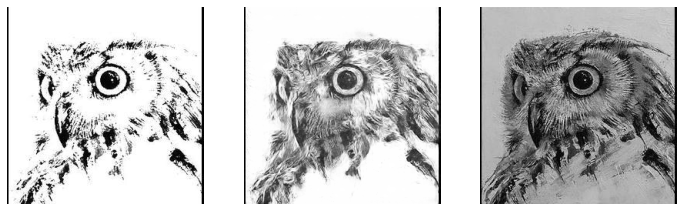

In [97]:
fig, ax = plt.subplots(1, 3, figsize = (12, 8))

ax[0].imshow(sketch, cmap = 'gray');
ax[1].imshow(prediction_image, cmap = 'gray');
ax[2].imshow(image, cmap = 'gray');

ax[0].axis('off');
ax[1].axis('off');
ax[2].axis('off');

In [4]:
def get_example_sketches_at_thresholds(image_file, fill_space_thresholds):
    image = Image.open(image_file)
    
    sketches = []
    
    for threshold in fill_space_thresholds:
        sketches.append(find_sketch_threshold(image, fill_space_threshold = threshold)[0])
        
    return sketches

In [23]:
image_file = '../data/raw/actual_owls/grayscale/Owl_Grayscale_0016.jpg'
fill_space_thresholds = [0.07, 0.05, 0.03, 0.01]

sketches = get_example_sketches_at_thresholds(image_file, fill_space_thresholds)

Testing gamma 0.20
White space: 0.968426, Fill space: 0.000131
Testing gamma 0.21
White space: 0.966412, Fill space: 0.000270
Testing gamma 0.22
White space: 0.964475, Fill space: 0.000656
Testing gamma 0.23
White space: 0.962577, Fill space: 0.001343
Testing gamma 0.24
White space: 0.960594, Fill space: 0.002299
Testing gamma 0.25
White space: 0.958449, Fill space: 0.003650
Testing gamma 0.26
White space: 0.956196, Fill space: 0.004815
Testing gamma 0.27
White space: 0.953804, Fill space: 0.006096
Testing gamma 0.28
White space: 0.951551, Fill space: 0.007454
Testing gamma 0.29
White space: 0.949275, Fill space: 0.008935
Testing gamma 0.30
White space: 0.947083, Fill space: 0.010478
Testing gamma 0.31
White space: 0.944668, Fill space: 0.012137
Testing gamma 0.32
White space: 0.942292, Fill space: 0.013526
Testing gamma 0.33
White space: 0.939861, Fill space: 0.014869
Testing gamma 0.34
White space: 0.937346, Fill space: 0.016574
Testing gamma 0.35
White space: 0.935324, Fill space: 0

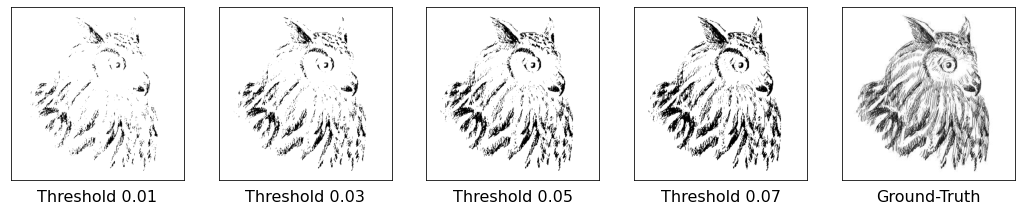

In [26]:
fig, ax = plt.subplots(1, 5, figsize = (18, 10))

for i in range(4):
    ax[i].imshow(sketches[-(i + 1)], cmap = 'gray');
    ax[i].set_xlabel(f'Threshold {fill_space_thresholds[-(i + 1)]}', labelpad = 10, fontsize = 16)
#     ax[i].axis('off');
    ax[i].get_xaxis().set_ticks([])
    ax[i].get_yaxis().set_ticks([])
    
ax[4].imshow(Image.open(image_file), cmap = 'gray');
ax[4].set_xlabel('Ground-Truth', labelpad = 10, fontsize = 16);
ax[4].get_xaxis().set_ticks([]);
ax[4].get_yaxis().set_ticks([]);

In [131]:
def parse_logs(log_file, column_list, scale = False, train_size = 1905, plot = False):
    with open(log_file, 'r') as f:
        logs = f.readlines()
    
    logs_parsed = [x.split(',') for x in logs]
    logs_parsed_numerical = [[re.search(r' (\d+\.?(\d+)?)', y)[1] for y in x] for x in logs_parsed]
    
    df = pd.DataFrame(logs_parsed_numerical, columns = column_list)
    non_epoch_columns = [x for x in columns if x != 'epoch']
    df = df.astype(float)
    df.epoch = df.epoch.astype(int).values
    if scale:
        df[non_epoch_col] = df[non_epoch_col].apply(lambda x: x / train_size)
    
    if plot:
        fig, ax = plt.subplots(len(non_epoch_columns), 1, figsize = (15, 25))

        plt.tight_layout(pad = 4.0)
        
        for i in range(len(non_epoch_columns)):
            sns.lineplot(x = df.epoch, y = df[non_epoch_columns[i]], ax = ax[i]);
            ax[i].set_xlabel(f'{non_epoch_columns[i]}', fontsize = 16)
            
        plt.xlim([0, 200])
            
    return df

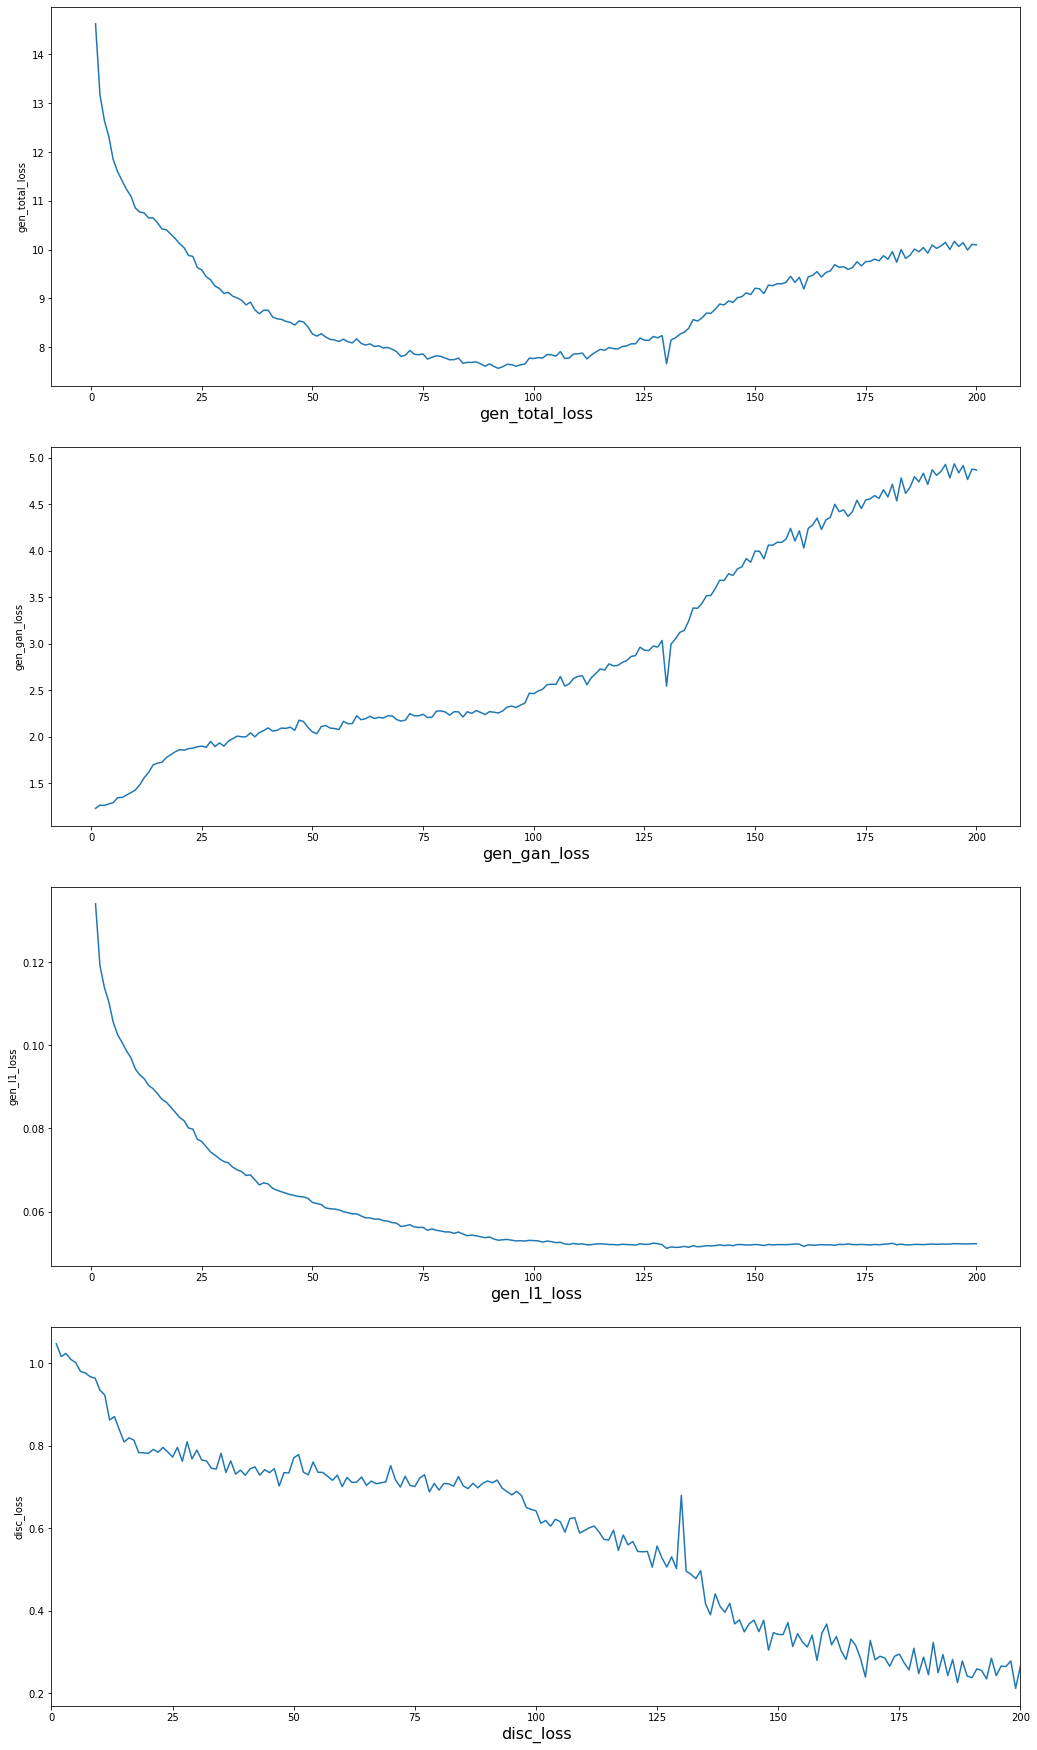

In [132]:
log_file = '../logs/pix2pix/epoch_data.csv'
columns = ['epoch', 'gen_total_loss', 'gen_gan_loss', 'gen_l1_loss', 'disc_loss']
pix2pix_df = parse_logs(log_file, columns, scale = True, plot = True)

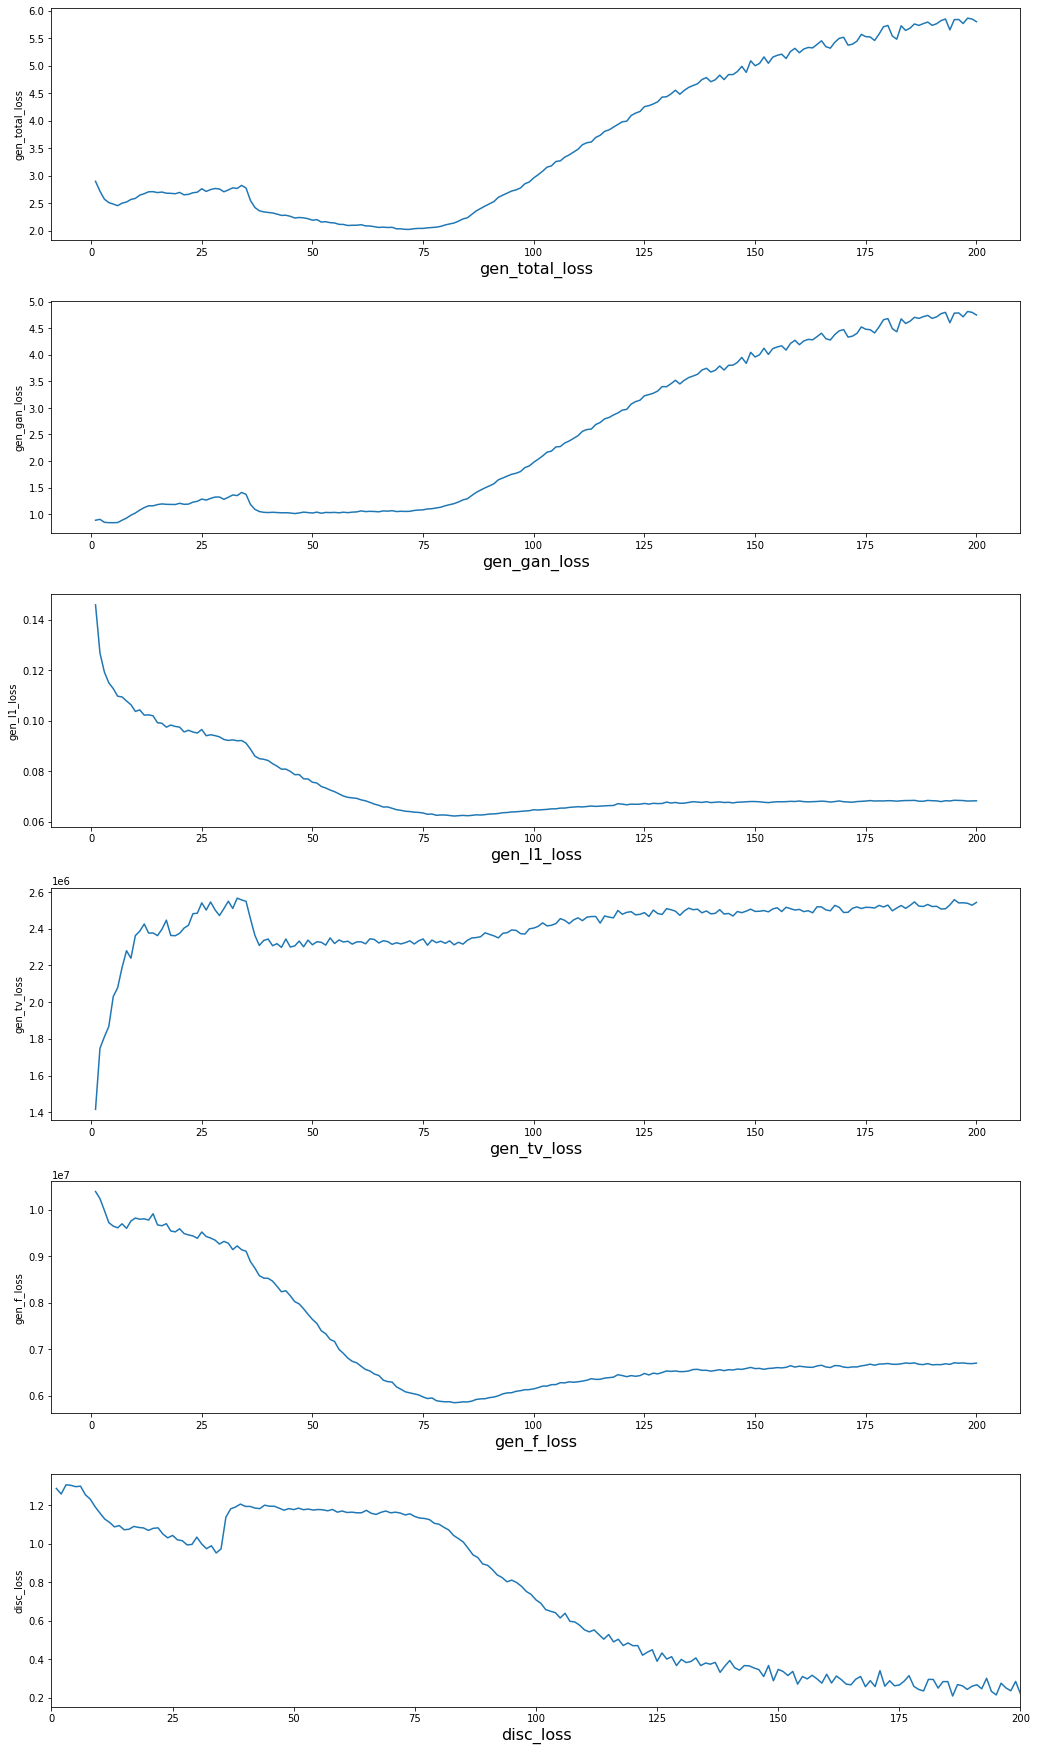

In [133]:
log_file = '../logs/autopainter/epoch_data.csv'
columns = ['epoch', 'gen_total_loss', 'gen_gan_loss', 'gen_l1_loss', 'gen_tv_loss', 'gen_f_loss', 'disc_loss']
autopainter_df = parse_logs(log_file, columns, scale = True, plot = True)

In [14]:
import visualkeras
import pydot
import graphviz

In [3]:
epoch_dir = f'{base_path}/models/pix2pix/epoch_100'
generator = reload_model_from_epoch(epoch_dir, 'pix2pix', base_path)[0]

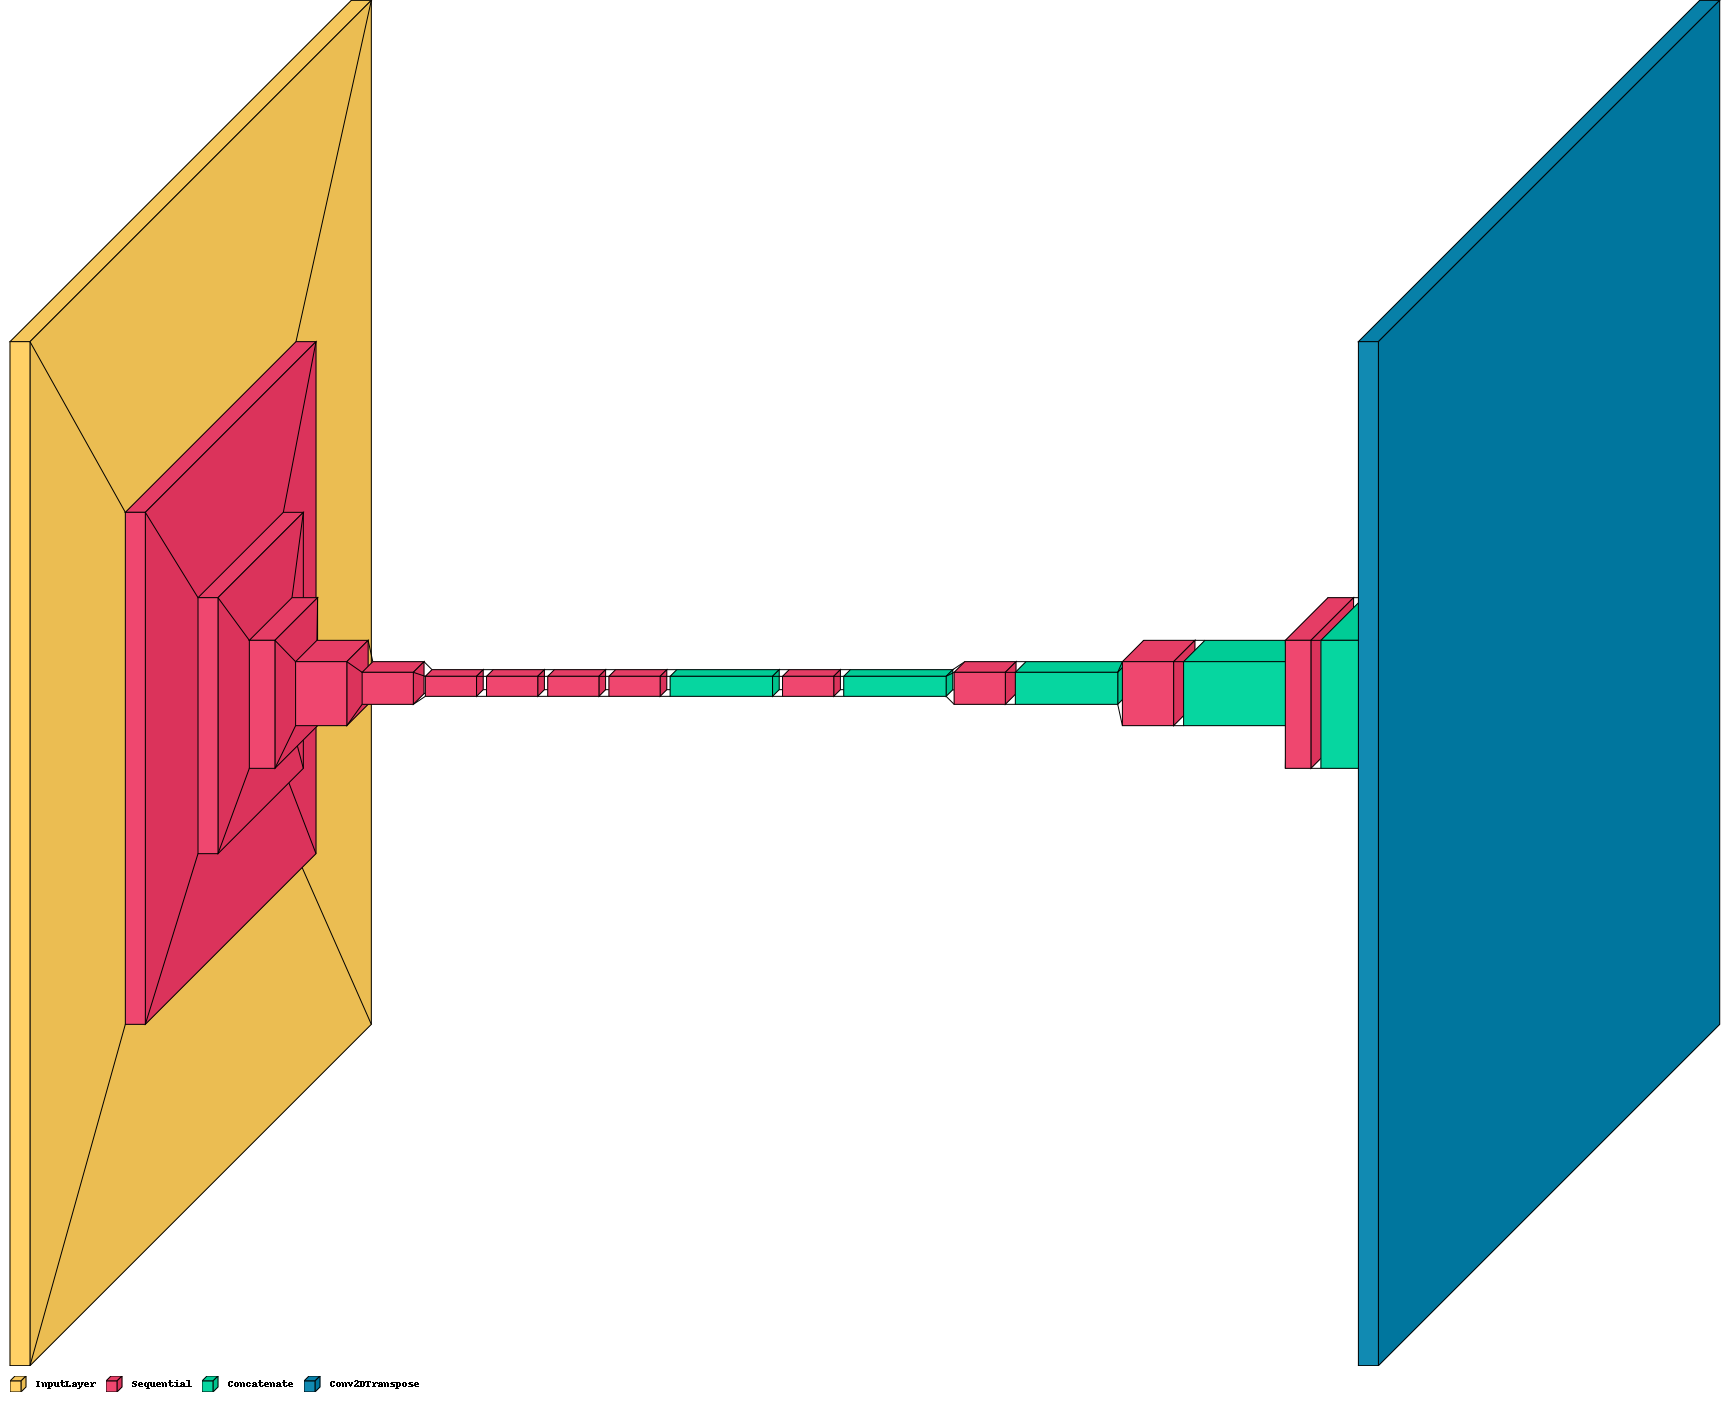

In [17]:
visualkeras.layered_view(generator, legend=True)

In [18]:
visualkeras.graph_view(generator)

AttributeError: 'Functional' object has no attribute '_layers'

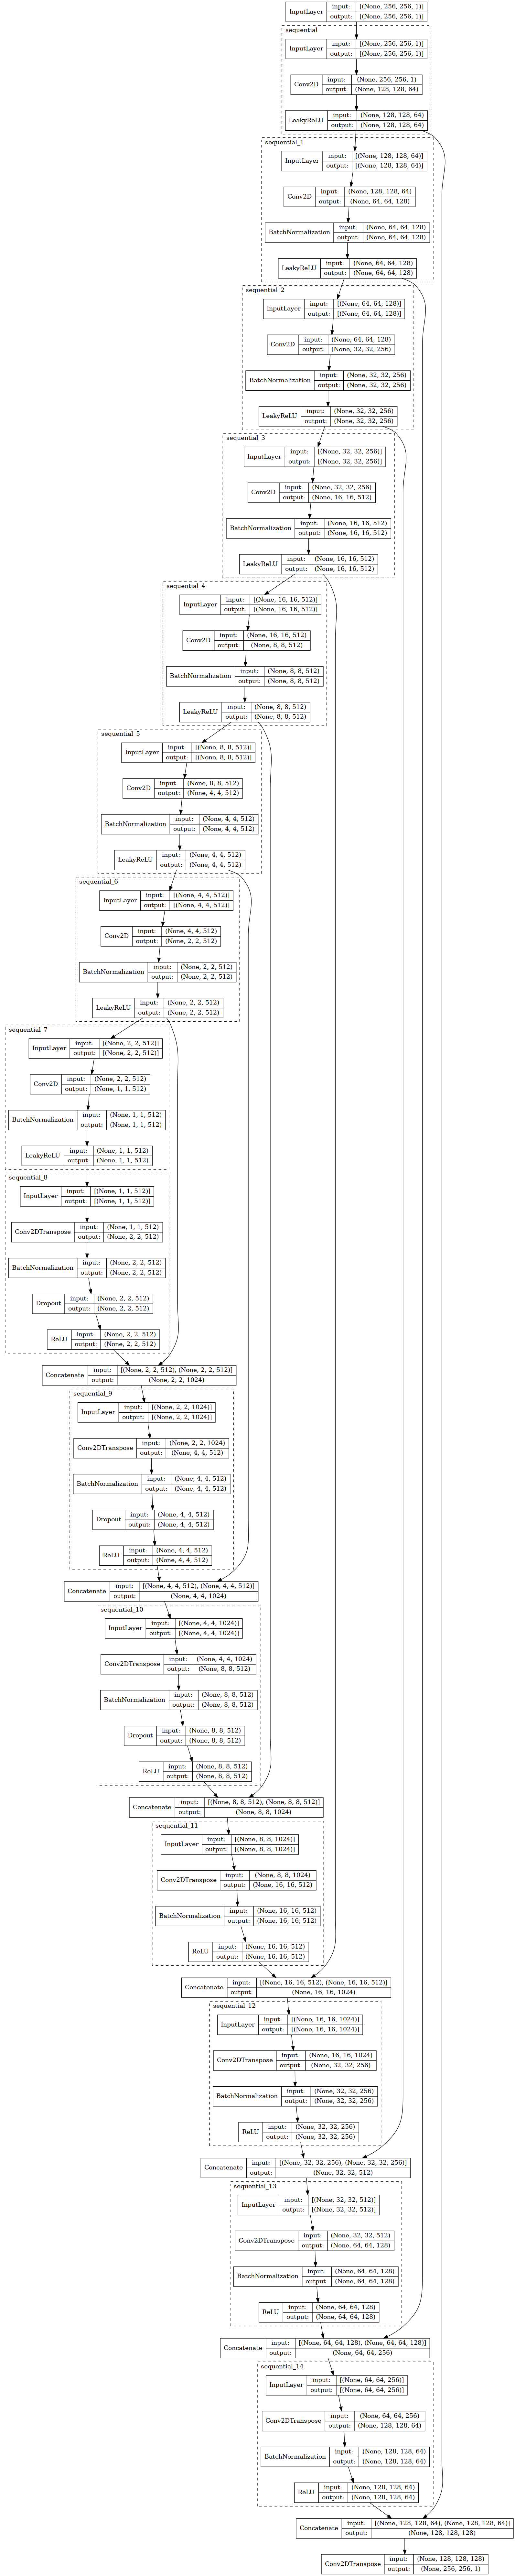

In [22]:
tf.keras.utils.plot_model(generator, show_shapes = True, show_layer_names = False, expand_nested = True)

In [4]:
inception_model = tf.keras.applications.InceptionV3(include_top = False, weights = "imagenet", pooling = 'avg')

2023-02-09 19:38:33.620129: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/josh/.local/lib/python3.8/site-packages/cv2/../../lib64:
2023-02-09 19:38:33.620183: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-09 19:38:33.620204: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (josh-VirtualBox): /proc/driver/nvidia/version does not exist
2023-02-09 19:38:33.620615: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compile

In [4]:
inception_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, None, None,   96         ['conv2d[0][0]']                 
 alization)                     32)                                                    

                                                                                                  
 average_pooling2d (AveragePool  (None, None, None,   0          ['max_pooling2d_1[0][0]']        
 ing2D)                         192)                                                              
                                                                                                  
 conv2d_5 (Conv2D)              (None, None, None,   12288       ['max_pooling2d_1[0][0]']        
                                64)                                                               
                                                                                                  
 conv2d_7 (Conv2D)              (None, None, None,   76800       ['activation_6[0][0]']           
                                64)                                                               
                                                                                                  
 conv2d_10

                                                                                                  
 conv2d_18 (Conv2D)             (None, None, None,   16384       ['average_pooling2d_1[0][0]']    
                                64)                                                               
                                                                                                  
 batch_normalization_12 (BatchN  (None, None, None,   192        ['conv2d_12[0][0]']              
 ormalization)                  64)                                                               
                                                                                                  
 batch_normalization_14 (BatchN  (None, None, None,   192        ['conv2d_14[0][0]']              
 ormalization)                  64)                                                               
                                                                                                  
 batch_nor

                                                                                                  
 batch_normalization_25 (BatchN  (None, None, None,   192        ['conv2d_25[0][0]']              
 ormalization)                  64)                                                               
                                                                                                  
 activation_19 (Activation)     (None, None, None,   0           ['batch_normalization_19[0][0]'] 
                                64)                                                               
                                                                                                  
 activation_21 (Activation)     (None, None, None,   0           ['batch_normalization_21[0][0]'] 
                                64)                                                               
                                                                                                  
 activatio

                                128)                                                              
                                                                                                  
 conv2d_36 (Conv2D)             (None, None, None,   114688      ['activation_35[0][0]']          
                                128)                                                              
                                                                                                  
 batch_normalization_31 (BatchN  (None, None, None,   384        ['conv2d_31[0][0]']              
 ormalization)                  128)                                                              
                                                                                                  
 batch_normalization_36 (BatchN  (None, None, None,   384        ['conv2d_36[0][0]']              
 ormalization)                  128)                                                              
          

 ormalization)                  160)                                                              
                                                                                                  
 activation_44 (Activation)     (None, None, None,   0           ['batch_normalization_44[0][0]'] 
                                160)                                                              
                                                                                                  
 conv2d_45 (Conv2D)             (None, None, None,   179200      ['activation_44[0][0]']          
                                160)                                                              
                                                                                                  
 batch_normalization_45 (BatchN  (None, None, None,   480        ['conv2d_45[0][0]']              
 ormalization)                  160)                                                              
          

 activation_48 (Activation)     (None, None, None,   0           ['batch_normalization_48[0][0]'] 
                                192)                                                              
                                                                                                  
 activation_49 (Activation)     (None, None, None,   0           ['batch_normalization_49[0][0]'] 
                                192)                                                              
                                                                                                  
 mixed5 (Concatenate)           (None, None, None,   0           ['activation_40[0][0]',          
                                768)                              'activation_43[0][0]',          
                                                                  'activation_48[0][0]',          
                                                                  'activation_49[0][0]']          
          

 batch_normalization_53 (BatchN  (None, None, None,   576        ['conv2d_53[0][0]']              
 ormalization)                  192)                                                              
                                                                                                  
 batch_normalization_58 (BatchN  (None, None, None,   576        ['conv2d_58[0][0]']              
 ormalization)                  192)                                                              
                                                                                                  
 batch_normalization_59 (BatchN  (None, None, None,   576        ['conv2d_59[0][0]']              
 ormalization)                  192)                                                              
                                                                                                  
 activation_50 (Activation)     (None, None, None,   0           ['batch_normalization_50[0][0]'] 
          

 conv2d_60 (Conv2D)             (None, None, None,   147456      ['mixed6[0][0]']                 
                                192)                                                              
                                                                                                  
 conv2d_63 (Conv2D)             (None, None, None,   258048      ['activation_62[0][0]']          
                                192)                                                              
                                                                                                  
 conv2d_68 (Conv2D)             (None, None, None,   258048      ['activation_67[0][0]']          
                                192)                                                              
                                                                                                  
 conv2d_69 (Conv2D)             (None, None, None,   147456      ['average_pooling2d_6[0][0]']    
          

 batch_normalization_71 (BatchN  (None, None, None,   960        ['conv2d_71[0][0]']              
 ormalization)                  320)                                                              
                                                                                                  
 batch_normalization_75 (BatchN  (None, None, None,   576        ['conv2d_75[0][0]']              
 ormalization)                  192)                                                              
                                                                                                  
 activation_71 (Activation)     (None, None, None,   0           ['batch_normalization_71[0][0]'] 
                                320)                                                              
                                                                                                  
 activation_75 (Activation)     (None, None, None,   0           ['batch_normalization_75[0][0]'] 
          

                                384)                                                              
                                                                                                  
 activation_79 (Activation)     (None, None, None,   0           ['batch_normalization_79[0][0]'] 
                                384)                                                              
                                                                                                  
 activation_82 (Activation)     (None, None, None,   0           ['batch_normalization_82[0][0]'] 
                                384)                                                              
                                                                                                  
 activation_83 (Activation)     (None, None, None,   0           ['batch_normalization_83[0][0]'] 
                                384)                                                              
          

 ormalization)                  384)                                                              
                                                                                                  
 batch_normalization_92 (BatchN  (None, None, None,   1152       ['conv2d_92[0][0]']              
 ormalization)                  384)                                                              
                                                                                                  
 conv2d_93 (Conv2D)             (None, None, None,   393216      ['average_pooling2d_8[0][0]']    
                                192)                                                              
                                                                                                  
 batch_normalization_85 (BatchN  (None, None, None,   960        ['conv2d_85[0][0]']              
 ormalization)                  320)                                                              
          

In [3]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input

In [15]:
def compute_embeddings(dataloader, count):
    image_embeddings = []


    for _ in range(count):
        images = next(iter(dataloader))
        embeddings = inception_model.predict(images)


        image_embeddings.extend(embeddings)


    return np.array(image_embeddings)

In [16]:
def calculate_fid(real_embeddings, generated_embeddings):
    # calculate mean and covariance statistics
    mu1, sigma1 = real_embeddings.mean(axis=0), np.cov(real_embeddings, rowvar=False)
    mu2, sigma2 = generated_embeddings.mean(axis=0), np.cov(generated_embeddings,  rowvar=False)
    # calculate sum squared difference between means
    ssdiff = np.sum((mu1 - mu2)**2.0)
    # calculate sqrt of product between cov
    covmean = linalg.sqrtm(sigma1.dot(sigma2))
    # check and correct imaginary numbers from sqrt
    if np.iscomplexobj(covmean):
        covmean = covmean.real
     # calculate score
    fid = ssdiff + np.trace(sigma1 + sigma2 - 2.0 * covmean)
    
    return fid

In [17]:
def preprocess_for_inception(image):
    image = tf.image.grayscale_to_rgb(image)
    image = tf.image.resize(image, (299, 299))
    image = preprocess_input(image)
    
    return image

In [ ]:
def create_inception_generated_dataset(image_dir):
    dataset = tf.data.Dataset.list_files(image_dir)
    dataset = dataset.map(lambda x: tf.cast(decode_jpeg(read_file(x)), tf.float32),
                                          num_parallel_calls = tf.data.AUTOTUNE)
    dataset = dataset.map(preprocess_for_inception, num_parallel_calls = tf.data.AUTOTUNE)
    dataset = dataset.batch(1)
    
    return dataset

In [18]:
train_images = tf.data.Dataset.list_files(f'{base_path}/data/train/*.jpg')
train_images = train_images.map(load, num_parallel_calls = tf.data.AUTOTUNE)
train_images = train_images.map(lambda x, y: x, num_parallel_calls = tf.data.AUTOTUNE)
train_images = train_images.map(preprocess_for_inception, num_parallel_calls = tf.data.AUTOTUNE)
train_images = train_images.batch(1)

In [19]:
train_generated = tf.data.Dataset.list_files(f'{base_path}/data/generated/train/pix2pix/epoch_100/*.jpg')
train_generated = train_generated.map(lambda x: tf.cast(decode_jpeg(read_file(x)), tf.float32),
                                      num_parallel_calls = tf.data.AUTOTUNE)
train_generated = train_generated.map(preprocess_for_inception, num_parallel_calls = tf.data.AUTOTUNE)
train_generated = train_generated.batch(1)

In [20]:
train_generated

<BatchDataset element_spec=TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None)>

In [21]:
# compute embeddings for real images
real_image_embeddings = compute_embeddings(train_images, 10000)

# compute embeddings for generated images
generated_image_embeddings = compute_embeddings(train_generated, 10000)

real_image_embeddings.shape, generated_image_embeddings.shape

fid = calculate_fid(real_image_embeddings, generated_image_embeddings)

1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 104ms/step


1/1 [==============================] - 0s 84ms/step


1/1 [==============================] - 0s 81ms/step


1/1 [==============================] - 0s 101ms/step


1/1 [==============================] - 0s 95ms/step


1/1 [==============================] - 0s 73ms/step


1/1 [==============================] - 0s 94ms/step


1/1 [==============================] - 0s 67ms/step


1/1 [==============================] - 0s 96ms/step


1/1 [==============================] - 0s 96ms/step


1/1 [==============================] - 0s 98ms/step


1/1 [==============================] - 0s 102ms/step


1/1 [==============================] - 0s 71ms/step


1/1 [==============================] - 0s 123ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 66ms/step


1/1 [==============================] - 0s 95ms/step


1/1 [==============================] - 0s 86ms/step


1/1 [==============================] - 0s 58ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 82ms/step


1/1 [==============================] - 0s 86ms/step


1/1 [==============================] - 0s 103ms/step


1/1 [==============================] - 0s 141ms/step


1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 93ms/step


1/1 [==============================] - 0s 167ms/step


1/1 [==============================] - 0s 71ms/step


1/1 [==============================] - 0s 58ms/step


1/1 [==============================] - 0s 61ms/step


1/1 [==============================] - 0s 92ms/step


KeyboardInterrupt: 

In [ ]:
epochs = np.arange(10, 210, 10)
models = ['pix2pix', 'autopainter']

train_images = tf.data.Dataset.list_files(f'{base_path}/data/train/*.jpg')
train_images = train_images.map(load, num_parallel_calls = tf.data.AUTOTUNE)
train_images = train_images.map(lambda x, y: x, num_parallel_calls = tf.data.AUTOTUNE)
train_images = train_images.map(preprocess_for_inception, num_parallel_calls = tf.data.AUTOTUNE)
train_images = train_images.batch(1)

for model in models:
    print(f'Using model {model}.')
    for epoch in epochs:
        print(f'Using epoch {epoch}.')
        generated_image_dir = f'{base_path}/data/train/{model}/epoch_{epoch:03d}/*.jpg'
        
        print('Creating generated dataset.')
        train_generated = create_inception_generated_dataset(generated_image_dir)
        
        print('Getting inception embeddings for real images.')
        real_image_embeddings = compute_embeddings(train_images, 10000)
        
        print('Getting inception embeddings for generated images.')
        generated_image_embeddings = compute_embeddings(train_generated, 10000)
        
        print('Calculating FID.')
        fid = calculate_fid(real_image_embeddings, generated_image_embeddings)
        
        log_location = f'{base_path}/logs/{model}/fid_scores.csv'
        print(f'Writing to {log_location}.')
        with open(log_location, 'a') as f:
            f.write(f'Epoch: {epoch:03d}, FID: {fid:.03f}')